# AI P1 - Neural Network with One Hidden Layer

In [2]:
# Import Python libraries
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

## NN class

In [3]:
class NeuralNetwork:
    """
    This is implementation of simple neural network with 3 layers
    input layer, hidden layer, output layer
    """
    
    def __init__(self, input_dim, output_dim, hidden_nodes=None):
        """
        Initializes the parameters of the neural network to 
        random values.
        
        args:
            input_dim: Number of dimensions of the input data
            output_dim: Number of classes
            hidden_nodes: Number of nodes in the hidden layer
        """
        
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.hidden_nodes = hidden_nodes
        
        self.theta = np.random.randn(self.input_dim, self.hidden_nodes) / np.sqrt(self.input_dim)       
        self.bias = np.zeros((1, self.hidden_nodes))
        self.theta1 = np.random.randn(self.hidden_nodes, self.output_dim) / np.sqrt(self.hidden_nodes)       
        self.bias1 = np.zeros((1, self.output_dim))
        
        self.accuracy = 0
        self.con_mat = np.zeros((self.output_dim, self.output_dim))

        
    #--------------------------------------------------------------------------
    
    def compute_cost(self,X, y):
        """
        Computes the total cost on the dataset.
        
        args:
            X: Data array
            y: Labels corresponding to input data
        
        returns:
            cost: average cost per data sample
        """
        num_examples = X.shape[0]
        a1 = X #input 
        z = np.dot(a1, self.theta) + self.bias # input to hidden layer
        a2 = self.sigmoid(z) # output from hidden layer
        z2 = np.dot(a2, self.theta1) + self.bias1 # input to output layer
        a3 = self.sigmoid(z2) # output from output layer
        
        one_hot_y = np.zeros((num_examples,np.max(y)+1))
        logloss = np.zeros((num_examples,))        
        for i in range(np.shape(X)[0]):
            one_hot_y[i,y[i]] = 1
            logloss[i] = -np.sum(np.log(a3[i,:]) * one_hot_y[i,:])
        data_loss = np.sum(logloss)
        return 1./num_examples * data_loss

    
    #--------------------------------------------------------------------------

    def predict(self,X):
        """
        Makes a prediction based on current model parameters.
        
        args:
            X: Data array
            
        returns:
            predictions: array of predicted labels
        """
        
        a1 = X #input 
        z = np.dot(a1, self.theta) + self.bias # input to hidden layer
        a2 = self.sigmoid(z) # output from hidden layer
        z2 = np.dot(a2, self.theta1) + self.bias1 # input to output layer
        a3 = self.sigmoid(z2) # output from output layer
            
        predictions = np.argmax(a3, axis = 1)
        return predictions
        
        
    #--------------------------------------------------------------------------
    
    def train(self,X,y,num_epochs,learning_rate=0.01, lamda=0.01):
    
        """ 
        Train the neural network based on passed in parameters
        
         args:
            X: Data array
            y: Labels corresponding to input data
            num_epochs: Number of times to train NN with entire dataset
            learning_rate: The rate at which the NN adjusts its weights by
            lamda: Importance of L2 regularization term
            
        returns:
            Nothing - Trains the NN for given data
        """
  
        for epoch in range(0, num_epochs):

            # Forward propagation
            a1 = X #input 
            z = np.dot(a1, self.theta) + self.bias # input to hidden layer
            a2 = self.sigmoid(z) # output from hidden layer
            z2 = np.dot(a2, self.theta1) + self.bias1 # input to output layer
            a3 = self.sigmoid(z2) # output from output layer

            # Backpropagation
            beta = np.zeros_like(a3)
            one_hot_y = np.zeros_like(a3)
            for i in range(X.shape[0]):
                one_hot_y[i,y[i]] = 1
                
            #error calculation
            beta = a3 - one_hot_y
            beta1 = np.dot(beta, self.theta1.T) * self.sigmoid_derivative(a2)
            
            # Compute gradients of model parameters
            dtheta = np.dot(X.T,beta1)         
            dbias = np.sum(beta1, axis=0)
            dtheta1 = np.dot(a2.T, beta) 
            dbias1 = np.sum(beta, axis=0)
            
            # Gradient descent parameter update
            self.theta -= (learning_rate * dtheta) + (lamda * self.theta) # Added term is L2 regularization term
            self.bias -= learning_rate * dbias   
            self.theta1 -= (learning_rate * dtheta1) + (lamda * self.theta1) # Added term is L2 regularization term
            self.bias1 -= learning_rate * dbias1
            
    #--------------------------------------------------------------------------

    def sigmoid_derivative(self, x):
        """ The derivative of the sigmoid function"""
        return x * (1 - x)       
    
    #--------------------------------------------------------------------------
            
    def sigmoid(self, x):
        """ sigmoid function """
        return 1/( 1 + np.exp(-x))
    
    #--------------------------------------------------------------------------
    
    def score(self, y, y_pred):
        """ Update confusion matrix and compute neural network accuracy """
        
        self.con_mat = np.zeros((self.output_dim, self.output_dim))# reset con_mat
        for i in range(len(y_pred)):
            self.con_mat[y_pred[i], y[i]] += 1
            if y[i] == y_pred[i]:
                self.accuracy += 1
        self.accuracy = self.accuracy/float(len(y_pred))
        return self.accuracy


## Helper functions

In [4]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    
    """
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else '.0f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
#--------------------------------------------------------------------------

def crossval_folds(N, n_folds, seed=1996): #seed for testing purposes
    """ Choose indices for each set of data for k-fold cross validation"""
    np.random.seed(seed)
    idx_all_permute = np.random.permutation(N) # shuffle for randominess
    N_fold = int(N/n_folds)
    idx_folds = []
    for i in range(n_folds):
        start = i*N_fold
        end = min([(i+1)*N_fold, N])
        idx_folds.append(list(idx_all_permute[start:end]))
    return idx_folds

#--------------------------------------------------------------------------
    
def list_by_index(X, y, idx):
    """return np.array of X, Y based on the list of indices"""
    new_x = []
    new_y = []
    for i in idx: 
        new_x.append(X[i])
        new_y.append(y[i])
    return np.array(new_x), np.array(new_y)
    
#--------------------------------------------------------------------------
    
def plot_decision_boundary(model, X, y):
    """
    Function to print the decision boundary given by model.
    
    args:
        model: model, whose parameters are used to plot the decision boundary.
        X: input data
        y: input labels
    """
    
    x1_array, x2_array = np.meshgrid(np.arange(-10, 10, 0.01), np.arange(-10, 10, 0.01))
    grid_coordinates = np.c_[x1_array.ravel(), x2_array.ravel()]
    Z = model.predict(grid_coordinates)
    Z = Z.reshape(x1_array.shape)
    plt.contourf(x1_array, x2_array, Z, cmap=plt.cm.bwr)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr)
    plt.show()

## Training NN

In [5]:
def runNN(hidden_nodes, learning_rate, lamda, linear = True):
    
    num_epochs = 1000
    
    if not linear:
        X = np.genfromtxt('DATA/data_nonLinearX.csv', delimiter = ',')
        y = np.genfromtxt('DATA/data_nonLinearY.csv', delimiter = ',').astype(np.int64)
    else:
        X = np.genfromtxt('DATA/Data_LinearX.csv', delimiter = ',')
        y = np.genfromtxt('DATA/Data_Lineary.csv', delimiter = ',').astype(np.int64)
        
    N, input_dim = np.shape(X)
    output_dim = np.max(y)+1
    k_folds = 5
    idx = crossval_folds(N, k_folds)
    x = list(range(N)) # num of examples in training set
    accuracies = []
    train_acc = []
    con_mats = np.zeros(output_dim, output_dim)

    print("Folds:")
    print("=======", "\n")
    for j in range(k_folds):
        training_idx = [i for i in x if i not in idx[j]]
        testingX, testingY = list_by_index(X,y, idx[j])
        trainingX, trainingY = list_by_index(X,y, training_idx)

        print("*** TRAINING ON FOLD", str(j+1), "***", "\n")

        nn_model = NeuralNetwork(input_dim, output_dim, hidden_nodes)
        nn_model.train(trainingX, trainingY, num_epochs, learning_rate, lamda)
        y_pred = nn_model.predict(X)
        nn_model.score(y,y_pred)
        print("TRAINING ACCURACY ON FOLD", str(j+1), "=",str(nn_model.accuracy), "\n")
        #train_acc.append(nn_model.accuracy)
        y_pred = nn_model.predict(testingX)
        nn_model.score(testingY, y_pred)
        print("TESTING ACCURACY ON FOLD", str(j+1), "=",str(nn_model.accuracy), "\n")
        accuracies.append(nn_model.accuracy)
        print("CONFUSION MATRIX OF FOLD", str(j+1)) #, nn_model.con_mat
        plt.figure()
        plot_confusion_matrix(nn_model.con_mat, classes = ['0', '1'], 
                          title = 'Confusion matrix')
        plt.show()
        if j != k_folds - 1:
            print("-------------------------------------------------------", "\n")
        con_mats = np.add(con_mats, nn_model.con_mat)
    
    print("===================================================================")
    print("\n", "Results:")
    print("===========", "\n")
    print('Parameters:')
    print('------------', "\n")
    print('LEARNING RATE:', learning_rate)
    print('# OF EPOCHS:', num_epochs)
    print('# NODES IN HIDDEN LAYER:', nn_model.hidden_nodes, "\n")
    print('LAMBDA:', lamda)
    print('Metrics:')
    print('----------', "\n")
    print('ACCURACY:', round(np.mean(accuracies), 3))
    print('COST: ', nn_model.compute_cost(X,y))
    print('CONFUSION MATRIX: \n')
    plt.figure()
    plot_confusion_matrix(con_mats, classes = ['0', '1'], 
                          title = 'Confusion matrix')
    plt.savefig("confusion_mat_"+str(linear))
    plt.show()
    
    return (X, y, nn_model)

# Evaluating:

### Linear dataset

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.9995 

TESTING ACCURACY ON FOLD 1 = 0.99999875 

CONFUSION MATRIX OF FOLD 1


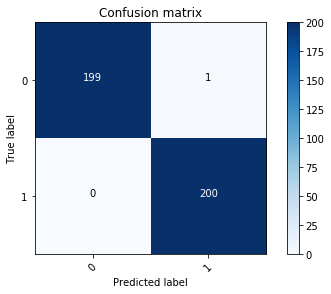

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.999 

TESTING ACCURACY ON FOLD 2 = 1.0024975 

CONFUSION MATRIX OF FOLD 2


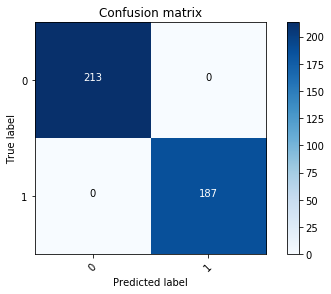

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.9985 

TESTING ACCURACY ON FOLD 3 = 0.9974962500000001 

CONFUSION MATRIX OF FOLD 3


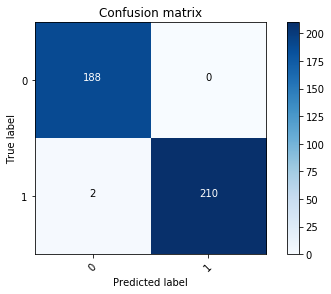

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.999 

TESTING ACCURACY ON FOLD 4 = 1.0024975 

CONFUSION MATRIX OF FOLD 4


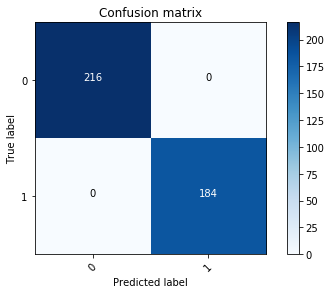

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.999 

TESTING ACCURACY ON FOLD 5 = 1.0024975 

CONFUSION MATRIX OF FOLD 5


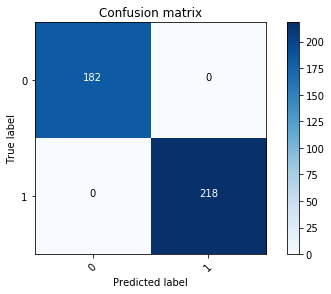


 Results:

Parameters:
------------ 

LEARNING RATE: 0.01
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 2 

LAMBDA: 0.0001
Metrics:
---------- 

ACCURACY: 1.001
COST:  0.0024794155703976254
CONFUSION MATRIX: 



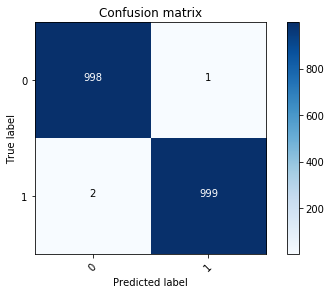

In [ ]:
X, y, model = runNN(hidden_nodes = 2, learning_rate = 0.01, lamda = 0.0001, linear = True)

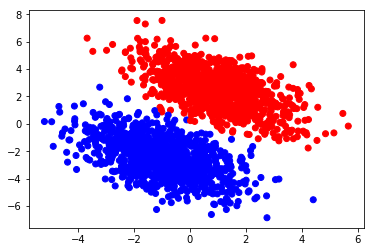

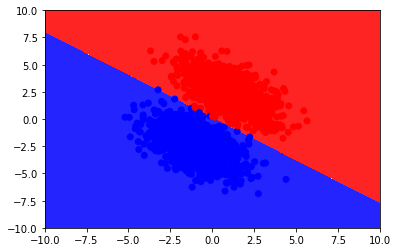

In [ ]:
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.bwr) #http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter
plt.show()
plot_decision_boundary(model, X, y)

## Nonlinear dataset

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.987 

TESTING ACCURACY ON FOLD 1 = 0.9874674999999999 

CONFUSION MATRIX OF FOLD 1


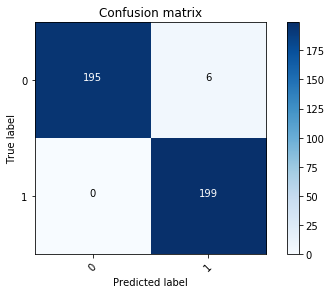

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.984 

TESTING ACCURACY ON FOLD 2 = 0.9824600000000001 

CONFUSION MATRIX OF FOLD 2


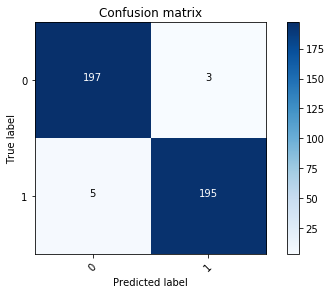

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.9885 

TESTING ACCURACY ON FOLD 3 = 0.9924712499999999 

CONFUSION MATRIX OF FOLD 3


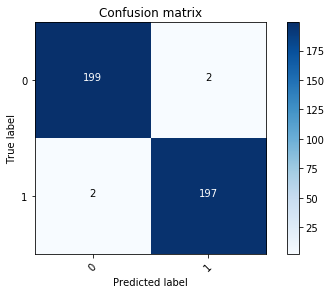

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.9865 

TESTING ACCURACY ON FOLD 4 = 0.97246625 

CONFUSION MATRIX OF FOLD 4


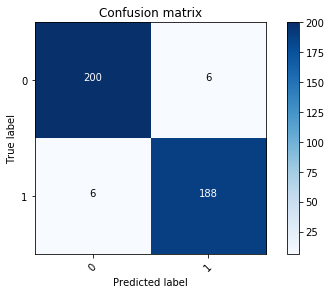

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.9865 

TESTING ACCURACY ON FOLD 5 = 0.98746625 

CONFUSION MATRIX OF FOLD 5


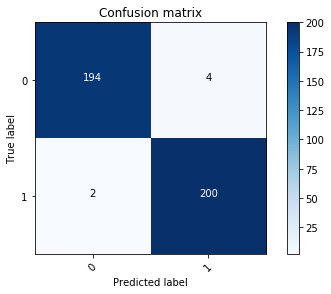


 Results:

Parameters:
------------ 

LEARNING RATE: 0.01
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 8 

LAMBDA: 0.0001
Metrics:
---------- 

ACCURACY: 0.984
COST:  0.047647028241796986
CONFUSION MATRIX: 



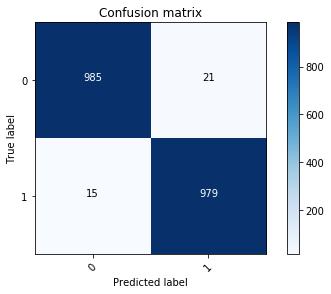

In [ ]:
X, y, model = runNN(hidden_nodes = 8, learning_rate = 0.01, lamda = 0.0001, linear = False)

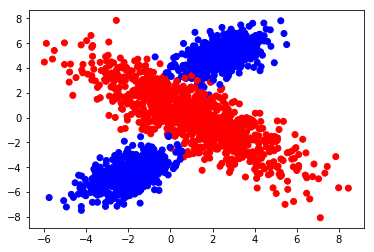

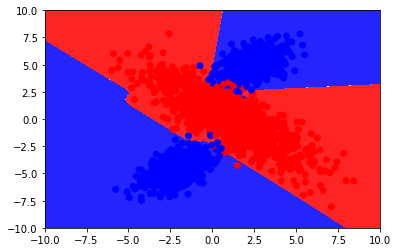

In [ ]:
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.bwr) #http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter
plt.show()
plot_decision_boundary(model, X, y)

## Evaluating model with different number of nodes in Hidden Layer and learning rate:

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.985 

TESTING ACCURACY ON FOLD 1 = 0.9899625000000001 

CONFUSION MATRIX OF FOLD 1


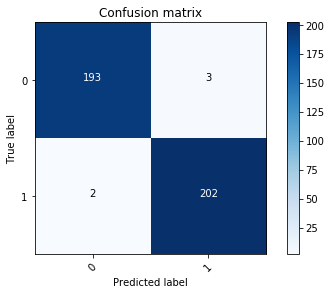

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.743 

TESTING ACCURACY ON FOLD 2 = 0.7318574999999999 

CONFUSION MATRIX OF FOLD 2


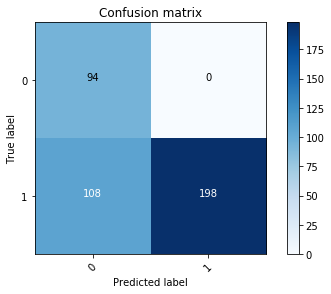

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.9845 

TESTING ACCURACY ON FOLD 3 = 0.9924612500000001 

CONFUSION MATRIX OF FOLD 3


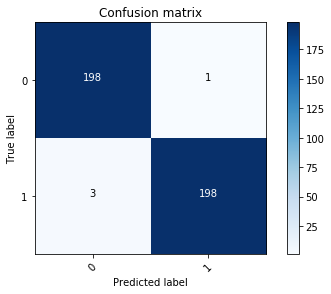

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.9865 

TESTING ACCURACY ON FOLD 4 = 0.9799662499999999 

CONFUSION MATRIX OF FOLD 4


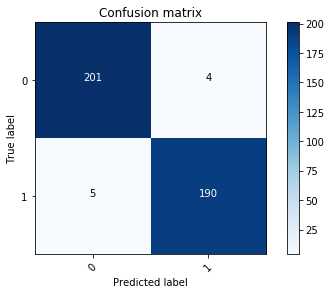

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.9845 

TESTING ACCURACY ON FOLD 5 = 0.9874612500000001 

CONFUSION MATRIX OF FOLD 5


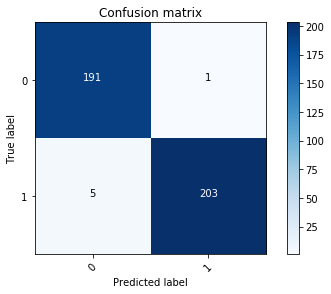


 Results:

Parameters:
------------ 

LEARNING RATE: 0.01
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 5 

LAMBDA: 0.01
Metrics:
---------- 

ACCURACY: 0.936
COST:  0.05843780106743554
CONFUSION MATRIX: 



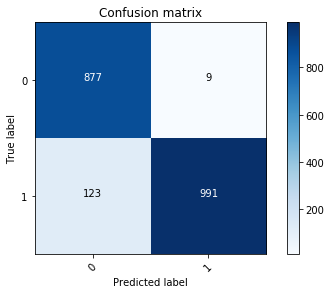

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.984 

TESTING ACCURACY ON FOLD 1 = 0.9874600000000001 

CONFUSION MATRIX OF FOLD 1


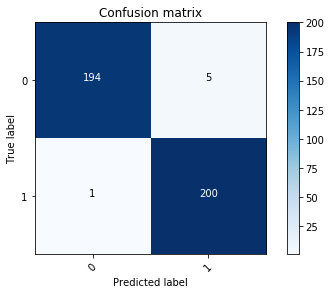

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.983 

TESTING ACCURACY ON FOLD 2 = 0.9799575 

CONFUSION MATRIX OF FOLD 2


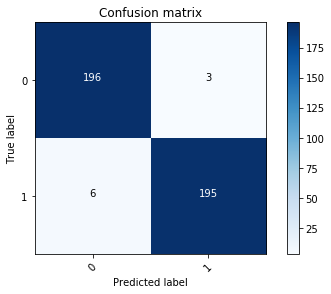

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:142: RuntimeWarning: overflow encountered in exp


TRAINING ACCURACY ON FOLD 3 = 0.9755 

TESTING ACCURACY ON FOLD 3 = 0.9749387500000001 

CONFUSION MATRIX OF FOLD 3


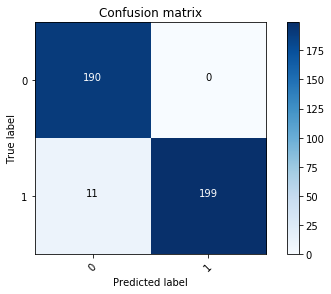

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.983 

TESTING ACCURACY ON FOLD 4 = 0.9774575 

CONFUSION MATRIX OF FOLD 4


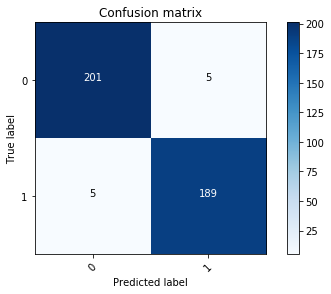

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.9865 

TESTING ACCURACY ON FOLD 5 = 0.98746625 

CONFUSION MATRIX OF FOLD 5


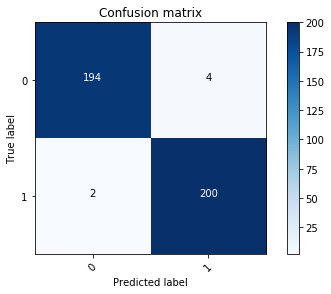


 Results:

Parameters:
------------ 

LEARNING RATE: 0.02
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 5 

LAMBDA: 0.01
Metrics:
---------- 

ACCURACY: 0.981
COST:  0.045490527853979314
CONFUSION MATRIX: 



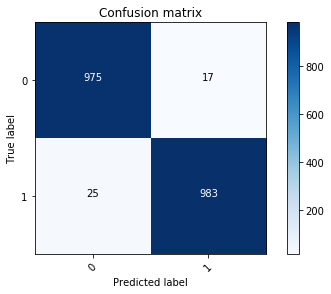

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.7435 

TESTING ACCURACY ON FOLD 1 = 0.7818587499999999 

CONFUSION MATRIX OF FOLD 1


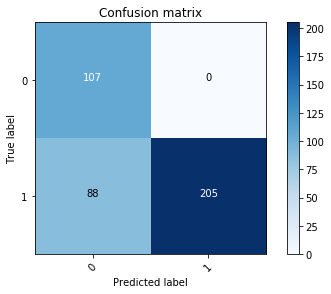

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.743 

TESTING ACCURACY ON FOLD 2 = 0.7293575 

CONFUSION MATRIX OF FOLD 2


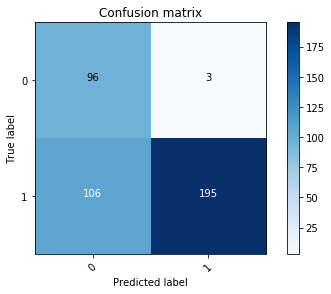

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.9895 

TESTING ACCURACY ON FOLD 3 = 0.9949737500000001 

CONFUSION MATRIX OF FOLD 3


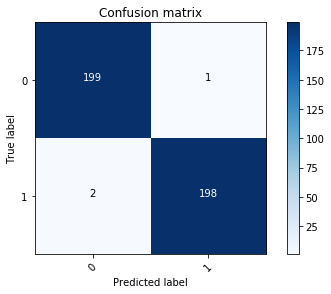

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.983 

TESTING ACCURACY ON FOLD 4 = 0.9774575 

CONFUSION MATRIX OF FOLD 4


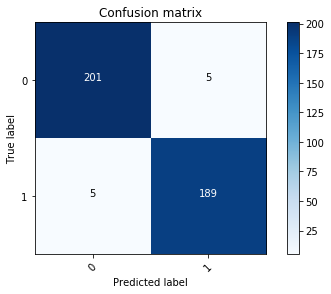

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.985 

TESTING ACCURACY ON FOLD 5 = 0.9849625000000001 

CONFUSION MATRIX OF FOLD 5


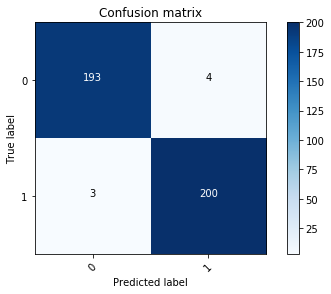


 Results:

Parameters:
------------ 

LEARNING RATE: 0.03
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 5 

LAMBDA: 0.01
Metrics:
---------- 

ACCURACY: 0.894
COST:  0.07193839976391479
CONFUSION MATRIX: 



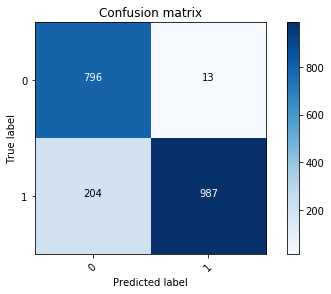

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.981 

TESTING ACCURACY ON FOLD 1 = 0.9799525 

CONFUSION MATRIX OF FOLD 1


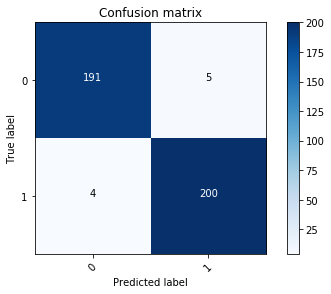

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.9485 

TESTING ACCURACY ON FOLD 2 = 0.9448712499999999 

CONFUSION MATRIX OF FOLD 2


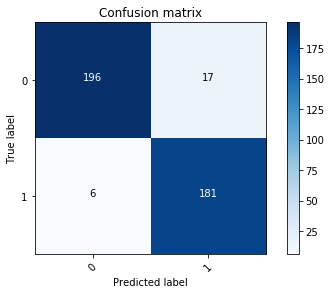

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.7435 

TESTING ACCURACY ON FOLD 3 = 0.7243587499999999 

CONFUSION MATRIX OF FOLD 3


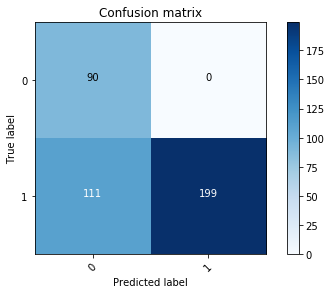

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.5 

TESTING ACCURACY ON FOLD 4 = 0.51625 

CONFUSION MATRIX OF FOLD 4


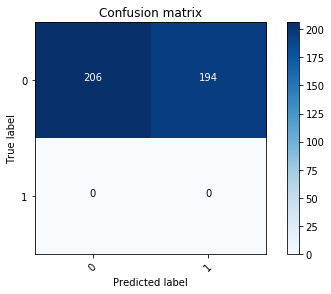

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.9865 

TESTING ACCURACY ON FOLD 5 = 0.98746625 

CONFUSION MATRIX OF FOLD 5


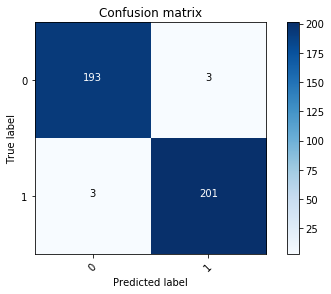


 Results:

Parameters:
------------ 

LEARNING RATE: 0.04
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 5 

LAMBDA: 0.01
Metrics:
---------- 

ACCURACY: 0.831
COST:  0.06728075981814809
CONFUSION MATRIX: 



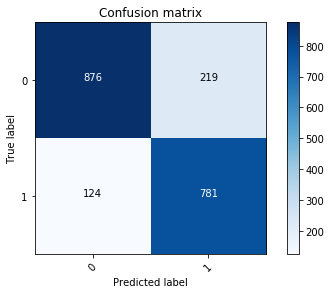

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.987 

TESTING ACCURACY ON FOLD 1 = 0.9874674999999999 

CONFUSION MATRIX OF FOLD 1


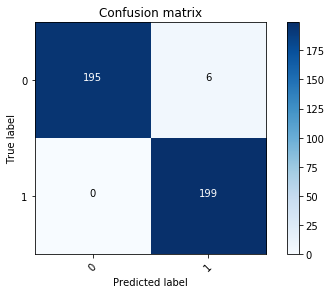

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.9785 

TESTING ACCURACY ON FOLD 2 = 0.97494625 

CONFUSION MATRIX OF FOLD 2


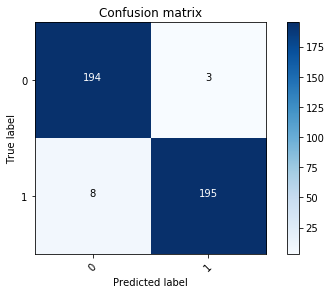

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.983 

TESTING ACCURACY ON FOLD 3 = 0.9924575 

CONFUSION MATRIX OF FOLD 3


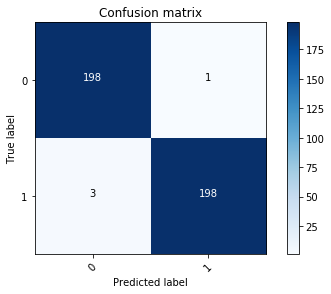

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.5 

TESTING ACCURACY ON FOLD 4 = 0.51625 

CONFUSION MATRIX OF FOLD 4


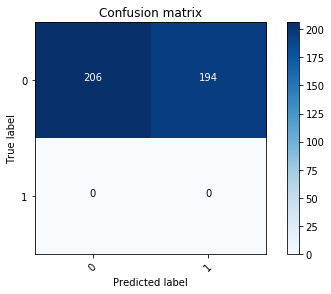

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.9845 

TESTING ACCURACY ON FOLD 5 = 0.98496125 

CONFUSION MATRIX OF FOLD 5


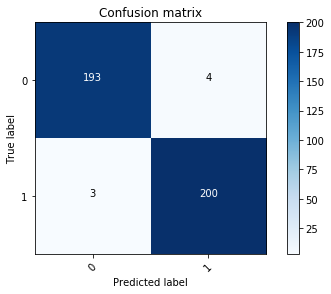


 Results:

Parameters:
------------ 

LEARNING RATE: 0.05
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 5 

LAMBDA: 0.01
Metrics:
---------- 

ACCURACY: 0.891
COST:  0.07240498777644644
CONFUSION MATRIX: 



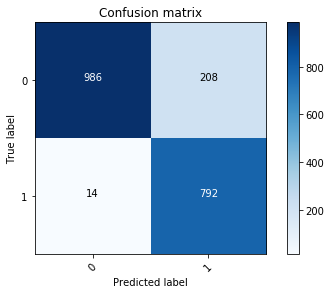

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.9835 

TESTING ACCURACY ON FOLD 1 = 0.9874587499999999 

CONFUSION MATRIX OF FOLD 1


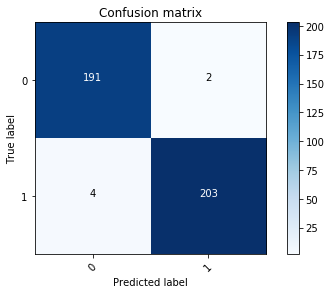

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.9815 

TESTING ACCURACY ON FOLD 2 = 0.97745375 

CONFUSION MATRIX OF FOLD 2


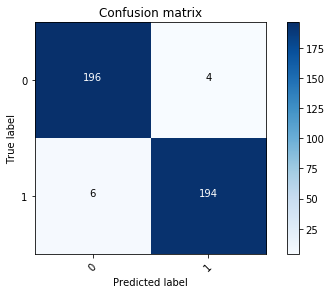

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.978 

TESTING ACCURACY ON FOLD 3 = 0.982445 

CONFUSION MATRIX OF FOLD 3


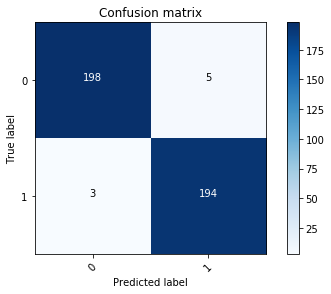

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.745 

TESTING ACCURACY ON FOLD 4 = 0.7443625 

CONFUSION MATRIX OF FOLD 4


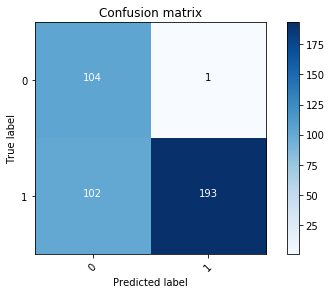

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.9845 

TESTING ACCURACY ON FOLD 5 = 0.98496125 

CONFUSION MATRIX OF FOLD 5


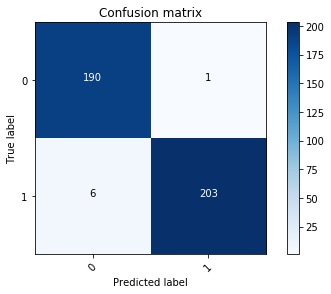


 Results:

Parameters:
------------ 

LEARNING RATE: 0.06
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 5 

LAMBDA: 0.01
Metrics:
---------- 

ACCURACY: 0.935
COST:  0.25658807356563446
CONFUSION MATRIX: 



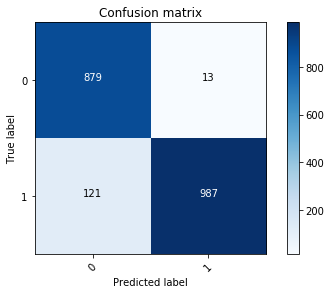

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.983 

TESTING ACCURACY ON FOLD 1 = 0.9849575 

CONFUSION MATRIX OF FOLD 1


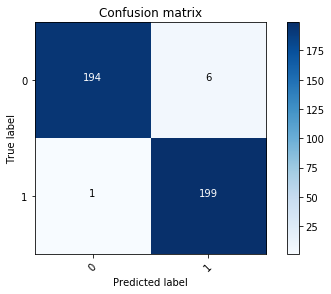

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.9595 

TESTING ACCURACY ON FOLD 2 = 0.95239875 

CONFUSION MATRIX OF FOLD 2


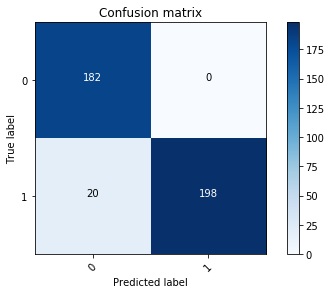

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.495 

TESTING ACCURACY ON FOLD 3 = 0.4937375 

CONFUSION MATRIX OF FOLD 3


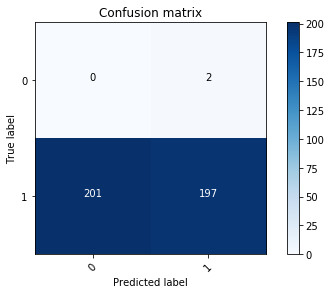

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.5 

TESTING ACCURACY ON FOLD 4 = 0.51625 

CONFUSION MATRIX OF FOLD 4


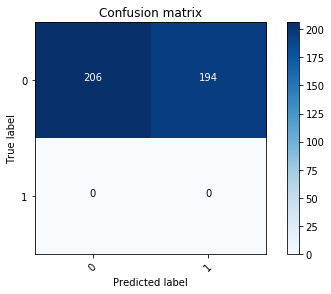

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.9435 

TESTING ACCURACY ON FOLD 5 = 0.9473587499999999 

CONFUSION MATRIX OF FOLD 5


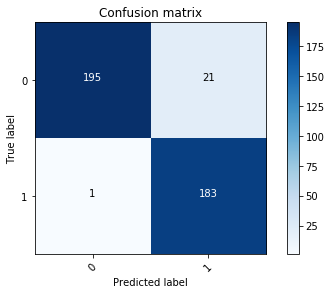


 Results:

Parameters:
------------ 

LEARNING RATE: 0.07
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 5 

LAMBDA: 0.01
Metrics:
---------- 

ACCURACY: 0.779
COST:  0.6733219072228681
CONFUSION MATRIX: 



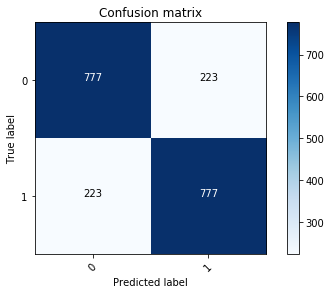

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.945 

TESTING ACCURACY ON FOLD 1 = 0.9498624999999999 

CONFUSION MATRIX OF FOLD 1


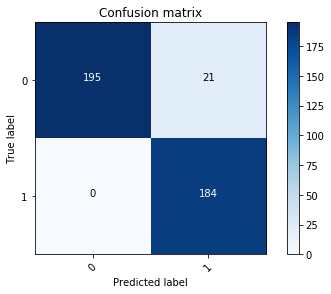

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.9815 

TESTING ACCURACY ON FOLD 2 = 0.97745375 

CONFUSION MATRIX OF FOLD 2


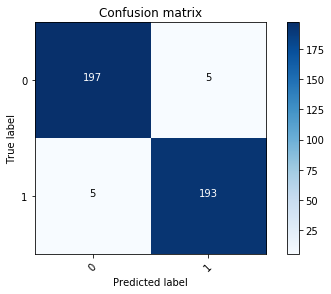

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.9745 

TESTING ACCURACY ON FOLD 3 = 0.96993625 

CONFUSION MATRIX OF FOLD 3


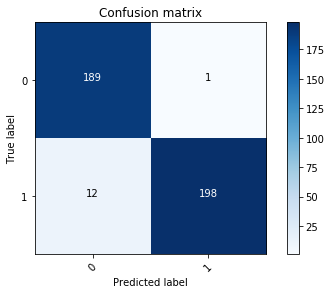

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.563 

TESTING ACCURACY ON FOLD 4 = 0.5864075 

CONFUSION MATRIX OF FOLD 4


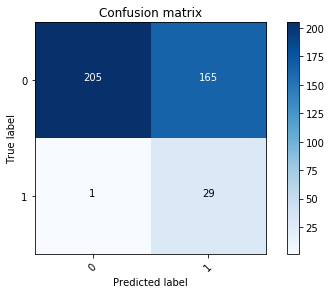

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.961 

TESTING ACCURACY ON FOLD 5 = 0.9574025 

CONFUSION MATRIX OF FOLD 5


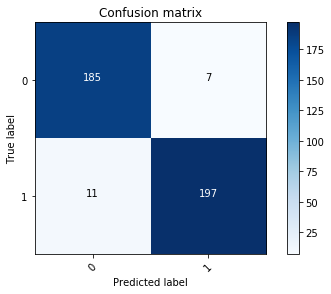


 Results:

Parameters:
------------ 

LEARNING RATE: 0.08
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 5 

LAMBDA: 0.01
Metrics:
---------- 

ACCURACY: 0.888
COST:  0.509346863351179
CONFUSION MATRIX: 



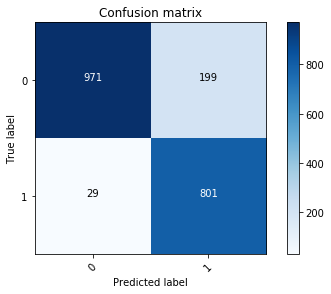

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.983 

TESTING ACCURACY ON FOLD 1 = 0.9849575 

CONFUSION MATRIX OF FOLD 1


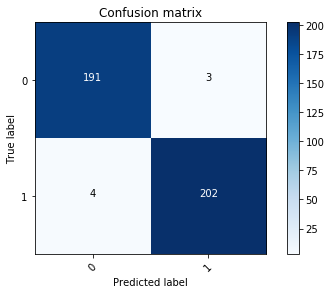

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.9845 

TESTING ACCURACY ON FOLD 2 = 0.9799612500000001 

CONFUSION MATRIX OF FOLD 2


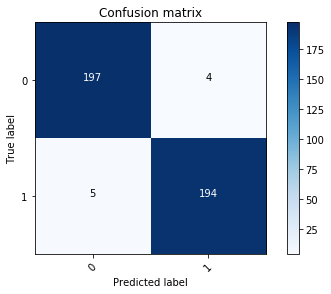

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.977 

TESTING ACCURACY ON FOLD 3 = 0.9799424999999999 

CONFUSION MATRIX OF FOLD 3


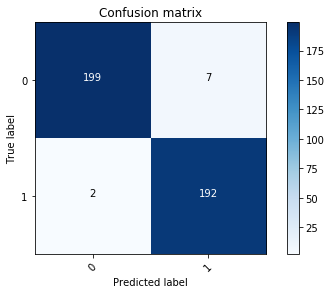

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.983 

TESTING ACCURACY ON FOLD 4 = 0.9799575 

CONFUSION MATRIX OF FOLD 4


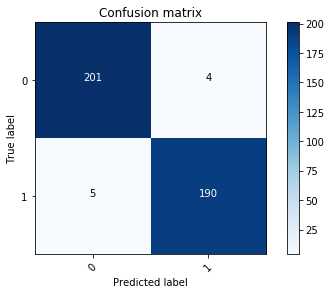

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.983 

TESTING ACCURACY ON FOLD 5 = 0.9849575 

CONFUSION MATRIX OF FOLD 5


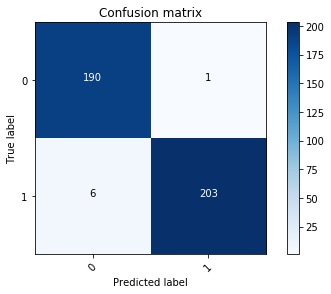


 Results:

Parameters:
------------ 

LEARNING RATE: 0.09
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 5 

LAMBDA: 0.01
Metrics:
---------- 

ACCURACY: 0.982
COST:  0.20858801915475647
CONFUSION MATRIX: 



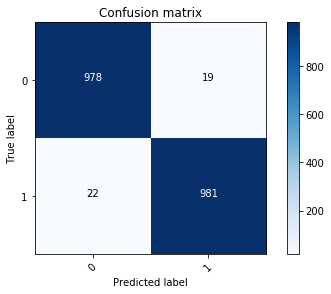

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.979 

TESTING ACCURACY ON FOLD 1 = 0.9774474999999999 

CONFUSION MATRIX OF FOLD 1


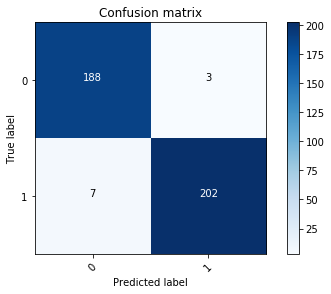

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.98 

TESTING ACCURACY ON FOLD 2 = 0.98245 

CONFUSION MATRIX OF FOLD 2


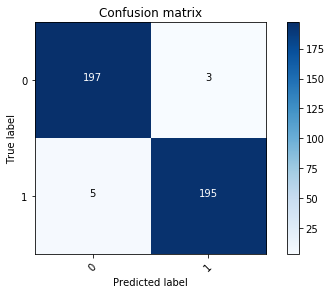

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.976 

TESTING ACCURACY ON FOLD 3 = 0.97494 

CONFUSION MATRIX OF FOLD 3


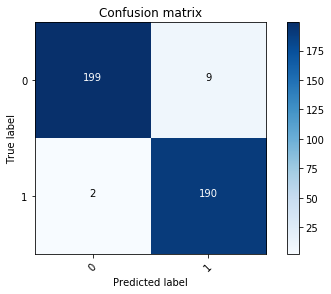

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.744 

TESTING ACCURACY ON FOLD 4 = 0.73936 

CONFUSION MATRIX OF FOLD 4


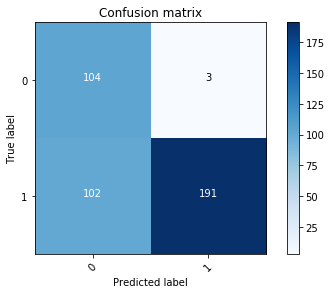

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.963 

TESTING ACCURACY ON FOLD 5 = 0.9699074999999999 

CONFUSION MATRIX OF FOLD 5


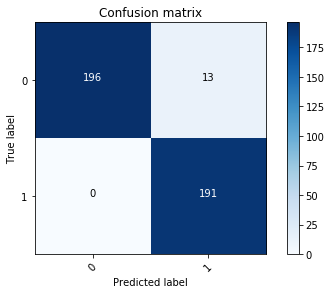


 Results:

Parameters:
------------ 

LEARNING RATE: 0.1
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 5 

LAMBDA: 0.01
Metrics:
---------- 

ACCURACY: 0.929
COST:  1.7296198291453142
CONFUSION MATRIX: 



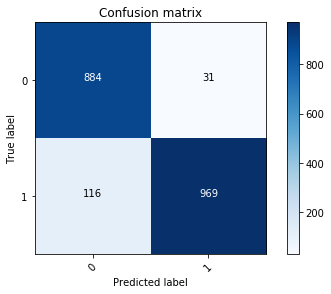

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.975 

TESTING ACCURACY ON FOLD 1 = 0.9749375 

CONFUSION MATRIX OF FOLD 1


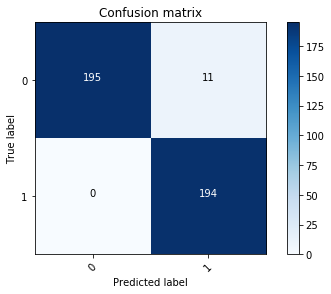

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.9815 

TESTING ACCURACY ON FOLD 2 = 0.97495375 

CONFUSION MATRIX OF FOLD 2


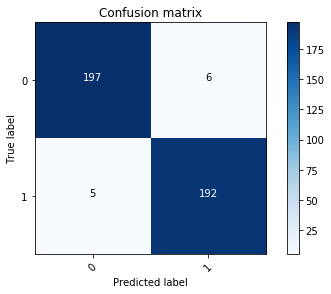

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.9795 

TESTING ACCURACY ON FOLD 3 = 0.98494875 

CONFUSION MATRIX OF FOLD 3


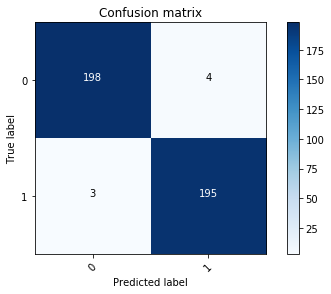

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.5035 

TESTING ACCURACY ON FOLD 4 = 0.52875875 

CONFUSION MATRIX OF FOLD 4


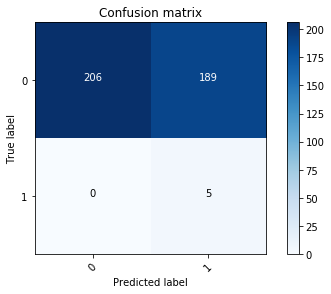

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.983 

TESTING ACCURACY ON FOLD 5 = 0.9849575 

CONFUSION MATRIX OF FOLD 5


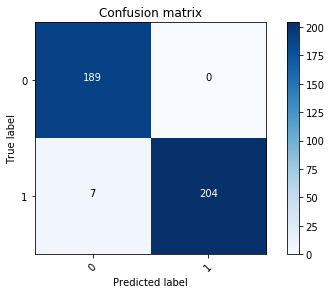


 Results:

Parameters:
------------ 

LEARNING RATE: 0.11
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 5 

LAMBDA: 0.01
Metrics:
---------- 

ACCURACY: 0.89
COST:  0.30945615227510803
CONFUSION MATRIX: 



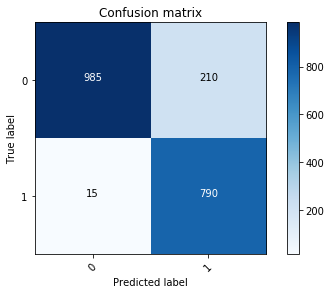

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.9865 

TESTING ACCURACY ON FOLD 1 = 0.9899662499999999 

CONFUSION MATRIX OF FOLD 1


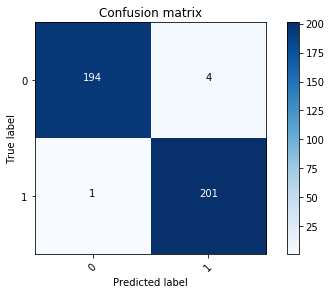

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.9485 

TESTING ACCURACY ON FOLD 2 = 0.9473712499999999 

CONFUSION MATRIX OF FOLD 2


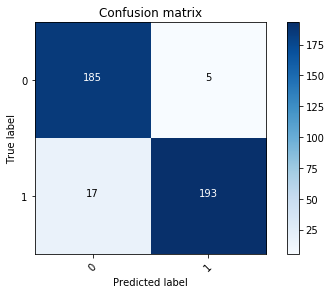

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.74 

TESTING ACCURACY ON FOLD 3 = 0.71935 

CONFUSION MATRIX OF FOLD 3


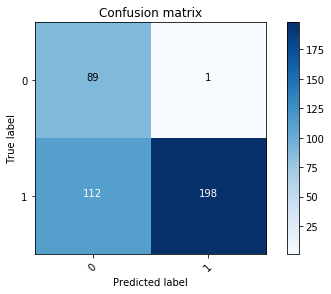

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.741 

TESTING ACCURACY ON FOLD 4 = 0.7368524999999999 

CONFUSION MATRIX OF FOLD 4


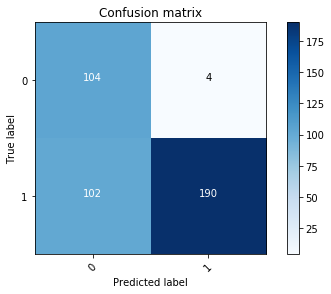

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.965 

TESTING ACCURACY ON FOLD 5 = 0.9624125000000001 

CONFUSION MATRIX OF FOLD 5


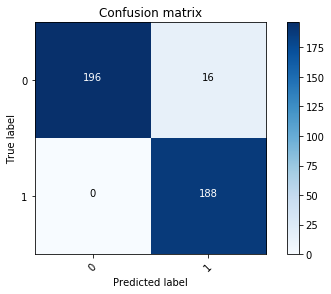


 Results:

Parameters:
------------ 

LEARNING RATE: 0.12
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 5 

LAMBDA: 0.01
Metrics:
---------- 

ACCURACY: 0.871
COST:  0.3004474377031969
CONFUSION MATRIX: 



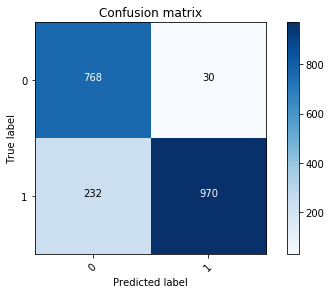

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.9695 

TESTING ACCURACY ON FOLD 1 = 0.97492375 

CONFUSION MATRIX OF FOLD 1


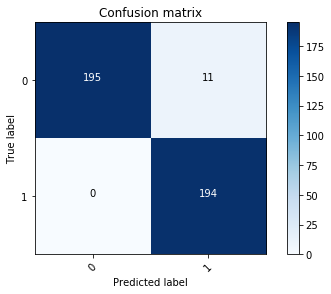

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.983 

TESTING ACCURACY ON FOLD 2 = 0.9824575 

CONFUSION MATRIX OF FOLD 2


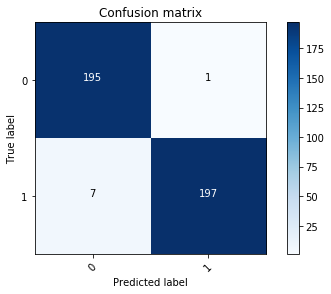

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.9815 

TESTING ACCURACY ON FOLD 3 = 0.9874537499999999 

CONFUSION MATRIX OF FOLD 3


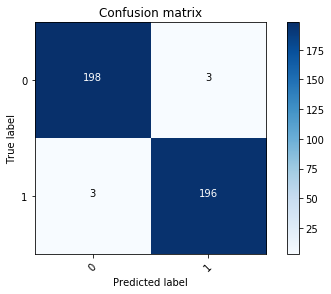

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.983 

TESTING ACCURACY ON FOLD 4 = 0.9824575 

CONFUSION MATRIX OF FOLD 4


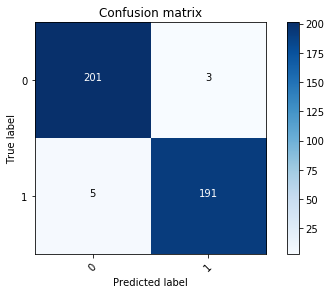

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.744 

TESTING ACCURACY ON FOLD 5 = 0.74436 

CONFUSION MATRIX OF FOLD 5


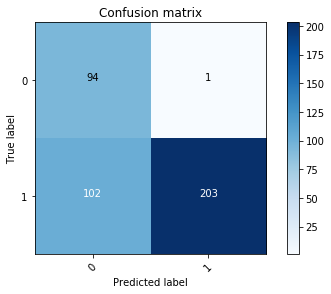


 Results:

Parameters:
------------ 

LEARNING RATE: 0.13
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 5 

LAMBDA: 0.01
Metrics:
---------- 

ACCURACY: 0.934
COST:  37.054422595884986
CONFUSION MATRIX: 



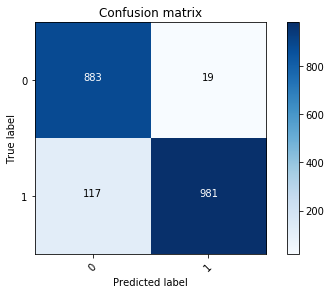

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.975 

TESTING ACCURACY ON FOLD 1 = 0.9774375000000001 

CONFUSION MATRIX OF FOLD 1


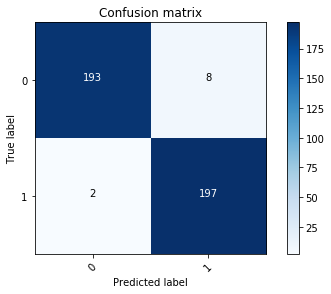

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.9805 

TESTING ACCURACY ON FOLD 2 = 0.97245125 

CONFUSION MATRIX OF FOLD 2


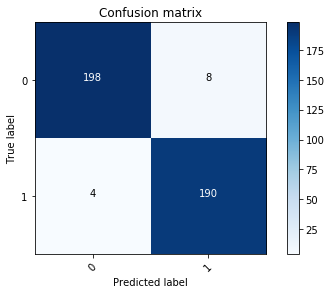

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.9695 

TESTING ACCURACY ON FOLD 3 = 0.9724237499999999 

CONFUSION MATRIX OF FOLD 3


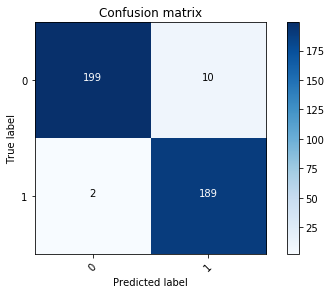

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.9825 

TESTING ACCURACY ON FOLD 4 = 0.98245625 

CONFUSION MATRIX OF FOLD 4


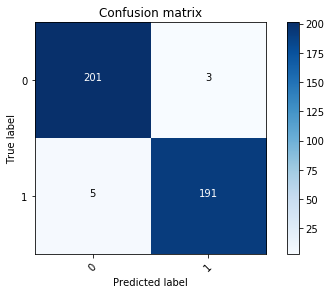

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.975 

TESTING ACCURACY ON FOLD 5 = 0.9774375000000001 

CONFUSION MATRIX OF FOLD 5


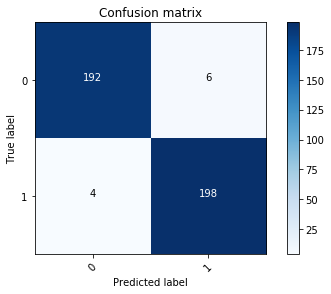


 Results:

Parameters:
------------ 

LEARNING RATE: 0.14
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 5 

LAMBDA: 0.01
Metrics:
---------- 

ACCURACY: 0.976
COST:  0.7874139392518942
CONFUSION MATRIX: 



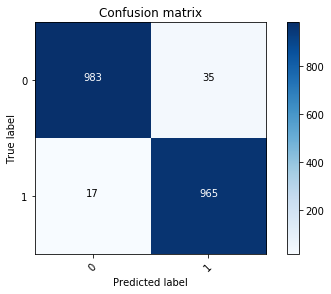

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.982 

TESTING ACCURACY ON FOLD 1 = 0.987455 

CONFUSION MATRIX OF FOLD 1


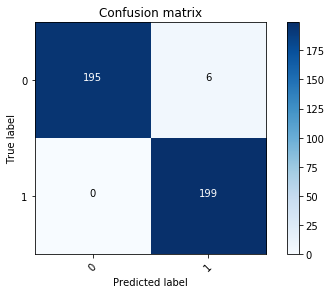

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.7445 

TESTING ACCURACY ON FOLD 2 = 0.73686125 

CONFUSION MATRIX OF FOLD 2


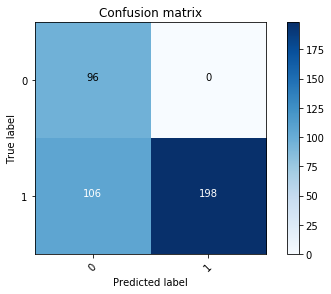

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.982 

TESTING ACCURACY ON FOLD 3 = 0.992455 

CONFUSION MATRIX OF FOLD 3


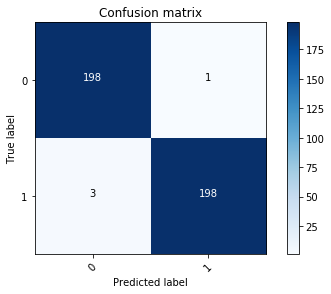

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.964 

TESTING ACCURACY ON FOLD 4 = 0.95991 

CONFUSION MATRIX OF FOLD 4


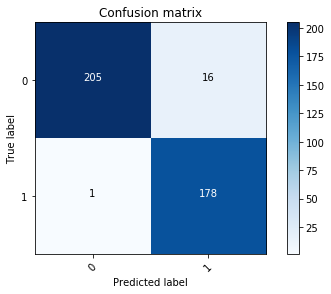

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.693 

TESTING ACCURACY ON FOLD 5 = 0.7092324999999999 

CONFUSION MATRIX OF FOLD 5


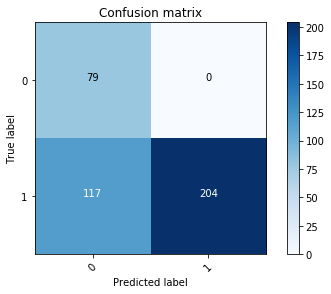


 Results:

Parameters:
------------ 

LEARNING RATE: 0.15
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 5 

LAMBDA: 0.01
Metrics:
---------- 

ACCURACY: 0.877
COST:  41.540869534253176
CONFUSION MATRIX: 



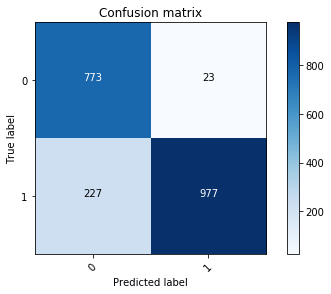

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.967 

TESTING ACCURACY ON FOLD 1 = 0.9799175 

CONFUSION MATRIX OF FOLD 1


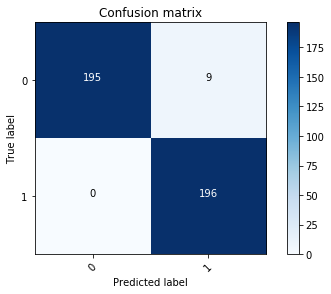

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.5 

TESTING ACCURACY ON FOLD 2 = 0.50625 

CONFUSION MATRIX OF FOLD 2


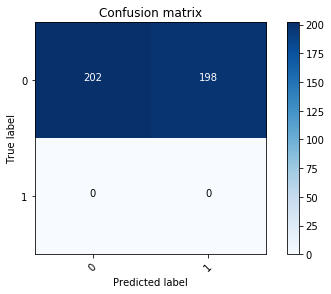

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.94 

TESTING ACCURACY ON FOLD 3 = 0.94485 

CONFUSION MATRIX OF FOLD 3


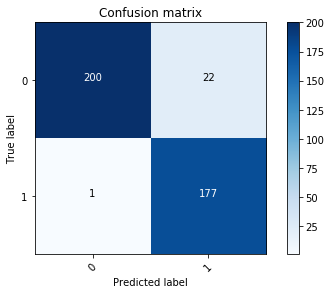

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.962 

TESTING ACCURACY ON FOLD 4 = 0.952405 

CONFUSION MATRIX OF FOLD 4


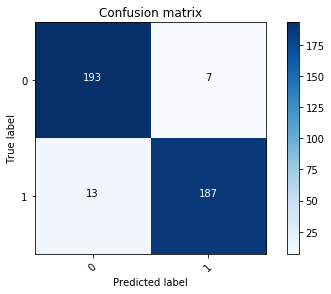

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.961 

TESTING ACCURACY ON FOLD 5 = 0.9674025 

CONFUSION MATRIX OF FOLD 5


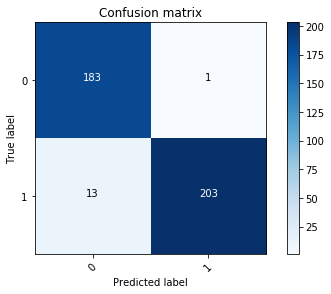


 Results:

Parameters:
------------ 

LEARNING RATE: 0.16
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 5 

LAMBDA: 0.01
Metrics:
---------- 

ACCURACY: 0.87
COST:  0.7030138973853037
CONFUSION MATRIX: 



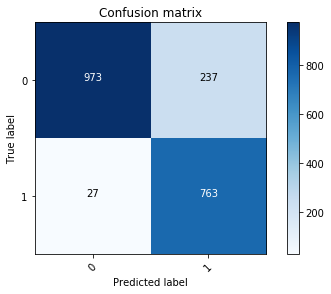

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.9665 

TESTING ACCURACY ON FOLD 1 = 0.9849162499999999 

CONFUSION MATRIX OF FOLD 1


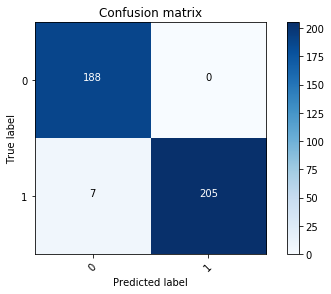

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.9105 

TESTING ACCURACY ON FOLD 2 = 0.9297762500000001 

CONFUSION MATRIX OF FOLD 2


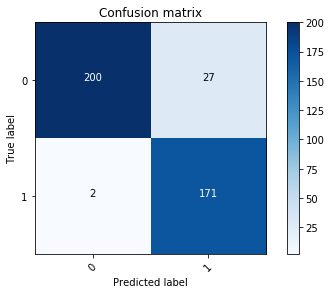

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.9625 

TESTING ACCURACY ON FOLD 3 = 0.9674062499999999 

CONFUSION MATRIX OF FOLD 3


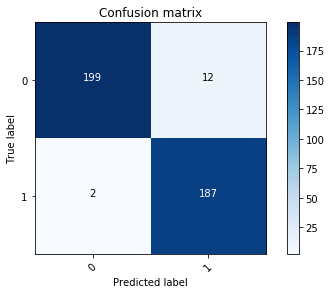

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.98 

TESTING ACCURACY ON FOLD 4 = 0.97745 

CONFUSION MATRIX OF FOLD 4


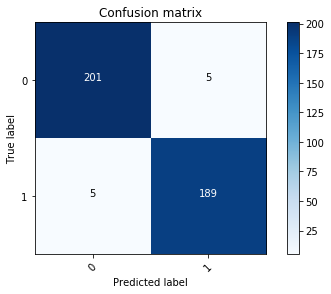

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.972 

TESTING ACCURACY ON FOLD 5 = 0.9674299999999999 

CONFUSION MATRIX OF FOLD 5


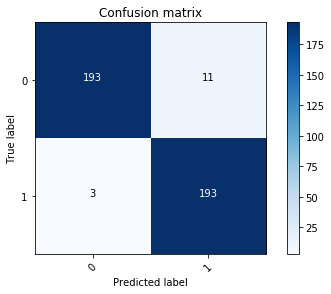


 Results:

Parameters:
------------ 

LEARNING RATE: 0.17
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 5 

LAMBDA: 0.01
Metrics:
---------- 

ACCURACY: 0.965
COST:  0.448392123105224
CONFUSION MATRIX: 



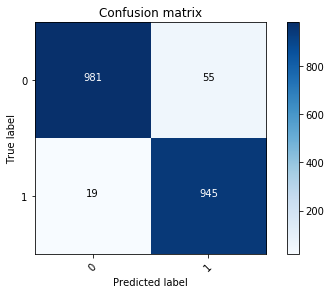

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.9835 

TESTING ACCURACY ON FOLD 1 = 0.9874587499999999 

CONFUSION MATRIX OF FOLD 1


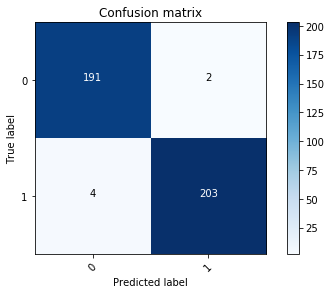

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.5 

TESTING ACCURACY ON FOLD 2 = 0.50625 

CONFUSION MATRIX OF FOLD 2


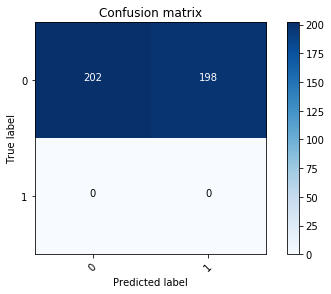

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.5 

TESTING ACCURACY ON FOLD 3 = 0.50375 

CONFUSION MATRIX OF FOLD 3


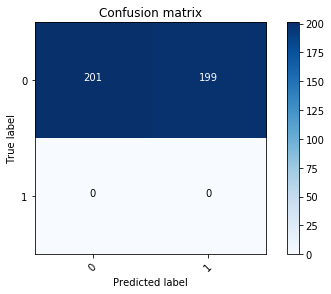

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.926 

TESTING ACCURACY ON FOLD 4 = 0.912315 

CONFUSION MATRIX OF FOLD 4


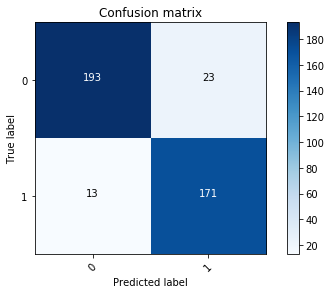

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.744 

TESTING ACCURACY ON FOLD 5 = 0.7468600000000001 

CONFUSION MATRIX OF FOLD 5


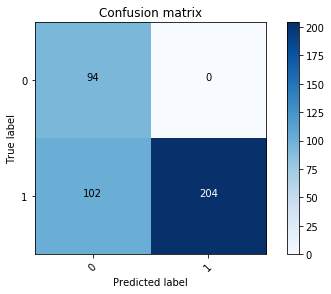


 Results:

Parameters:
------------ 

LEARNING RATE: 0.18
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 5 

LAMBDA: 0.01
Metrics:
---------- 

ACCURACY: 0.731
COST:  31.447813792480332
CONFUSION MATRIX: 



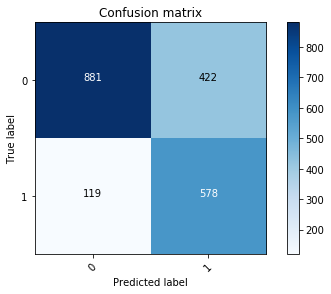

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.977 

TESTING ACCURACY ON FOLD 1 = 0.9799424999999999 

CONFUSION MATRIX OF FOLD 1


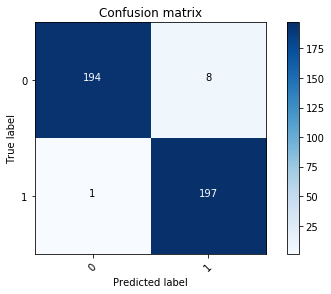

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.983 

TESTING ACCURACY ON FOLD 2 = 0.9774575 

CONFUSION MATRIX OF FOLD 2


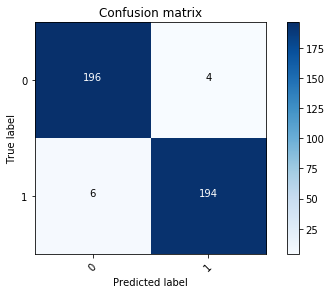

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.979 

TESTING ACCURACY ON FOLD 3 = 0.9824474999999999 

CONFUSION MATRIX OF FOLD 3


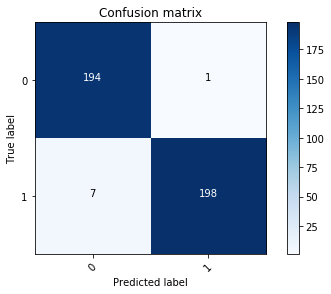

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.9775 

TESTING ACCURACY ON FOLD 4 = 0.97744375 

CONFUSION MATRIX OF FOLD 4


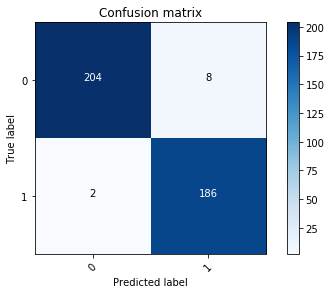

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.9825 

TESTING ACCURACY ON FOLD 5 = 0.9899562500000001 

CONFUSION MATRIX OF FOLD 5


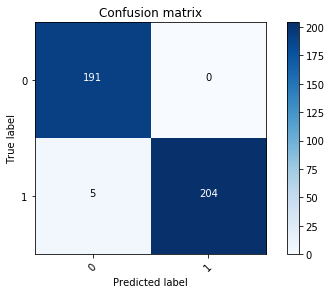


 Results:

Parameters:
------------ 

LEARNING RATE: 0.19
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 5 

LAMBDA: 0.01
Metrics:
---------- 

ACCURACY: 0.981
COST:  1.099630643787004
CONFUSION MATRIX: 



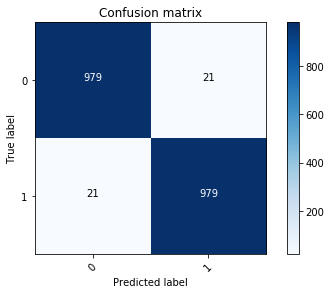

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.966 

TESTING ACCURACY ON FOLD 1 = 0.969915 

CONFUSION MATRIX OF FOLD 1


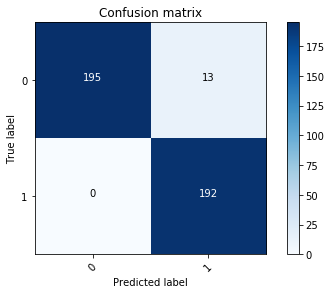

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.98 

TESTING ACCURACY ON FOLD 2 = 0.9749500000000001 

CONFUSION MATRIX OF FOLD 2


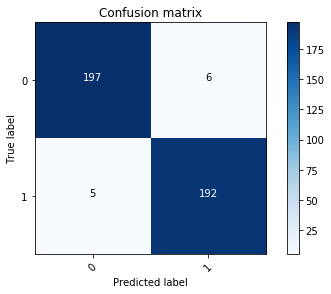

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.9655 

TESTING ACCURACY ON FOLD 3 = 0.9674137500000001 

CONFUSION MATRIX OF FOLD 3


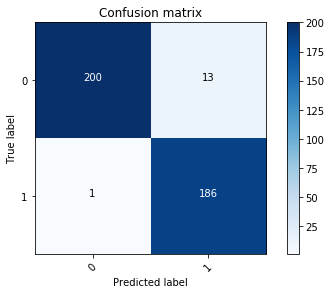

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.97 

TESTING ACCURACY ON FOLD 4 = 0.964925 

CONFUSION MATRIX OF FOLD 4


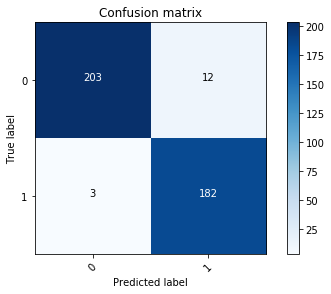

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.976 

TESTING ACCURACY ON FOLD 5 = 0.97994 

CONFUSION MATRIX OF FOLD 5


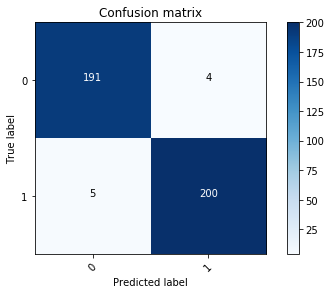


 Results:

Parameters:
------------ 

LEARNING RATE: 0.2
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 5 

LAMBDA: 0.01
Metrics:
---------- 

ACCURACY: 0.971
COST:  0.5846492943095699
CONFUSION MATRIX: 



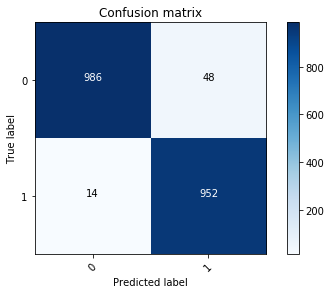

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.959 

TESTING ACCURACY ON FOLD 1 = 0.9473975 

CONFUSION MATRIX OF FOLD 1


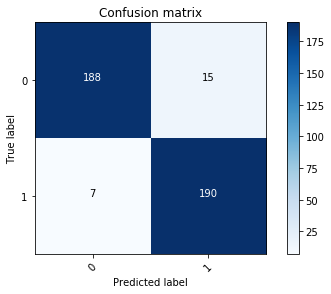

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.979 

TESTING ACCURACY ON FOLD 2 = 0.9824474999999999 

CONFUSION MATRIX OF FOLD 2


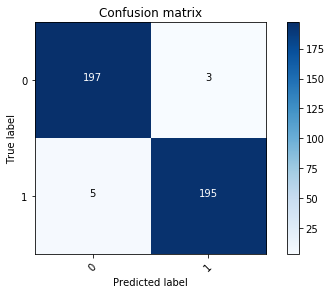

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.963 

TESTING ACCURACY ON FOLD 3 = 0.9649074999999999 

CONFUSION MATRIX OF FOLD 3


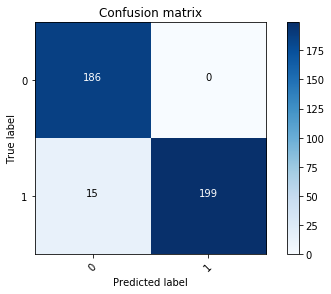

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.975 

TESTING ACCURACY ON FOLD 4 = 0.9749375 

CONFUSION MATRIX OF FOLD 4


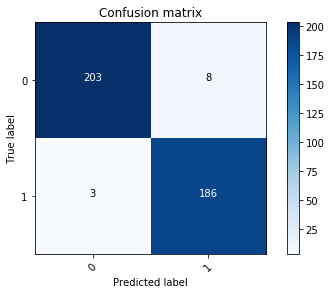

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.9745 

TESTING ACCURACY ON FOLD 5 = 0.9824362500000001 

CONFUSION MATRIX OF FOLD 5


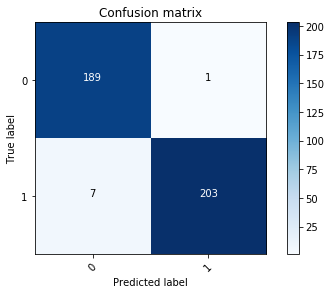


 Results:

Parameters:
------------ 

LEARNING RATE: 0.21
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 5 

LAMBDA: 0.01
Metrics:
---------- 

ACCURACY: 0.97
COST:  1.9415023684405888
CONFUSION MATRIX: 



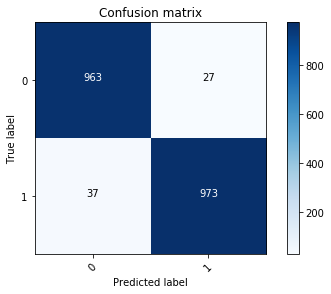

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.979 

TESTING ACCURACY ON FOLD 1 = 0.9799475 

CONFUSION MATRIX OF FOLD 1


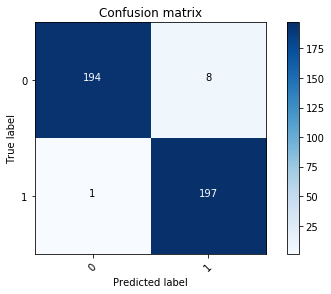

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.9795 

TESTING ACCURACY ON FOLD 2 = 0.9774487500000001 

CONFUSION MATRIX OF FOLD 2


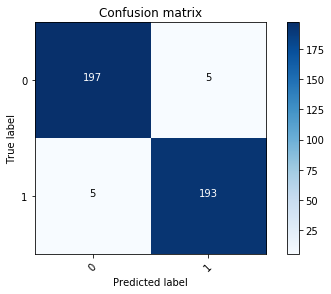

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.9745 

TESTING ACCURACY ON FOLD 3 = 0.9799362500000001 

CONFUSION MATRIX OF FOLD 3


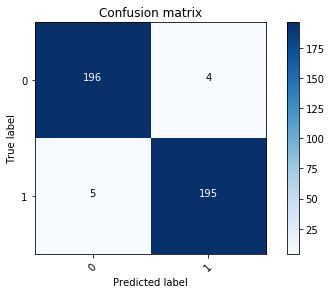

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.983 

TESTING ACCURACY ON FOLD 4 = 0.9799575 

CONFUSION MATRIX OF FOLD 4


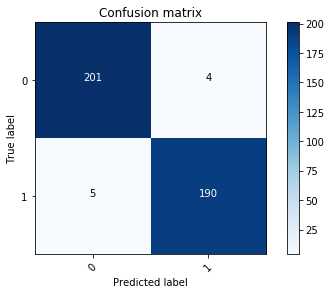

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.9725 

TESTING ACCURACY ON FOLD 5 = 0.9799312499999999 

CONFUSION MATRIX OF FOLD 5


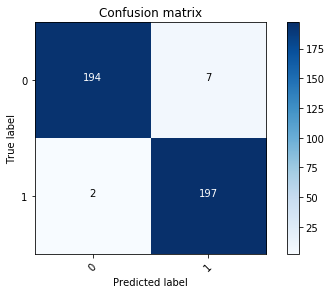


 Results:

Parameters:
------------ 

LEARNING RATE: 0.22
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 5 

LAMBDA: 0.01
Metrics:
---------- 

ACCURACY: 0.979
COST:  2.78192819446397
CONFUSION MATRIX: 



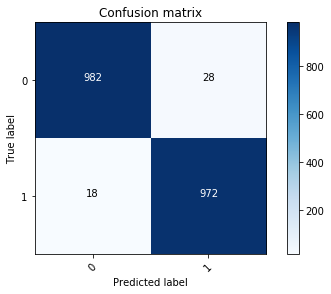

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.984 

TESTING ACCURACY ON FOLD 1 = 0.9899600000000001 

CONFUSION MATRIX OF FOLD 1


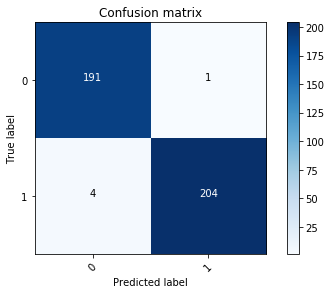

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.964 

TESTING ACCURACY ON FOLD 2 = 0.96991 

CONFUSION MATRIX OF FOLD 2


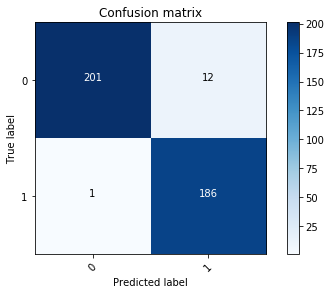

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.9825 

TESTING ACCURACY ON FOLD 3 = 0.98745625 

CONFUSION MATRIX OF FOLD 3


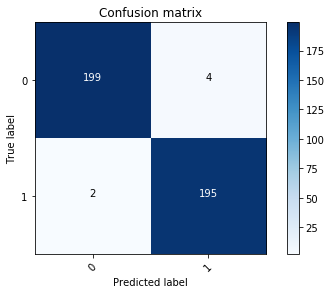

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.9825 

TESTING ACCURACY ON FOLD 4 = 0.9849562500000001 

CONFUSION MATRIX OF FOLD 4


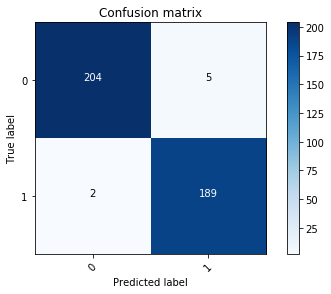

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.5 

TESTING ACCURACY ON FOLD 5 = 0.49125 

CONFUSION MATRIX OF FOLD 5


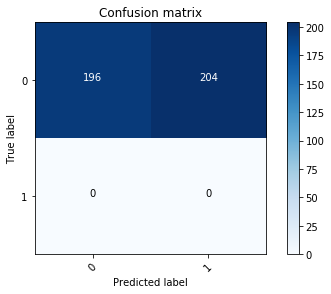


 Results:

Parameters:
------------ 

LEARNING RATE: 0.23
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 5 

LAMBDA: 0.01
Metrics:
---------- 

ACCURACY: 0.885
COST:  43.408725857130705
CONFUSION MATRIX: 



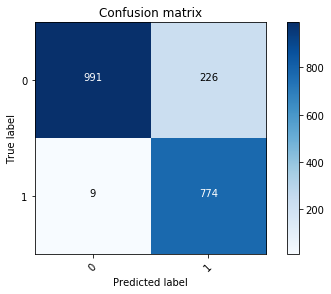

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.974 

TESTING ACCURACY ON FOLD 1 = 0.9774349999999999 

CONFUSION MATRIX OF FOLD 1


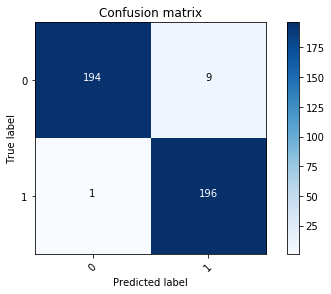

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.9845 

TESTING ACCURACY ON FOLD 2 = 0.9774612500000001 

CONFUSION MATRIX OF FOLD 2


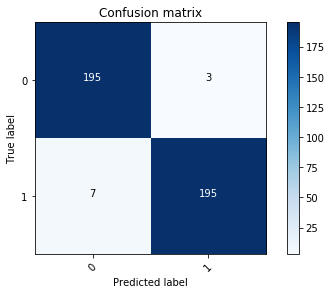

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.975 

TESTING ACCURACY ON FOLD 3 = 0.9824375000000001 

CONFUSION MATRIX OF FOLD 3


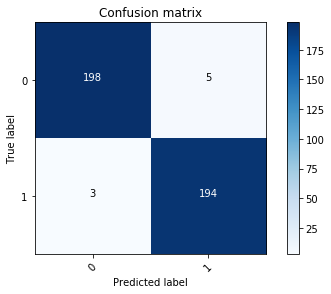

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.9795 

TESTING ACCURACY ON FOLD 4 = 0.97994875 

CONFUSION MATRIX OF FOLD 4


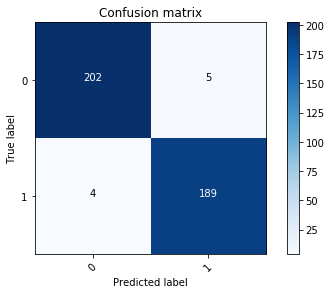

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.948 

TESTING ACCURACY ON FOLD 5 = 0.94987 

CONFUSION MATRIX OF FOLD 5


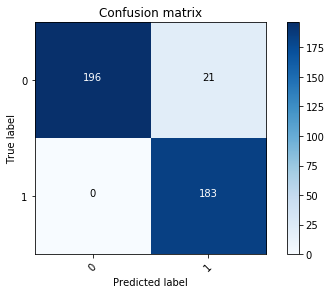


 Results:

Parameters:
------------ 

LEARNING RATE: 0.24
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 5 

LAMBDA: 0.01
Metrics:
---------- 

ACCURACY: 0.973
COST:  0.8064823280576722
CONFUSION MATRIX: 



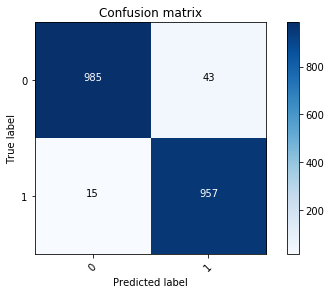

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.7435 

TESTING ACCURACY ON FOLD 1 = 0.77935875 

CONFUSION MATRIX OF FOLD 1


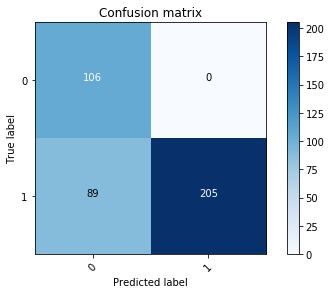

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.7405 

TESTING ACCURACY ON FOLD 2 = 0.73185125 

CONFUSION MATRIX OF FOLD 2


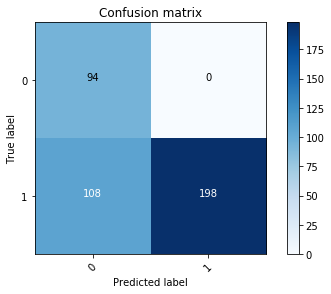

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.959 

TESTING ACCURACY ON FOLD 3 = 0.9698975 

CONFUSION MATRIX OF FOLD 3


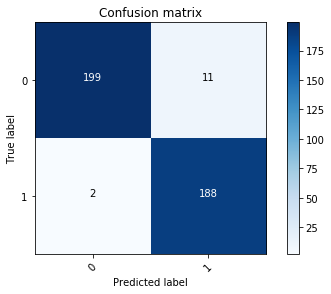

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.9805 

TESTING ACCURACY ON FOLD 4 = 0.97995125 

CONFUSION MATRIX OF FOLD 4


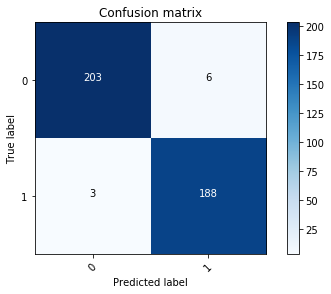

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.97 

TESTING ACCURACY ON FOLD 5 = 0.969925 

CONFUSION MATRIX OF FOLD 5


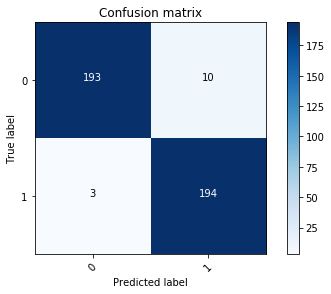


 Results:

Parameters:
------------ 

LEARNING RATE: 0.25
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 5 

LAMBDA: 0.01
Metrics:
---------- 

ACCURACY: 0.886
COST:  1.1729555085723036
CONFUSION MATRIX: 



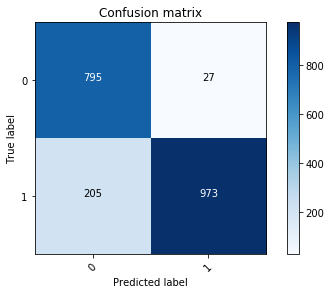

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.5 

TESTING ACCURACY ON FOLD 1 = 0.48875 

CONFUSION MATRIX OF FOLD 1


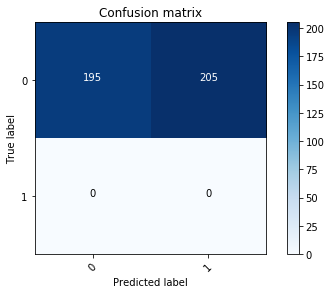

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.973 

TESTING ACCURACY ON FOLD 2 = 0.9774325 

CONFUSION MATRIX OF FOLD 2


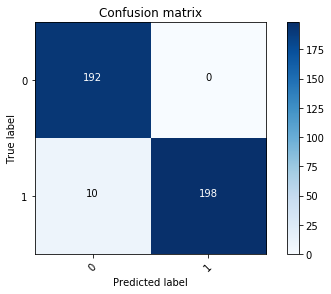

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.744 

TESTING ACCURACY ON FOLD 3 = 0.7268600000000001 

CONFUSION MATRIX OF FOLD 3


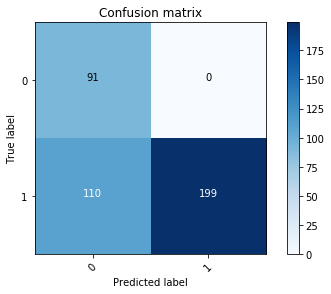

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.5 

TESTING ACCURACY ON FOLD 4 = 0.51625 

CONFUSION MATRIX OF FOLD 4


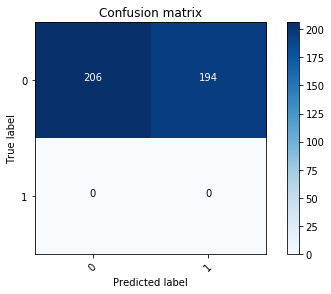

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.9845 

TESTING ACCURACY ON FOLD 5 = 0.98496125 

CONFUSION MATRIX OF FOLD 5


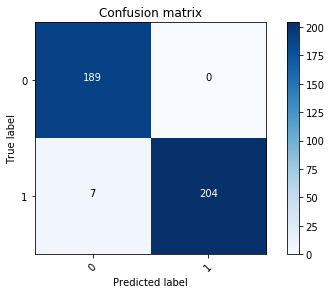


 Results:

Parameters:
------------ 

LEARNING RATE: 0.26
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 5 

LAMBDA: 0.01
Metrics:
---------- 

ACCURACY: 0.739
COST:  4.035730076625633
CONFUSION MATRIX: 



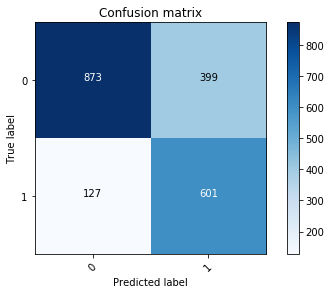

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.974 

TESTING ACCURACY ON FOLD 1 = 0.9724349999999999 

CONFUSION MATRIX OF FOLD 1


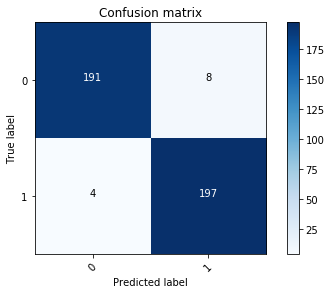

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.9795 

TESTING ACCURACY ON FOLD 2 = 0.9824487500000001 

CONFUSION MATRIX OF FOLD 2


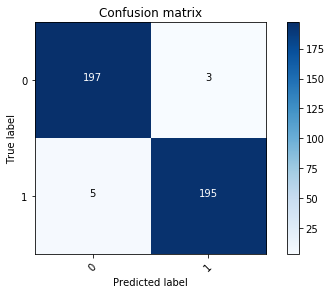

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.9815 

TESTING ACCURACY ON FOLD 3 = 0.98995375 

CONFUSION MATRIX OF FOLD 3


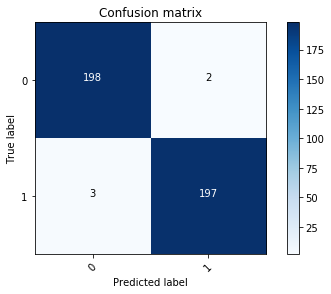

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.969 

TESTING ACCURACY ON FOLD 4 = 0.9674225 

CONFUSION MATRIX OF FOLD 4


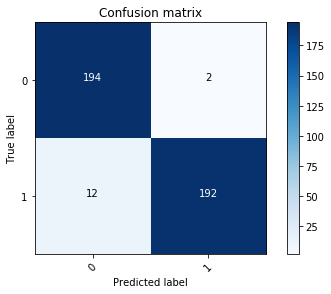

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.983 

TESTING ACCURACY ON FOLD 5 = 0.9849575 

CONFUSION MATRIX OF FOLD 5


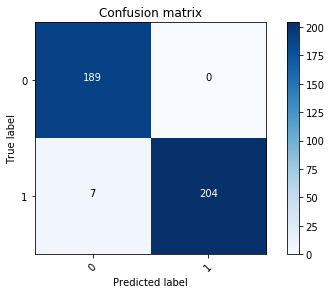


 Results:

Parameters:
------------ 

LEARNING RATE: 0.27
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 5 

LAMBDA: 0.01
Metrics:
---------- 

ACCURACY: 0.979
COST:  0.9072658877462614
CONFUSION MATRIX: 



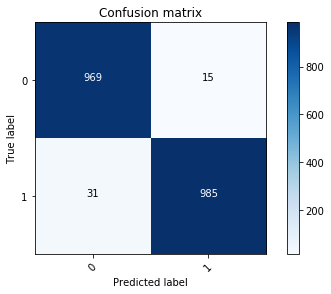

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.9675 

TESTING ACCURACY ON FOLD 1 = 0.9699187499999999 

CONFUSION MATRIX OF FOLD 1


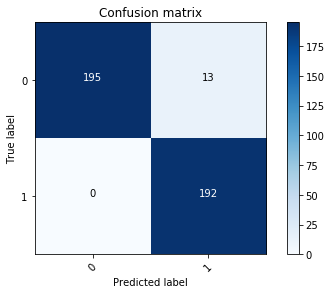

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.9555 

TESTING ACCURACY ON FOLD 2 = 0.9548887500000001 

CONFUSION MATRIX OF FOLD 2


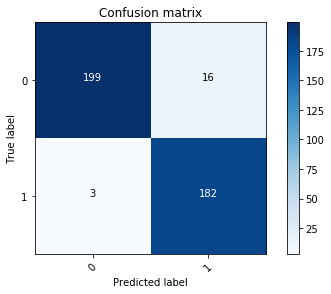

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.981 

TESTING ACCURACY ON FOLD 3 = 0.9874525 

CONFUSION MATRIX OF FOLD 3


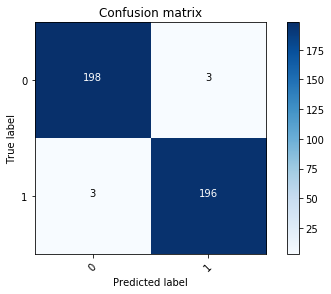

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.74 

TESTING ACCURACY ON FOLD 4 = 0.72685 

CONFUSION MATRIX OF FOLD 4


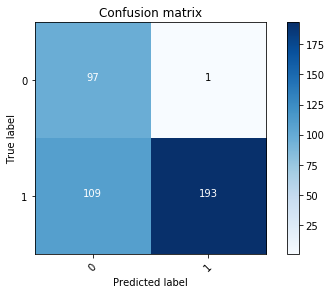

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.9615 

TESTING ACCURACY ON FOLD 5 = 0.96990375 

CONFUSION MATRIX OF FOLD 5


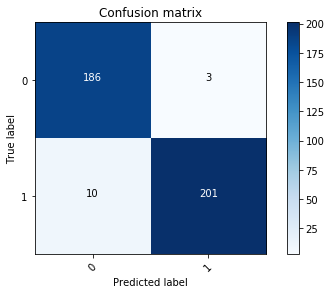


 Results:

Parameters:
------------ 

LEARNING RATE: 0.28
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 5 

LAMBDA: 0.01
Metrics:
---------- 

ACCURACY: 0.922
COST:  2.694695243029915
CONFUSION MATRIX: 



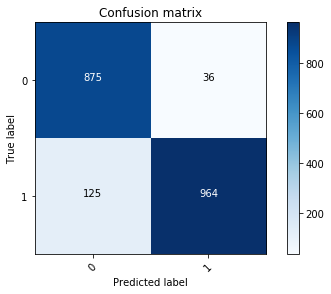

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.986 

TESTING ACCURACY ON FOLD 1 = 0.989965 

CONFUSION MATRIX OF FOLD 1


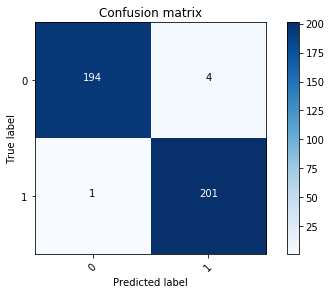

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.9765 

TESTING ACCURACY ON FOLD 2 = 0.9774412499999999 

CONFUSION MATRIX OF FOLD 2


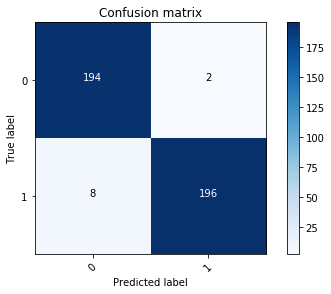

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.979 

TESTING ACCURACY ON FOLD 3 = 0.9849475 

CONFUSION MATRIX OF FOLD 3


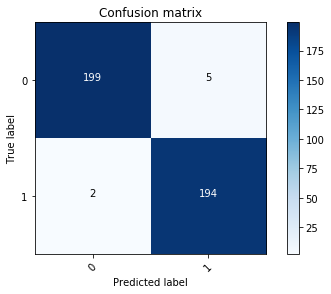

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.6695 

TESTING ACCURACY ON FOLD 4 = 0.69667375 

CONFUSION MATRIX OF FOLD 4


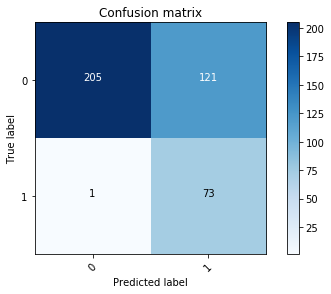

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.9715 

TESTING ACCURACY ON FOLD 5 = 0.97992875 

CONFUSION MATRIX OF FOLD 5


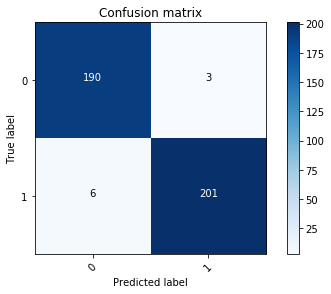


 Results:

Parameters:
------------ 

LEARNING RATE: 0.29
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 5 

LAMBDA: 0.01
Metrics:
---------- 

ACCURACY: 0.926
COST:  3.8427175856428804
CONFUSION MATRIX: 



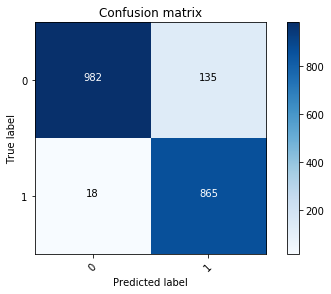

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.9805 

TESTING ACCURACY ON FOLD 1 = 0.9849512500000001 

CONFUSION MATRIX OF FOLD 1


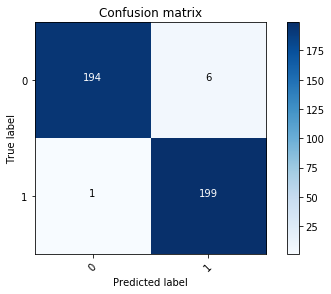

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.7435 

TESTING ACCURACY ON FOLD 2 = 0.73185875 

CONFUSION MATRIX OF FOLD 2


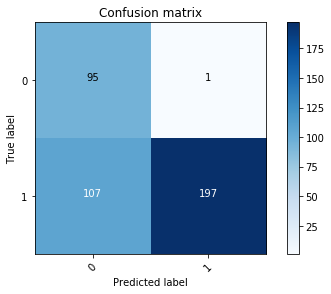

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.9695 

TESTING ACCURACY ON FOLD 3 = 0.96492375 

CONFUSION MATRIX OF FOLD 3


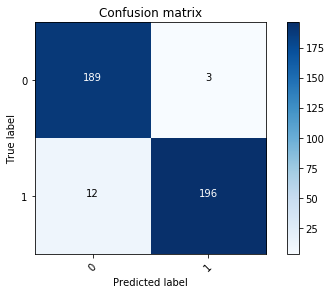

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.95 

TESTING ACCURACY ON FOLD 4 = 0.942375 

CONFUSION MATRIX OF FOLD 4


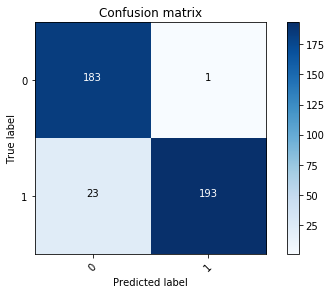

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.9685 

TESTING ACCURACY ON FOLD 5 = 0.9649212500000001 

CONFUSION MATRIX OF FOLD 5


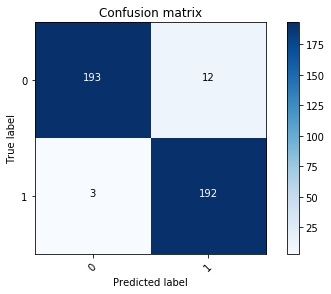


 Results:

Parameters:
------------ 

LEARNING RATE: 0.3
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 5 

LAMBDA: 0.01
Metrics:
---------- 

ACCURACY: 0.918
COST:  0.2549382260034626
CONFUSION MATRIX: 



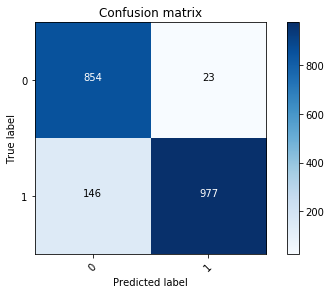

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.984 

TESTING ACCURACY ON FOLD 1 = 0.9949600000000001 

CONFUSION MATRIX OF FOLD 1


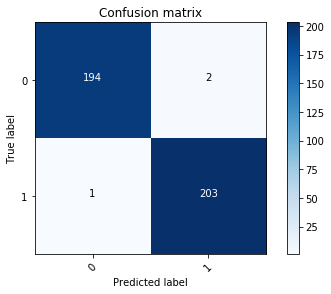

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.9885 

TESTING ACCURACY ON FOLD 2 = 0.98747125 

CONFUSION MATRIX OF FOLD 2


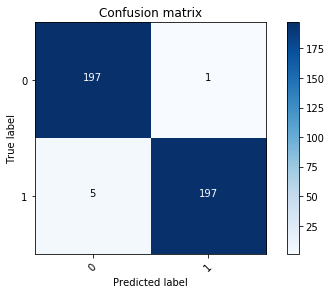

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.9815 

TESTING ACCURACY ON FOLD 3 = 0.98495375 

CONFUSION MATRIX OF FOLD 3


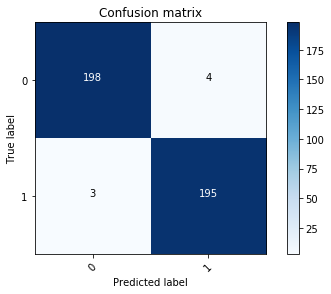

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.744 

TESTING ACCURACY ON FOLD 4 = 0.7418600000000001 

CONFUSION MATRIX OF FOLD 4


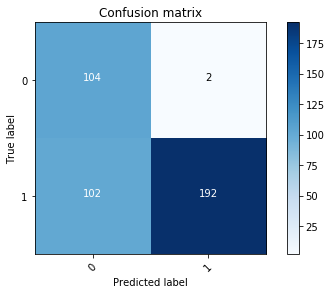

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.9155 

TESTING ACCURACY ON FOLD 5 = 0.91478875 

CONFUSION MATRIX OF FOLD 5


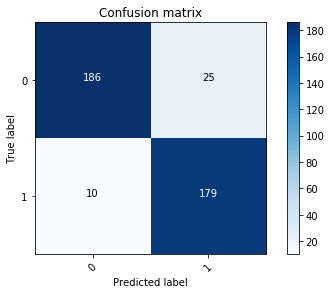


 Results:

Parameters:
------------ 

LEARNING RATE: 0.31
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 5 

LAMBDA: 0.01
Metrics:
---------- 

ACCURACY: 0.925
COST:  7.415003525297372
CONFUSION MATRIX: 



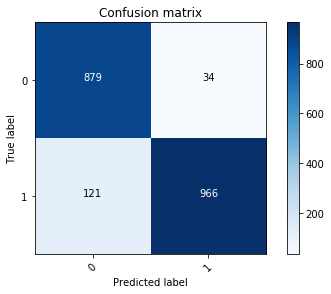

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.9765 

TESTING ACCURACY ON FOLD 1 = 0.9824412499999999 

CONFUSION MATRIX OF FOLD 1


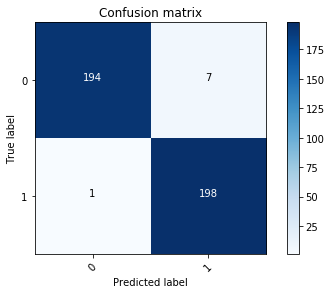

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.9845 

TESTING ACCURACY ON FOLD 2 = 0.9824612500000001 

CONFUSION MATRIX OF FOLD 2


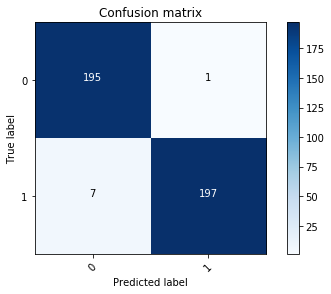

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.9655 

TESTING ACCURACY ON FOLD 3 = 0.97491375 

CONFUSION MATRIX OF FOLD 3


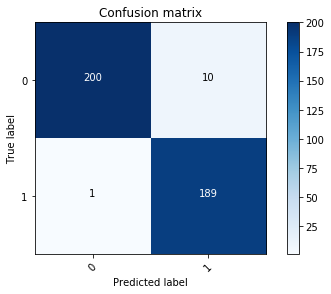

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.9435 

TESTING ACCURACY ON FOLD 4 = 0.94985875 

CONFUSION MATRIX OF FOLD 4


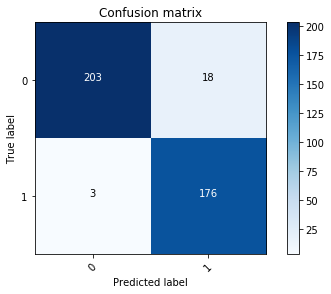

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.687 

TESTING ACCURACY ON FOLD 5 = 0.6542175 

CONFUSION MATRIX OF FOLD 5


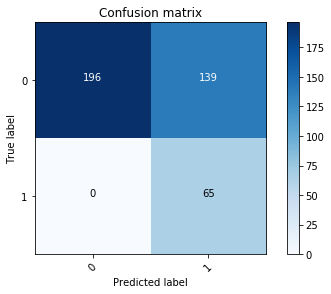


 Results:

Parameters:
------------ 

LEARNING RATE: 0.32
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 5 

LAMBDA: 0.01
Metrics:
---------- 

ACCURACY: 0.909
COST:  29.179849929119875
CONFUSION MATRIX: 



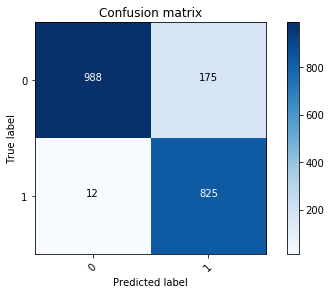

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.9835 

TESTING ACCURACY ON FOLD 1 = 0.9874587499999999 

CONFUSION MATRIX OF FOLD 1


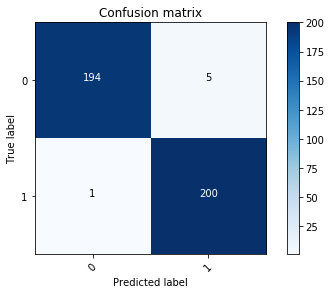

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.74 

TESTING ACCURACY ON FOLD 2 = 0.74685 

CONFUSION MATRIX OF FOLD 2


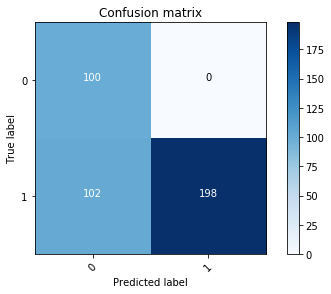

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.931 

TESTING ACCURACY ON FOLD 3 = 0.9473275 

CONFUSION MATRIX OF FOLD 3


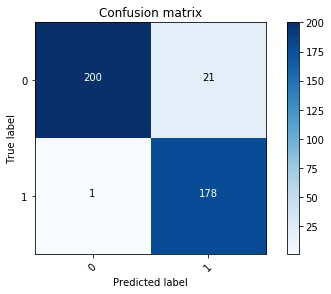

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.949 

TESTING ACCURACY ON FOLD 4 = 0.9423725000000001 

CONFUSION MATRIX OF FOLD 4


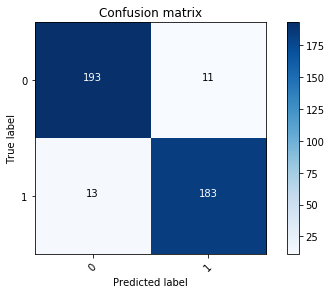

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.743 

TESTING ACCURACY ON FOLD 5 = 0.7418575 

CONFUSION MATRIX OF FOLD 5


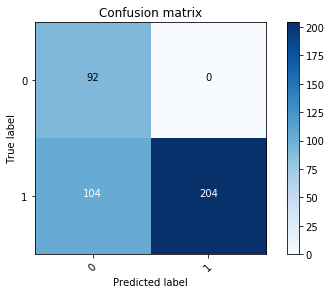


 Results:

Parameters:
------------ 

LEARNING RATE: 0.33
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 5 

LAMBDA: 0.01
Metrics:
---------- 

ACCURACY: 0.873
COST:  31.088767958888784
CONFUSION MATRIX: 



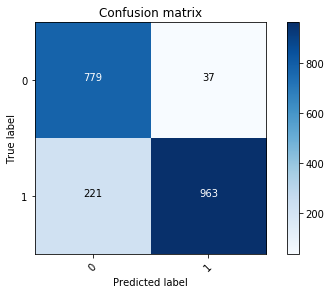

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.571 

TESTING ACCURACY ON FOLD 1 = 0.5489275 

CONFUSION MATRIX OF FOLD 1


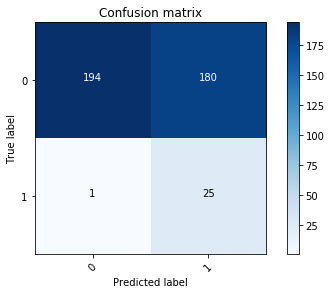

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.9795 

TESTING ACCURACY ON FOLD 2 = 0.9724487500000001 

CONFUSION MATRIX OF FOLD 2


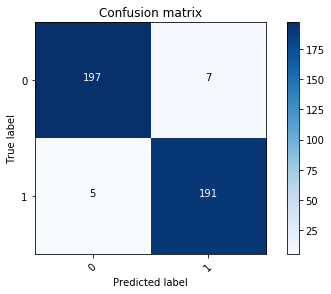

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.7435 

TESTING ACCURACY ON FOLD 3 = 0.72685875 

CONFUSION MATRIX OF FOLD 3


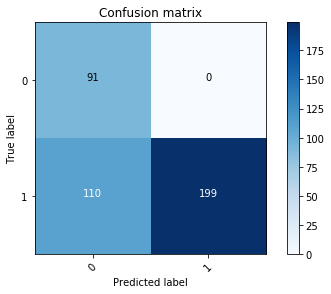

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.5 

TESTING ACCURACY ON FOLD 4 = 0.51625 

CONFUSION MATRIX OF FOLD 4


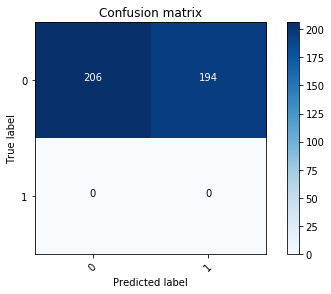

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.743 

TESTING ACCURACY ON FOLD 5 = 0.7443575 

CONFUSION MATRIX OF FOLD 5


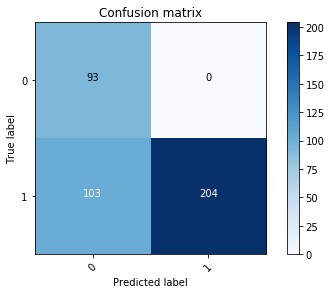


 Results:

Parameters:
------------ 

LEARNING RATE: 0.34
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 5 

LAMBDA: 0.01
Metrics:
---------- 

ACCURACY: 0.702
COST:  1.451160240137437
CONFUSION MATRIX: 



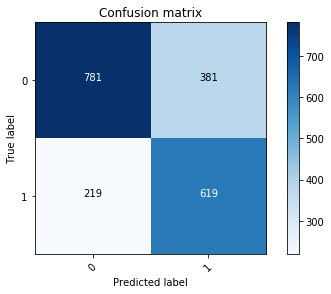

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.9765 

TESTING ACCURACY ON FOLD 1 = 0.97994125 

CONFUSION MATRIX OF FOLD 1


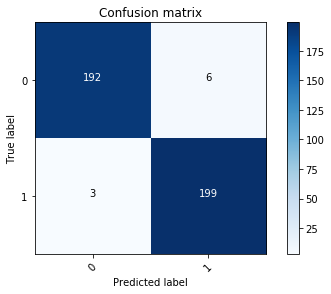

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.5 

TESTING ACCURACY ON FOLD 2 = 0.50625 

CONFUSION MATRIX OF FOLD 2


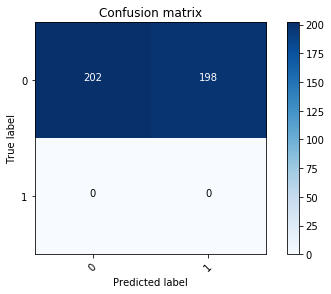

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.963 

TESTING ACCURACY ON FOLD 3 = 0.9624074999999999 

CONFUSION MATRIX OF FOLD 3


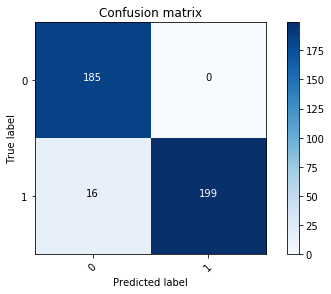

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.9535 

TESTING ACCURACY ON FOLD 4 = 0.9398837499999999 

CONFUSION MATRIX OF FOLD 4


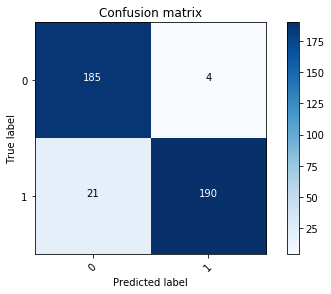

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.7425 

TESTING ACCURACY ON FOLD 5 = 0.74435625 

CONFUSION MATRIX OF FOLD 5


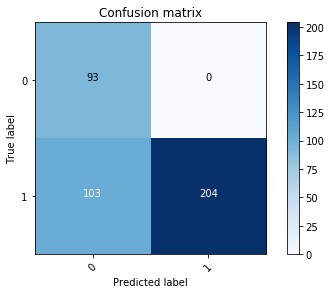


 Results:

Parameters:
------------ 

LEARNING RATE: 0.35
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 5 

LAMBDA: 0.01
Metrics:
---------- 

ACCURACY: 0.827
COST:  11.914794832289928
CONFUSION MATRIX: 



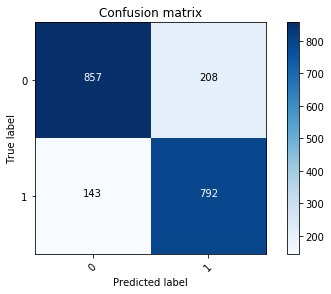

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.7405 

TESTING ACCURACY ON FOLD 1 = 0.7793512499999999 

CONFUSION MATRIX OF FOLD 1


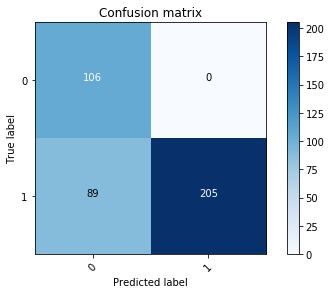

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.7435 

TESTING ACCURACY ON FOLD 2 = 0.73435875 

CONFUSION MATRIX OF FOLD 2


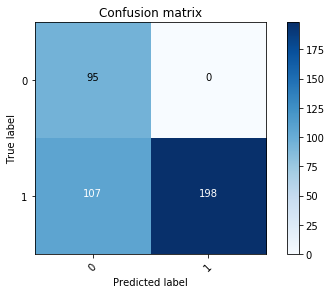

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.961 

TESTING ACCURACY ON FOLD 3 = 0.9699025 

CONFUSION MATRIX OF FOLD 3


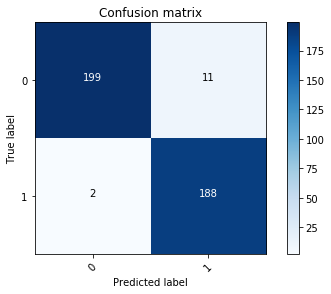

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.912 

TESTING ACCURACY ON FOLD 4 = 0.9072800000000001 

CONFUSION MATRIX OF FOLD 4


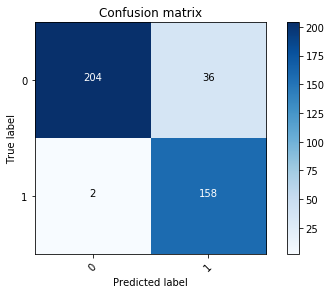

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.9795 

TESTING ACCURACY ON FOLD 5 = 0.97994875 

CONFUSION MATRIX OF FOLD 5


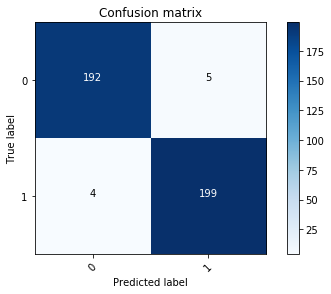


 Results:

Parameters:
------------ 

LEARNING RATE: 0.36
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 5 

LAMBDA: 0.01
Metrics:
---------- 

ACCURACY: 0.874
COST:  0.3908842212872184
CONFUSION MATRIX: 



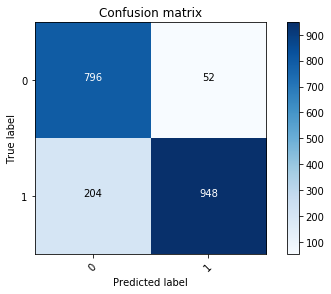

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.7435 

TESTING ACCURACY ON FOLD 1 = 0.77935875 

CONFUSION MATRIX OF FOLD 1


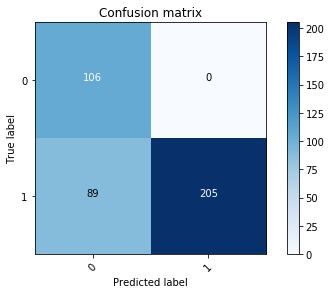

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.962 

TESTING ACCURACY ON FOLD 2 = 0.959905 

CONFUSION MATRIX OF FOLD 2


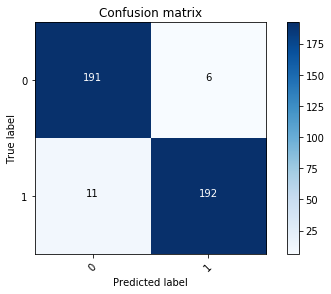

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.5 

TESTING ACCURACY ON FOLD 3 = 0.50375 

CONFUSION MATRIX OF FOLD 3


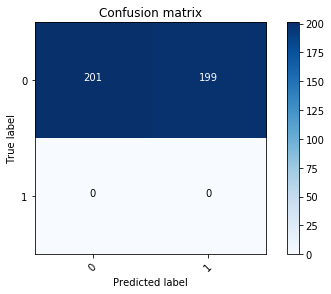

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.98 

TESTING ACCURACY ON FOLD 4 = 0.97745 

CONFUSION MATRIX OF FOLD 4


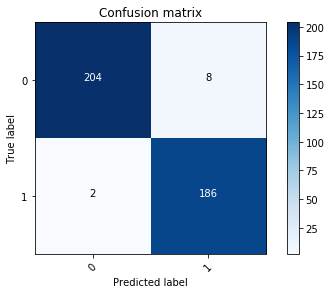

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.9565 

TESTING ACCURACY ON FOLD 5 = 0.94989125 

CONFUSION MATRIX OF FOLD 5


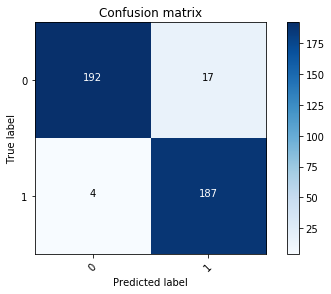


 Results:

Parameters:
------------ 

LEARNING RATE: 0.37
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 5 

LAMBDA: 0.01
Metrics:
---------- 

ACCURACY: 0.834
COST:  1.1833290439804691
CONFUSION MATRIX: 



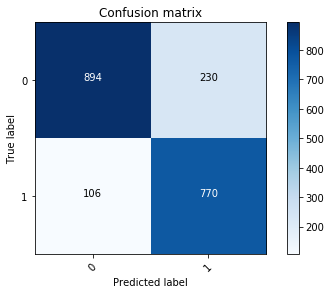

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.5 

TESTING ACCURACY ON FOLD 1 = 0.48875 

CONFUSION MATRIX OF FOLD 1


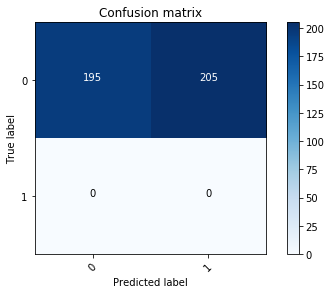

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.742 

TESTING ACCURACY ON FOLD 2 = 0.7293550000000001 

CONFUSION MATRIX OF FOLD 2


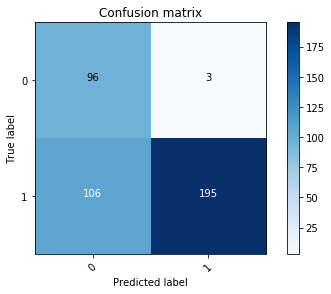

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.697 

TESTING ACCURACY ON FOLD 3 = 0.7292425 

CONFUSION MATRIX OF FOLD 3


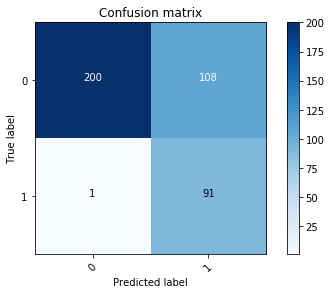

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.736 

TESTING ACCURACY ON FOLD 4 = 0.73434 

CONFUSION MATRIX OF FOLD 4


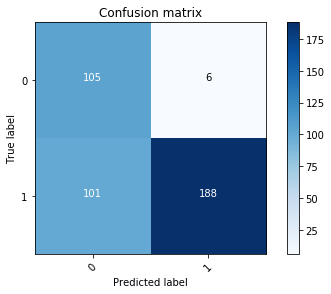

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.737 

TESTING ACCURACY ON FOLD 5 = 0.7318425 

CONFUSION MATRIX OF FOLD 5


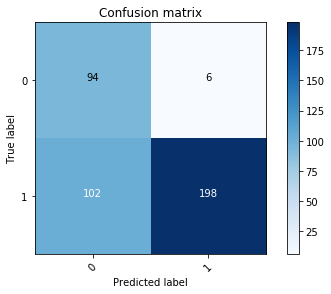


 Results:

Parameters:
------------ 

LEARNING RATE: 0.38
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 5 

LAMBDA: 0.01
Metrics:
---------- 

ACCURACY: 0.683
COST:  121.5225081088722
CONFUSION MATRIX: 



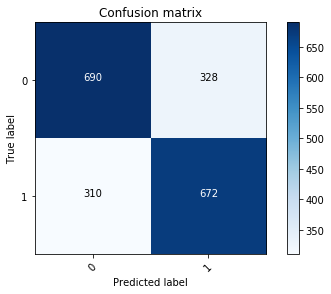

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.744 

TESTING ACCURACY ON FOLD 1 = 0.77936 

CONFUSION MATRIX OF FOLD 1


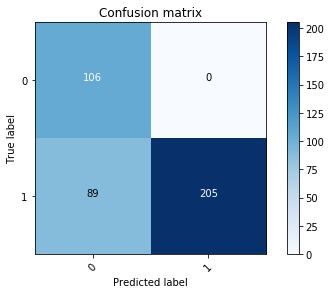

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.7435 

TESTING ACCURACY ON FOLD 2 = 0.73185875 

CONFUSION MATRIX OF FOLD 2


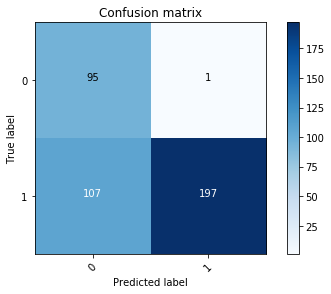

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.959 

TESTING ACCURACY ON FOLD 3 = 0.9623975 

CONFUSION MATRIX OF FOLD 3


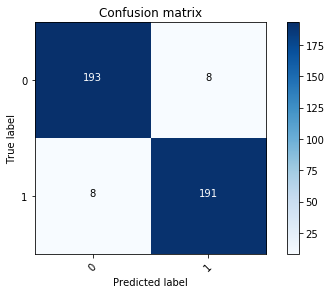

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.9615 

TESTING ACCURACY ON FOLD 4 = 0.95240375 

CONFUSION MATRIX OF FOLD 4


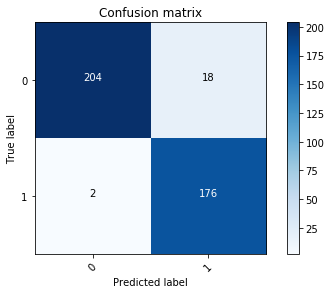

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.959 

TESTING ACCURACY ON FOLD 5 = 0.9548975 

CONFUSION MATRIX OF FOLD 5


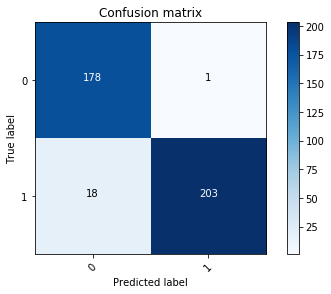


 Results:

Parameters:
------------ 

LEARNING RATE: 0.39
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 5 

LAMBDA: 0.01
Metrics:
---------- 

ACCURACY: 0.876
COST:  1.3067560927841064
CONFUSION MATRIX: 



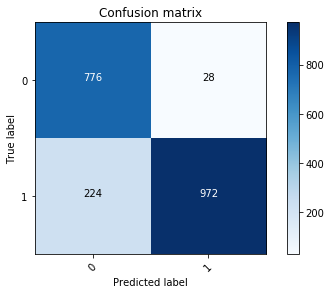

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.7325 

TESTING ACCURACY ON FOLD 1 = 0.7568312500000001 

CONFUSION MATRIX OF FOLD 1


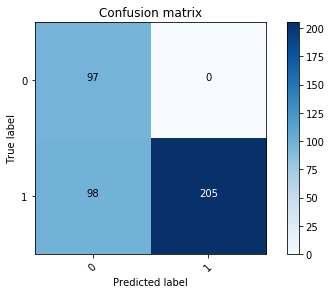

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.98 

TESTING ACCURACY ON FOLD 2 = 0.9749500000000001 

CONFUSION MATRIX OF FOLD 2


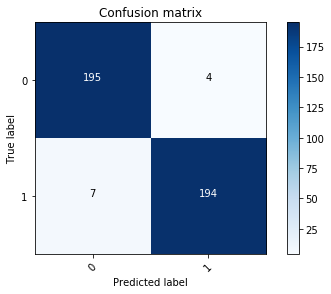

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.9765 

TESTING ACCURACY ON FOLD 3 = 0.9824412499999999 

CONFUSION MATRIX OF FOLD 3


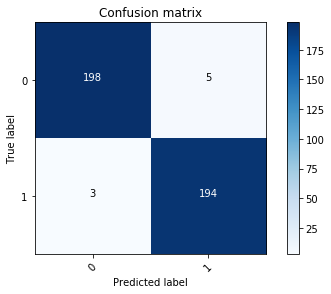

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.9725 

TESTING ACCURACY ON FOLD 4 = 0.9749312499999999 

CONFUSION MATRIX OF FOLD 4


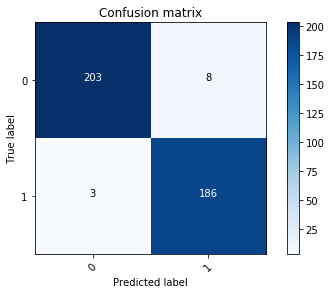

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.9525 

TESTING ACCURACY ON FOLD 5 = 0.94738125 

CONFUSION MATRIX OF FOLD 5


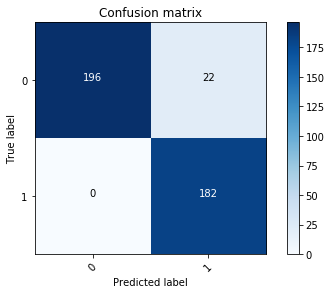


 Results:

Parameters:
------------ 

LEARNING RATE: 0.4
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 5 

LAMBDA: 0.01
Metrics:
---------- 

ACCURACY: 0.927
COST:  0.7964257870731771
CONFUSION MATRIX: 



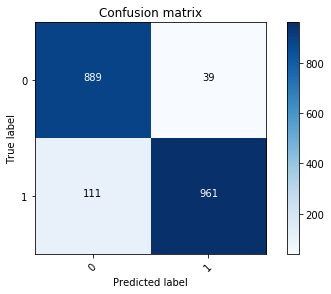

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.965 

TESTING ACCURACY ON FOLD 1 = 0.9849125000000001 

CONFUSION MATRIX OF FOLD 1


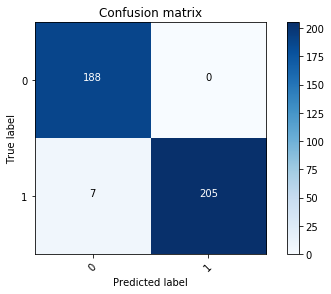

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.7255 

TESTING ACCURACY ON FOLD 2 = 0.71681375 

CONFUSION MATRIX OF FOLD 2


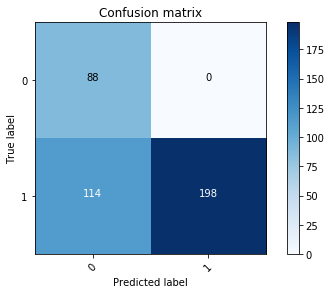

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.972 

TESTING ACCURACY ON FOLD 3 = 0.97993 

CONFUSION MATRIX OF FOLD 3


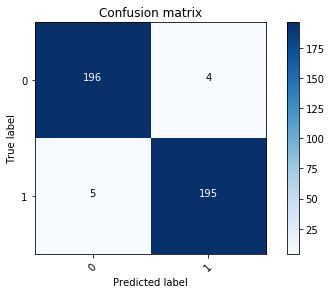

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.9555 

TESTING ACCURACY ON FOLD 4 = 0.9498887500000001 

CONFUSION MATRIX OF FOLD 4


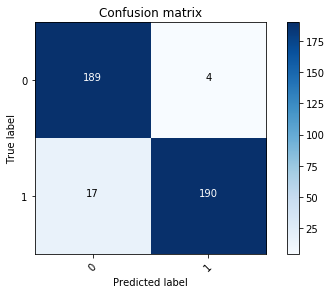

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.5 

TESTING ACCURACY ON FOLD 5 = 0.49125 

CONFUSION MATRIX OF FOLD 5


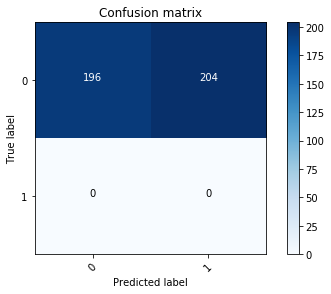


 Results:

Parameters:
------------ 

LEARNING RATE: 0.41
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 5 

LAMBDA: 0.01
Metrics:
---------- 

ACCURACY: 0.825
COST:  0.0
CONFUSION MATRIX: 



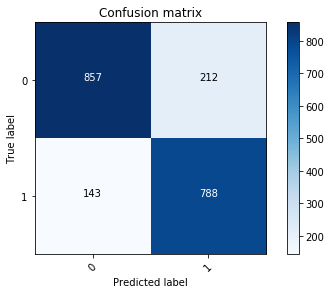

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.979 

TESTING ACCURACY ON FOLD 1 = 0.9799475 

CONFUSION MATRIX OF FOLD 1


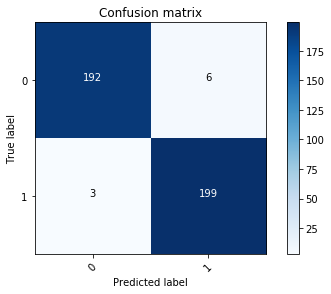

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.5 

TESTING ACCURACY ON FOLD 2 = 0.50625 

CONFUSION MATRIX OF FOLD 2


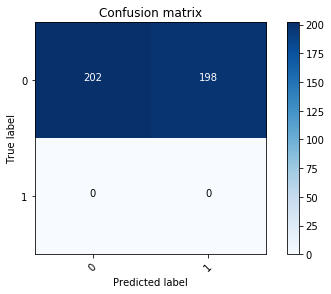

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.9795 

TESTING ACCURACY ON FOLD 3 = 0.9874487500000001 

CONFUSION MATRIX OF FOLD 3


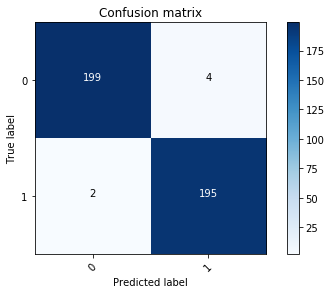

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.5 

TESTING ACCURACY ON FOLD 4 = 0.51625 

CONFUSION MATRIX OF FOLD 4


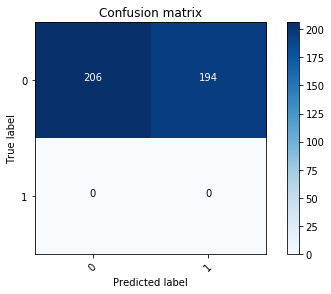

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.7165 

TESTING ACCURACY ON FOLD 5 = 0.67929125 

CONFUSION MATRIX OF FOLD 5


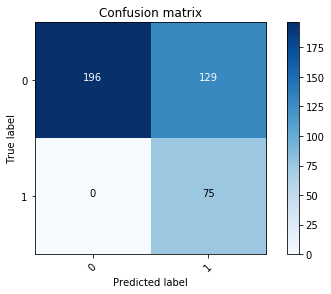


 Results:

Parameters:
------------ 

LEARNING RATE: 0.42
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 5 

LAMBDA: 0.01
Metrics:
---------- 

ACCURACY: 0.734
COST:  3.5135057243571532
CONFUSION MATRIX: 



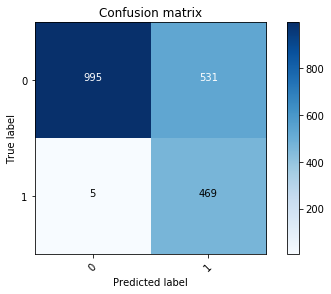

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.5 

TESTING ACCURACY ON FOLD 1 = 0.48875 

CONFUSION MATRIX OF FOLD 1


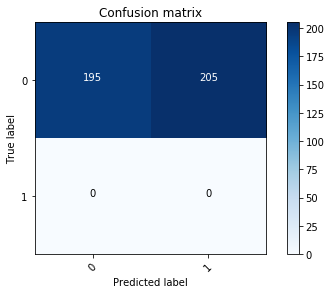

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.9745 

TESTING ACCURACY ON FOLD 2 = 0.9774362500000001 

CONFUSION MATRIX OF FOLD 2


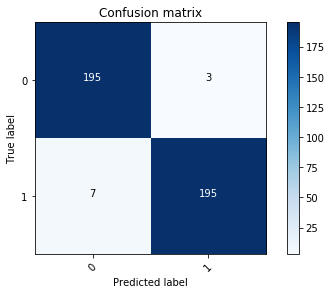

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.7445 

TESTING ACCURACY ON FOLD 3 = 0.7243612500000001 

CONFUSION MATRIX OF FOLD 3


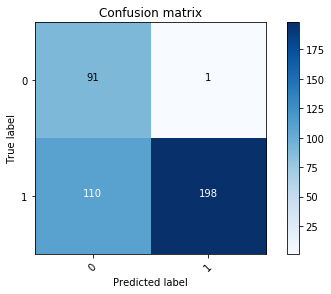

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.739 

TESTING ACCURACY ON FOLD 4 = 0.7343475 

CONFUSION MATRIX OF FOLD 4


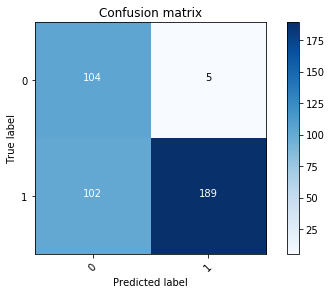

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.982 

TESTING ACCURACY ON FOLD 5 = 0.982455 

CONFUSION MATRIX OF FOLD 5


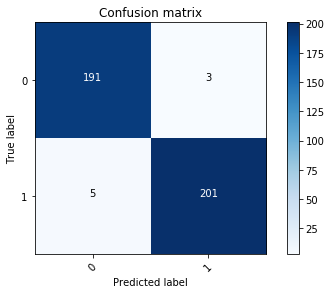


 Results:

Parameters:
------------ 

LEARNING RATE: 0.43
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 5 

LAMBDA: 0.01
Metrics:
---------- 

ACCURACY: 0.781
COST:  1.8890783069392796
CONFUSION MATRIX: 



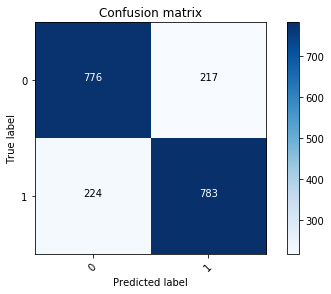

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.8865 

TESTING ACCURACY ON FOLD 1 = 0.9072162500000001 

CONFUSION MATRIX OF FOLD 1


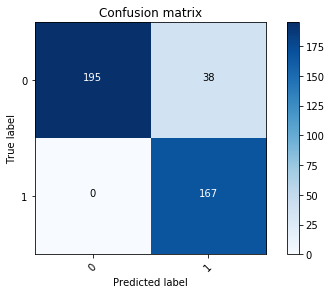

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.744 

TESTING ACCURACY ON FOLD 2 = 0.7343600000000001 

CONFUSION MATRIX OF FOLD 2


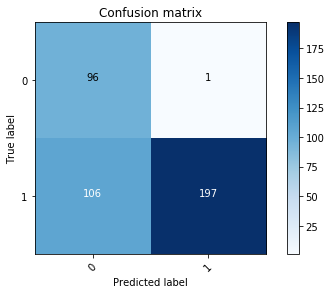

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.983 

TESTING ACCURACY ON FOLD 3 = 0.9924575 

CONFUSION MATRIX OF FOLD 3


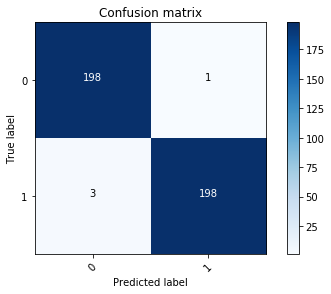

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.97 

TESTING ACCURACY ON FOLD 4 = 0.9624250000000001 

CONFUSION MATRIX OF FOLD 4


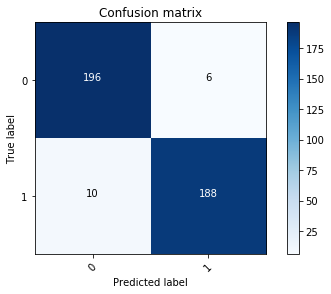

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.9615 

TESTING ACCURACY ON FOLD 5 = 0.95490375 

CONFUSION MATRIX OF FOLD 5


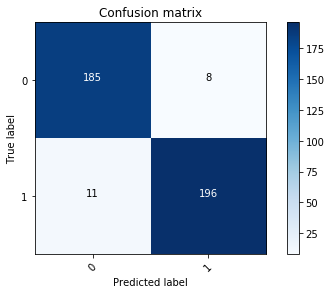


 Results:

Parameters:
------------ 

LEARNING RATE: 0.44
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 5 

LAMBDA: 0.01
Metrics:
---------- 

ACCURACY: 0.91
COST:  15.892747960451045
CONFUSION MATRIX: 



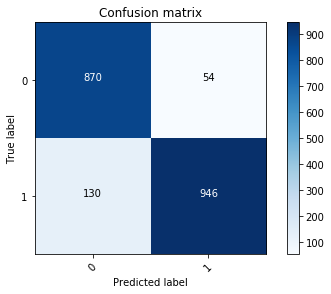

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.549 

TESTING ACCURACY ON FOLD 1 = 0.5388725 

CONFUSION MATRIX OF FOLD 1


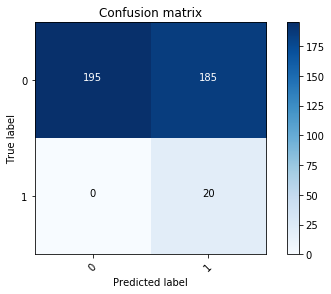

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.7385 

TESTING ACCURACY ON FOLD 2 = 0.7318462499999999 

CONFUSION MATRIX OF FOLD 2


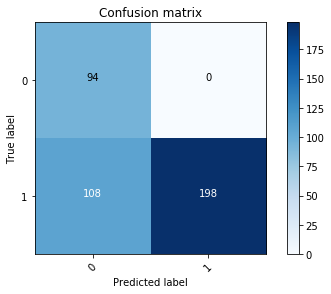

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.909 

TESTING ACCURACY ON FOLD 3 = 0.9147725 

CONFUSION MATRIX OF FOLD 3


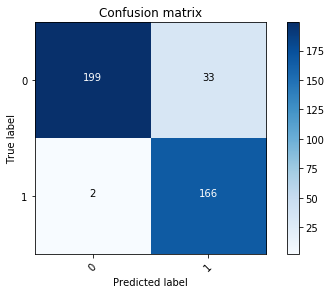

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.967 

TESTING ACCURACY ON FOLD 4 = 0.9599175 

CONFUSION MATRIX OF FOLD 4


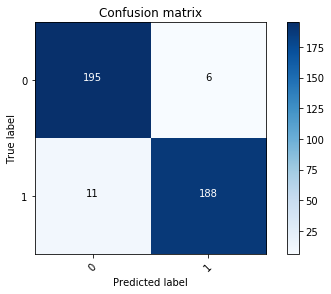

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.9695 

TESTING ACCURACY ON FOLD 5 = 0.9724237499999999 

CONFUSION MATRIX OF FOLD 5


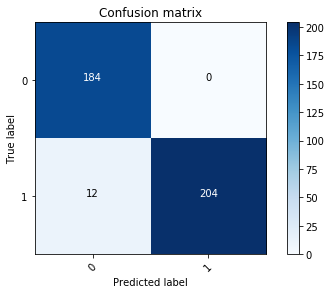


 Results:

Parameters:
------------ 

LEARNING RATE: 0.45
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 5 

LAMBDA: 0.01
Metrics:
---------- 

ACCURACY: 0.824
COST:  2.113211781157541
CONFUSION MATRIX: 



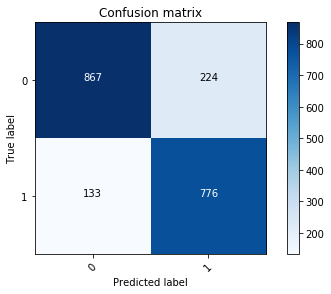

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.983 

TESTING ACCURACY ON FOLD 1 = 0.9899575 

CONFUSION MATRIX OF FOLD 1


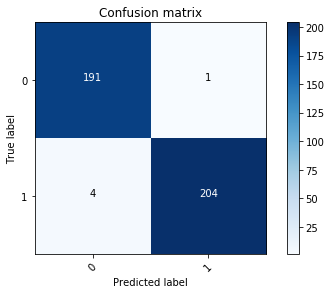

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.7415 

TESTING ACCURACY ON FOLD 2 = 0.72685375 

CONFUSION MATRIX OF FOLD 2


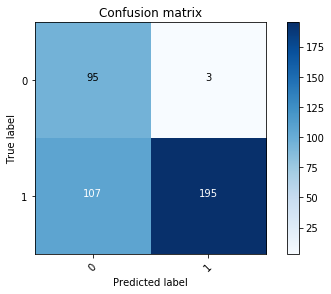

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.5 

TESTING ACCURACY ON FOLD 3 = 0.50375 

CONFUSION MATRIX OF FOLD 3


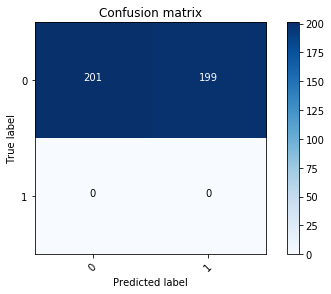

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.7445 

TESTING ACCURACY ON FOLD 4 = 0.7393612500000001 

CONFUSION MATRIX OF FOLD 4


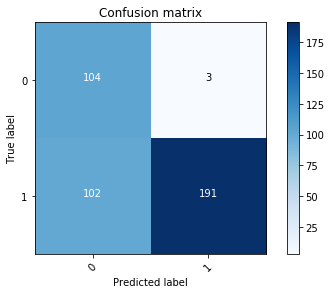

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.744 

TESTING ACCURACY ON FOLD 5 = 0.7468600000000001 

CONFUSION MATRIX OF FOLD 5


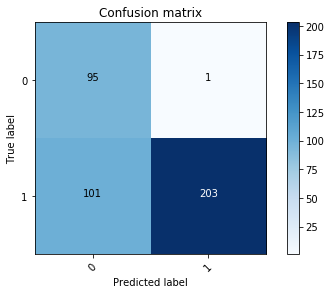


 Results:

Parameters:
------------ 

LEARNING RATE: 0.46
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 5 

LAMBDA: 0.01
Metrics:
---------- 

ACCURACY: 0.741
COST:  64.06775923788337
CONFUSION MATRIX: 



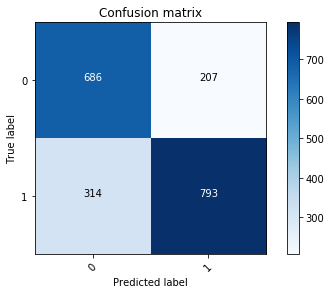

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.981 

TESTING ACCURACY ON FOLD 1 = 0.9924525 

CONFUSION MATRIX OF FOLD 1


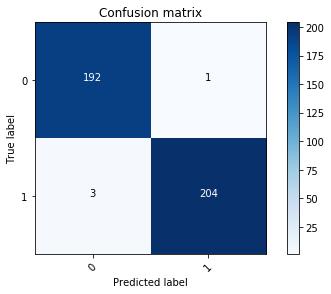

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.7435 

TESTING ACCURACY ON FOLD 2 = 0.73435875 

CONFUSION MATRIX OF FOLD 2


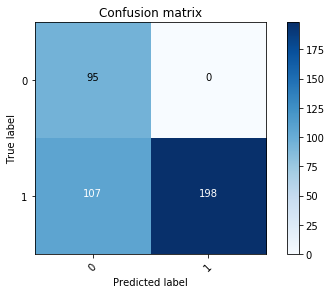

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.741 

TESTING ACCURACY ON FOLD 3 = 0.7193525 

CONFUSION MATRIX OF FOLD 3


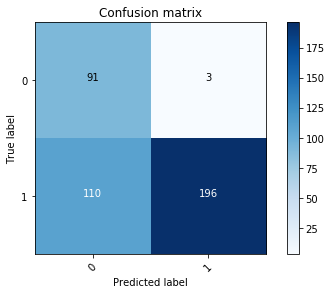

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.5 

TESTING ACCURACY ON FOLD 4 = 0.51625 

CONFUSION MATRIX OF FOLD 4


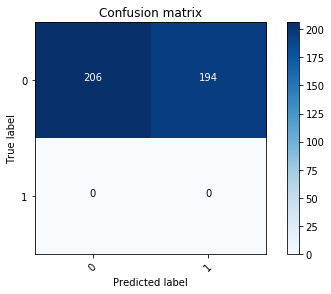

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.977 

TESTING ACCURACY ON FOLD 5 = 0.9799424999999999 

CONFUSION MATRIX OF FOLD 5


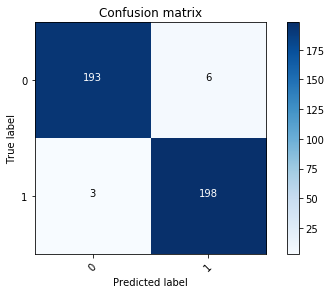


 Results:

Parameters:
------------ 

LEARNING RATE: 0.47
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 5 

LAMBDA: 0.01
Metrics:
---------- 

ACCURACY: 0.788
COST:  4.235931718008509
CONFUSION MATRIX: 



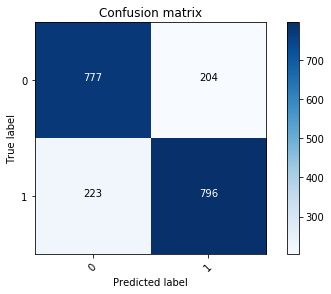

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.9605 

TESTING ACCURACY ON FOLD 1 = 0.9849012500000001 

CONFUSION MATRIX OF FOLD 1


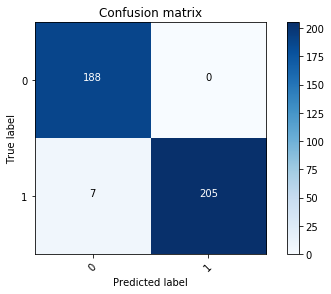

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.9745 

TESTING ACCURACY ON FOLD 2 = 0.9749362500000001 

CONFUSION MATRIX OF FOLD 2


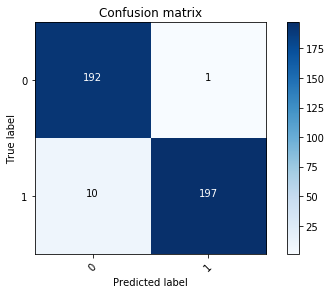

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.7135 

TESTING ACCURACY ON FOLD 3 = 0.69678375 

CONFUSION MATRIX OF FOLD 3


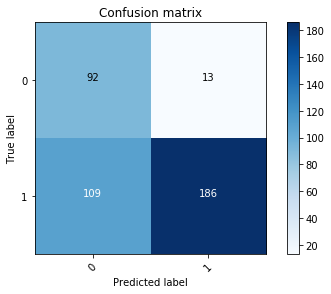

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.897 

TESTING ACCURACY ON FOLD 4 = 0.8872424999999999 

CONFUSION MATRIX OF FOLD 4


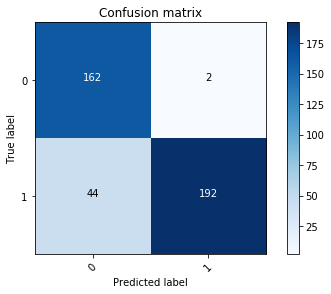

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.5 

TESTING ACCURACY ON FOLD 5 = 0.51125 

CONFUSION MATRIX OF FOLD 5


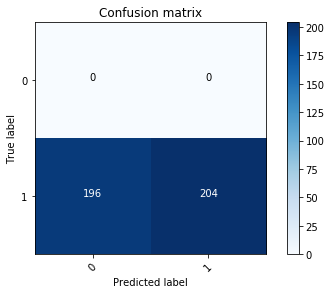


 Results:

Parameters:
------------ 

LEARNING RATE: 0.48
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 5 

LAMBDA: 0.01
Metrics:
---------- 

ACCURACY: 0.811
COST:  105.61948988641602
CONFUSION MATRIX: 



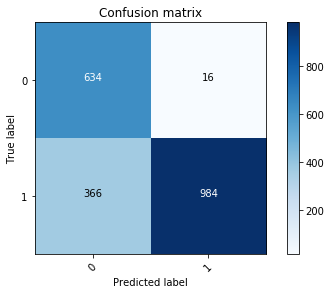

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.981 

TESTING ACCURACY ON FOLD 1 = 0.9849525 

CONFUSION MATRIX OF FOLD 1


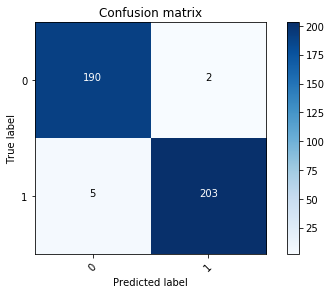

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.8715 

TESTING ACCURACY ON FOLD 2 = 0.8771787499999999 

CONFUSION MATRIX OF FOLD 2


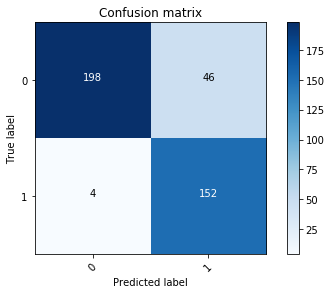

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.5 

TESTING ACCURACY ON FOLD 3 = 0.50375 

CONFUSION MATRIX OF FOLD 3


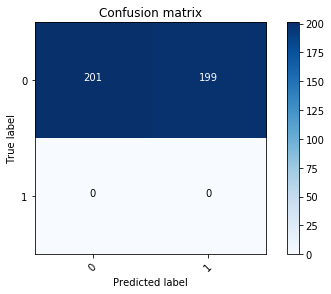

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.735 

TESTING ACCURACY ON FOLD 4 = 0.7343375000000001 

CONFUSION MATRIX OF FOLD 4


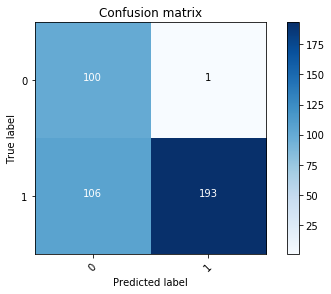

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.973 

TESTING ACCURACY ON FOLD 5 = 0.9774325 

CONFUSION MATRIX OF FOLD 5


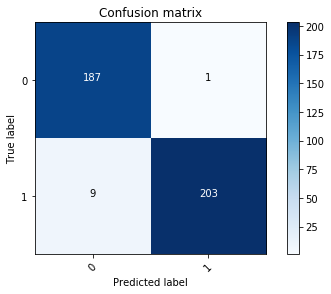


 Results:

Parameters:
------------ 

LEARNING RATE: 0.49
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 5 

LAMBDA: 0.01
Metrics:
---------- 

ACCURACY: 0.816
COST:  2.159495635144118
CONFUSION MATRIX: 



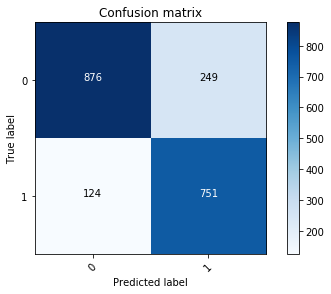

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.5 

TESTING ACCURACY ON FOLD 1 = 0.48875 

CONFUSION MATRIX OF FOLD 1


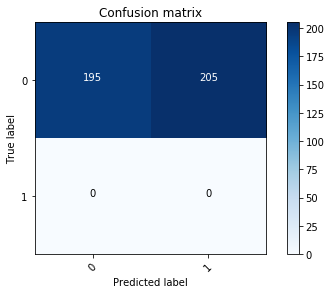

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.9485 

TESTING ACCURACY ON FOLD 2 = 0.9398712499999999 

CONFUSION MATRIX OF FOLD 2


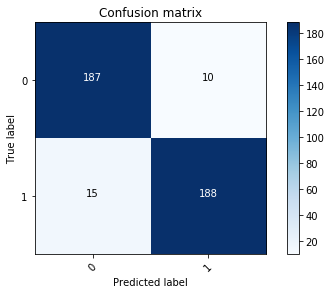

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.9775 

TESTING ACCURACY ON FOLD 3 = 0.9849437499999999 

CONFUSION MATRIX OF FOLD 3


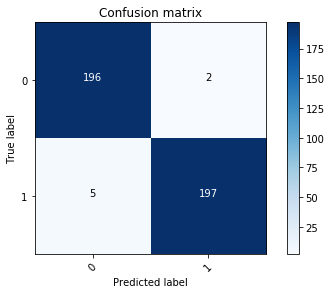

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.891 

TESTING ACCURACY ON FOLD 4 = 0.9022275 

CONFUSION MATRIX OF FOLD 4


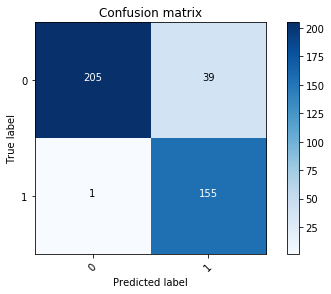

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.5785 

TESTING ACCURACY ON FOLD 5 = 0.59144625 

CONFUSION MATRIX OF FOLD 5


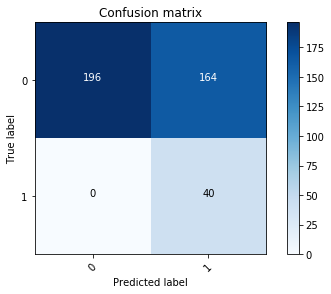


 Results:

Parameters:
------------ 

LEARNING RATE: 0.5
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 5 

LAMBDA: 0.01
Metrics:
---------- 

ACCURACY: 0.781
COST:  43.344228208473474
CONFUSION MATRIX: 



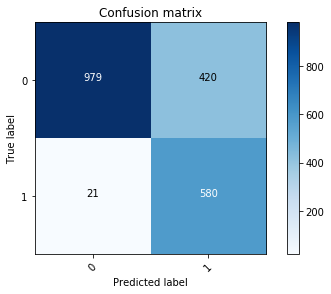

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.5 

TESTING ACCURACY ON FOLD 1 = 0.48875 

CONFUSION MATRIX OF FOLD 1


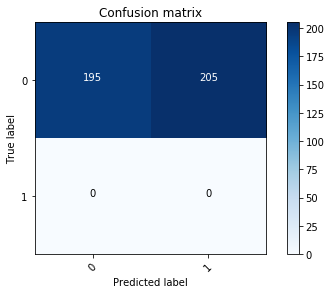

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.742 

TESTING ACCURACY ON FOLD 2 = 0.726855 

CONFUSION MATRIX OF FOLD 2


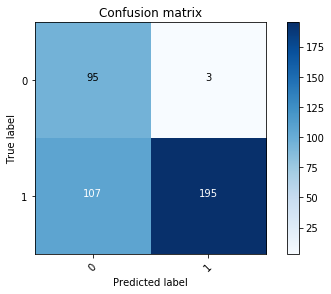

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.7575 

TESTING ACCURACY ON FOLD 3 = 0.74189375 

CONFUSION MATRIX OF FOLD 3


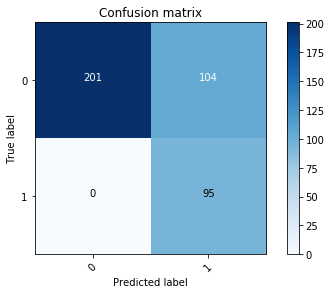

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.6905 

TESTING ACCURACY ON FOLD 4 = 0.70672625 

CONFUSION MATRIX OF FOLD 4


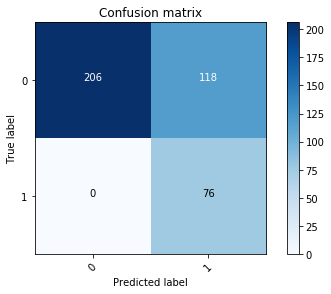

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.7435 

TESTING ACCURACY ON FOLD 5 = 0.74935875 

CONFUSION MATRIX OF FOLD 5


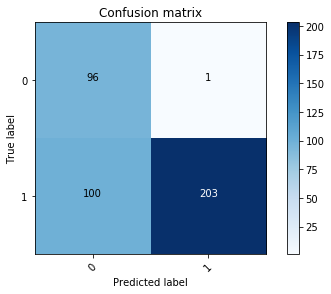


 Results:

Parameters:
------------ 

LEARNING RATE: 0.51
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 5 

LAMBDA: 0.01
Metrics:
---------- 

ACCURACY: 0.683
COST:  8.3245599210379
CONFUSION MATRIX: 



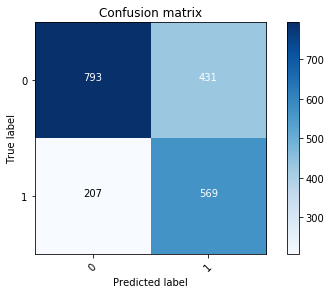

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.9785 

TESTING ACCURACY ON FOLD 1 = 0.98494625 

CONFUSION MATRIX OF FOLD 1


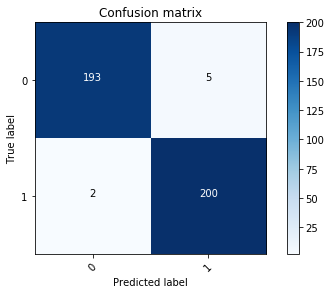

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.7435 

TESTING ACCURACY ON FOLD 2 = 0.73435875 

CONFUSION MATRIX OF FOLD 2


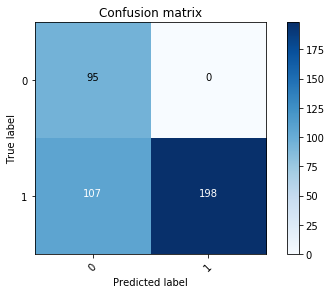

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.979 

TESTING ACCURACY ON FOLD 3 = 0.9824474999999999 

CONFUSION MATRIX OF FOLD 3


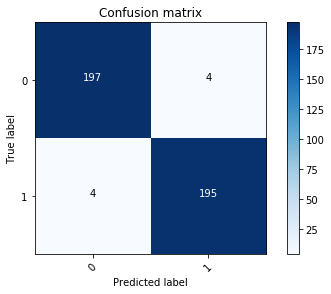

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.7435 

TESTING ACCURACY ON FOLD 4 = 0.74435875 

CONFUSION MATRIX OF FOLD 4


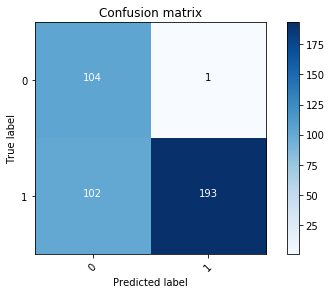

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.972 

TESTING ACCURACY ON FOLD 5 = 0.97993 

CONFUSION MATRIX OF FOLD 5


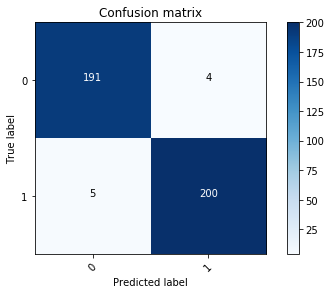


 Results:

Parameters:
------------ 

LEARNING RATE: 0.52
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 5 

LAMBDA: 0.01
Metrics:
---------- 

ACCURACY: 0.885
COST:  nan
CONFUSION MATRIX: 



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:55: RuntimeWarning: divide by zero encountered in log
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in multiply


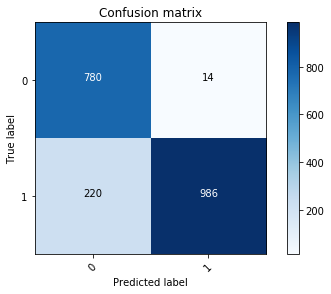

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.9785 

TESTING ACCURACY ON FOLD 1 = 0.98994625 

CONFUSION MATRIX OF FOLD 1


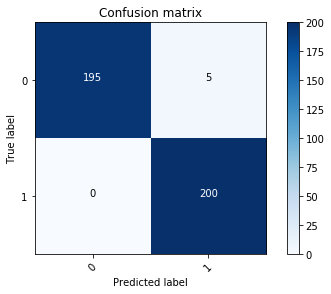

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.7415 

TESTING ACCURACY ON FOLD 2 = 0.72685375 

CONFUSION MATRIX OF FOLD 2


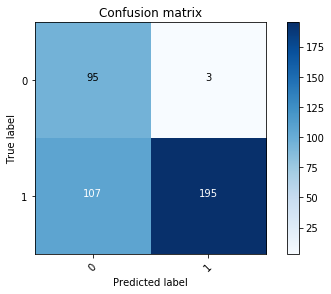

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.735 

TESTING ACCURACY ON FOLD 3 = 0.7193375000000001 

CONFUSION MATRIX OF FOLD 3


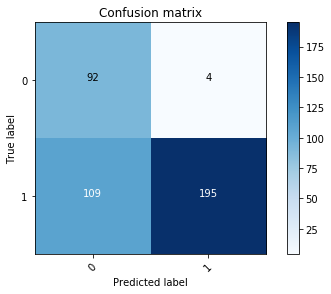

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.5 

TESTING ACCURACY ON FOLD 4 = 0.51625 

CONFUSION MATRIX OF FOLD 4


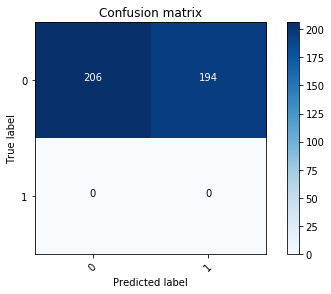

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.5 

TESTING ACCURACY ON FOLD 5 = 0.49125 

CONFUSION MATRIX OF FOLD 5


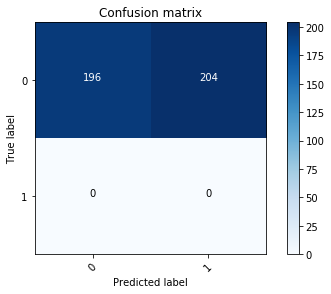


 Results:

Parameters:
------------ 

LEARNING RATE: 0.53
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 5 

LAMBDA: 0.01
Metrics:
---------- 

ACCURACY: 0.689
COST:  nan
CONFUSION MATRIX: 



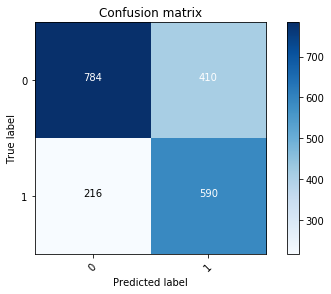

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.738 

TESTING ACCURACY ON FOLD 1 = 0.781845 

CONFUSION MATRIX OF FOLD 1


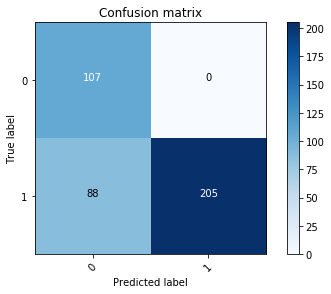

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.975 

TESTING ACCURACY ON FOLD 2 = 0.9724375000000001 

CONFUSION MATRIX OF FOLD 2


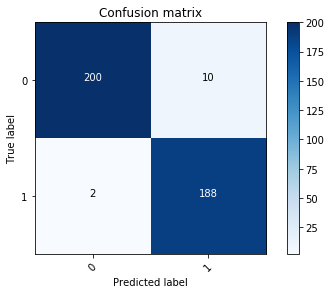

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.937 

TESTING ACCURACY ON FOLD 3 = 0.9448425 

CONFUSION MATRIX OF FOLD 3


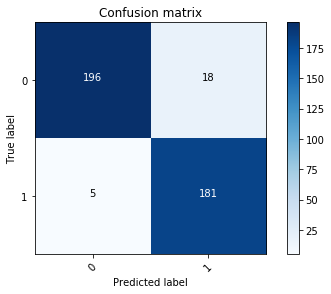

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.95 

TESTING ACCURACY ON FOLD 4 = 0.944875 

CONFUSION MATRIX OF FOLD 4


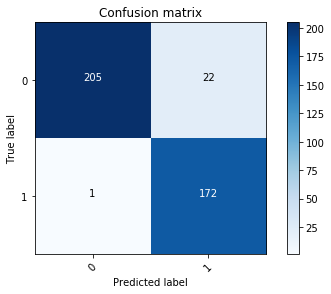

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.744 

TESTING ACCURACY ON FOLD 5 = 0.74436 

CONFUSION MATRIX OF FOLD 5


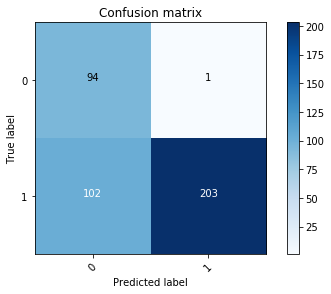


 Results:

Parameters:
------------ 

LEARNING RATE: 0.54
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 5 

LAMBDA: 0.01
Metrics:
---------- 

ACCURACY: 0.878
COST:  74.92331150425026
CONFUSION MATRIX: 



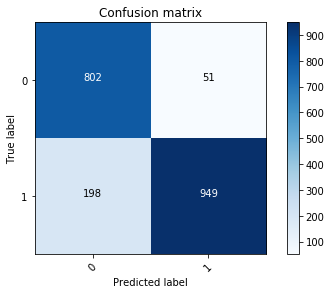

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.744 

TESTING ACCURACY ON FOLD 1 = 0.77936 

CONFUSION MATRIX OF FOLD 1


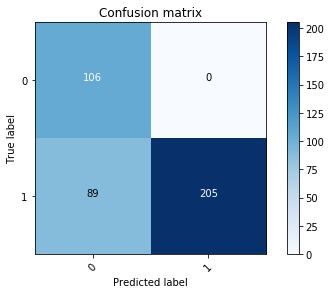

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.5 

TESTING ACCURACY ON FOLD 2 = 0.49625 

CONFUSION MATRIX OF FOLD 2


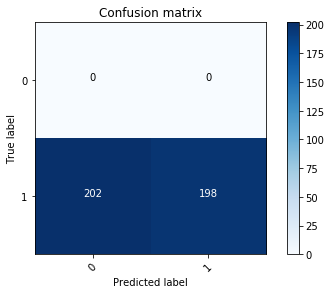

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.7435 

TESTING ACCURACY ON FOLD 3 = 0.72685875 

CONFUSION MATRIX OF FOLD 3


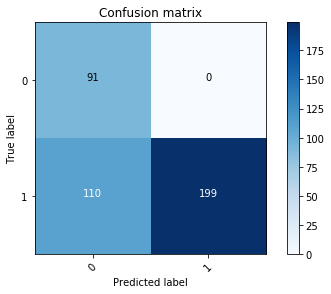

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.9385 

TESTING ACCURACY ON FOLD 4 = 0.91984625 

CONFUSION MATRIX OF FOLD 4


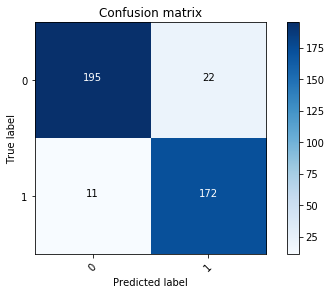

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.742 

TESTING ACCURACY ON FOLD 5 = 0.7443550000000001 

CONFUSION MATRIX OF FOLD 5


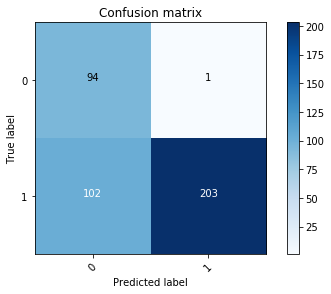


 Results:

Parameters:
------------ 

LEARNING RATE: 0.55
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 5 

LAMBDA: 0.01
Metrics:
---------- 

ACCURACY: 0.733
COST:  70.94071803404563
CONFUSION MATRIX: 



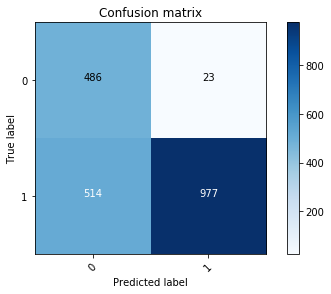

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.9495 

TESTING ACCURACY ON FOLD 1 = 0.94987375 

CONFUSION MATRIX OF FOLD 1


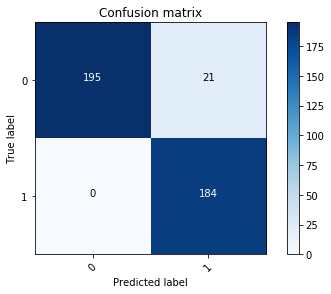

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.5 

TESTING ACCURACY ON FOLD 2 = 0.50625 

CONFUSION MATRIX OF FOLD 2


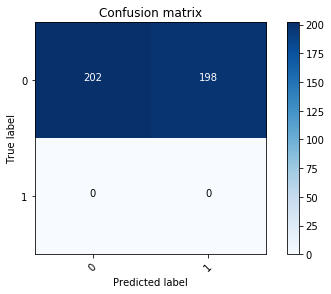

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.744 

TESTING ACCURACY ON FOLD 3 = 0.7268600000000001 

CONFUSION MATRIX OF FOLD 3


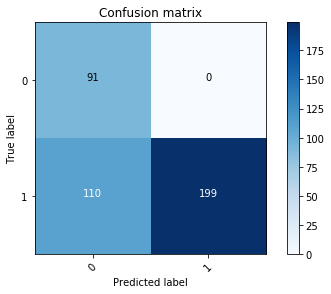

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.923 

TESTING ACCURACY ON FOLD 4 = 0.9348075 

CONFUSION MATRIX OF FOLD 4


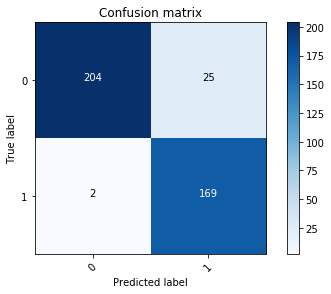

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.7185 

TESTING ACCURACY ON FOLD 5 = 0.72429625 

CONFUSION MATRIX OF FOLD 5


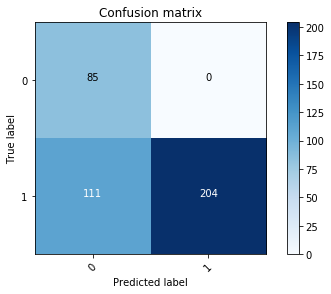


 Results:

Parameters:
------------ 

LEARNING RATE: 0.56
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 5 

LAMBDA: 0.01
Metrics:
---------- 

ACCURACY: 0.768
COST:  74.1649982581337
CONFUSION MATRIX: 



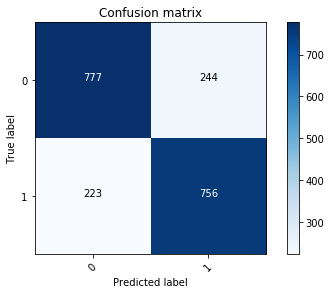

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.959 

TESTING ACCURACY ON FOLD 1 = 0.9523975 

CONFUSION MATRIX OF FOLD 1


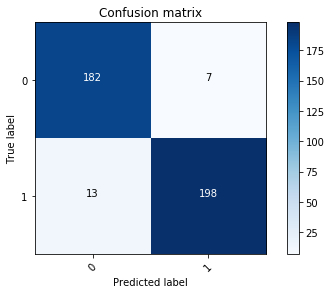

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.738 

TESTING ACCURACY ON FOLD 2 = 0.729345 

CONFUSION MATRIX OF FOLD 2


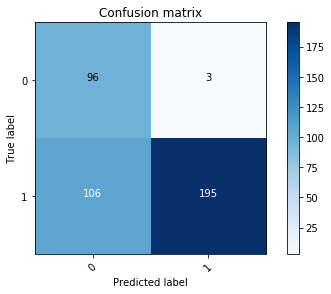

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.9625 

TESTING ACCURACY ON FOLD 3 = 0.9774062499999999 

CONFUSION MATRIX OF FOLD 3


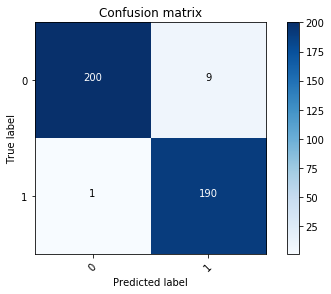

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.7405 

TESTING ACCURACY ON FOLD 4 = 0.74435125 

CONFUSION MATRIX OF FOLD 4


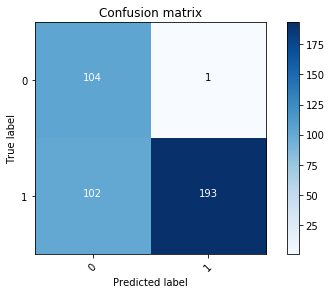

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.734 

TESTING ACCURACY ON FOLD 5 = 0.7368350000000001 

CONFUSION MATRIX OF FOLD 5


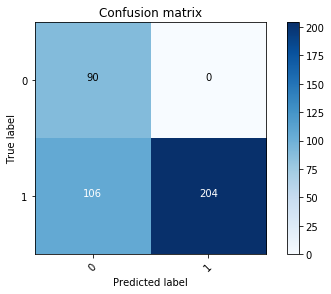


 Results:

Parameters:
------------ 

LEARNING RATE: 0.57
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 5 

LAMBDA: 0.01
Metrics:
---------- 

ACCURACY: 0.828
COST:  179.36015181000616
CONFUSION MATRIX: 



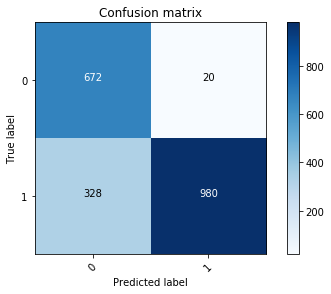

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.9595 

TESTING ACCURACY ON FOLD 1 = 0.96989875 

CONFUSION MATRIX OF FOLD 1


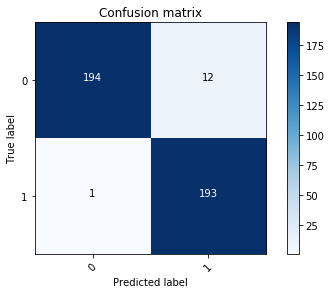

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.733 

TESTING ACCURACY ON FOLD 2 = 0.7393325000000001 

CONFUSION MATRIX OF FOLD 2


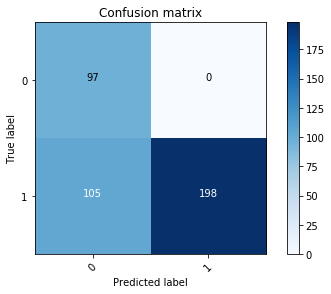

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.5 

TESTING ACCURACY ON FOLD 3 = 0.50375 

CONFUSION MATRIX OF FOLD 3


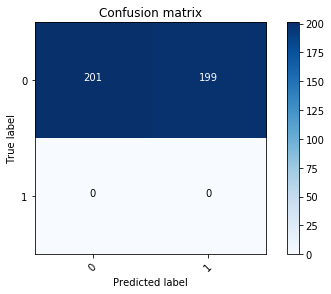

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.5 

TESTING ACCURACY ON FOLD 4 = 0.51625 

CONFUSION MATRIX OF FOLD 4


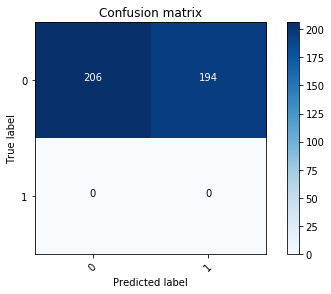

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.741 

TESTING ACCURACY ON FOLD 5 = 0.7418524999999999 

CONFUSION MATRIX OF FOLD 5


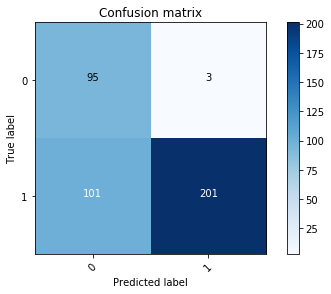


 Results:

Parameters:
------------ 

LEARNING RATE: 0.58
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 5 

LAMBDA: 0.01
Metrics:
---------- 

ACCURACY: 0.694
COST:  nan
CONFUSION MATRIX: 



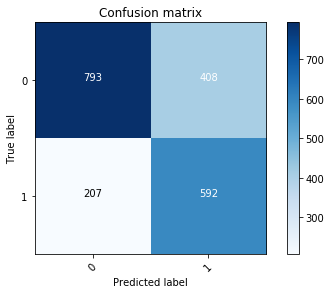

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.9405 

TESTING ACCURACY ON FOLD 1 = 0.9348512499999999 

CONFUSION MATRIX OF FOLD 1


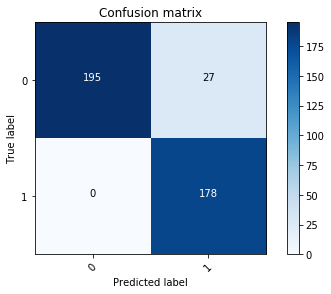

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.7145 

TESTING ACCURACY ON FOLD 2 = 0.71428625 

CONFUSION MATRIX OF FOLD 2


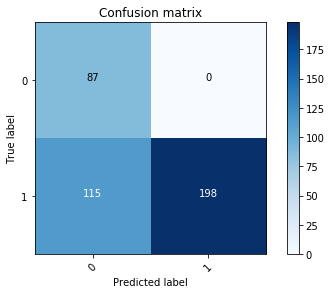

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.5 

TESTING ACCURACY ON FOLD 3 = 0.50375 

CONFUSION MATRIX OF FOLD 3


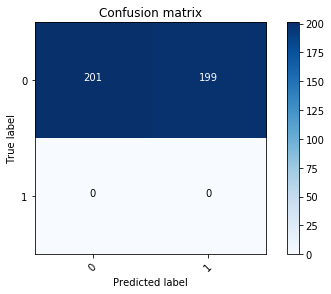

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.9625 

TESTING ACCURACY ON FOLD 4 = 0.95990625 

CONFUSION MATRIX OF FOLD 4


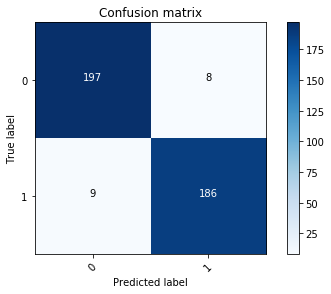

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.868 

TESTING ACCURACY ON FOLD 5 = 0.82467 

CONFUSION MATRIX OF FOLD 5


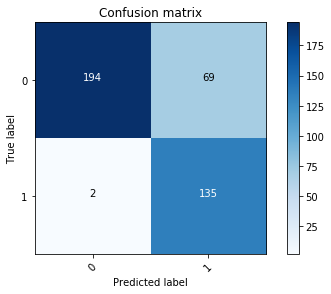


 Results:

Parameters:
------------ 

LEARNING RATE: 0.59
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 5 

LAMBDA: 0.01
Metrics:
---------- 

ACCURACY: 0.787
COST:  nan
CONFUSION MATRIX: 



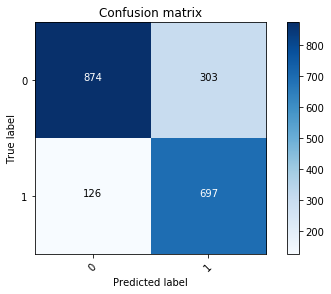

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.5 

TESTING ACCURACY ON FOLD 1 = 0.48875 

CONFUSION MATRIX OF FOLD 1


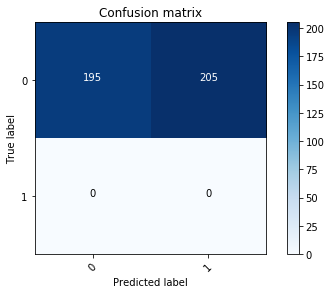

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.5 

TESTING ACCURACY ON FOLD 2 = 0.50625 

CONFUSION MATRIX OF FOLD 2


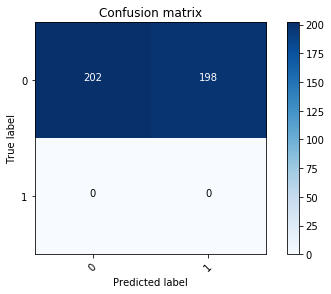

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.735 

TESTING ACCURACY ON FOLD 3 = 0.7543375 

CONFUSION MATRIX OF FOLD 3


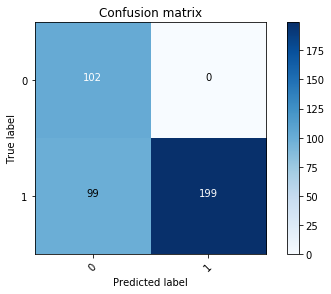

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.8275 

TESTING ACCURACY ON FOLD 4 = 0.81956875 

CONFUSION MATRIX OF FOLD 4


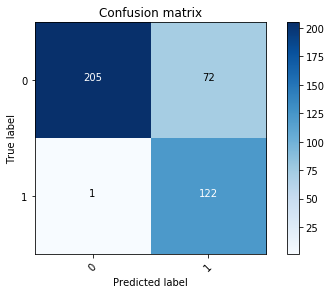

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.9555 

TESTING ACCURACY ON FOLD 5 = 0.9623887500000001 

CONFUSION MATRIX OF FOLD 5


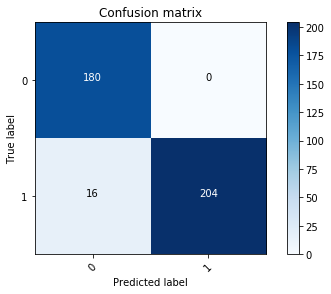


 Results:

Parameters:
------------ 

LEARNING RATE: 0.6
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 5 

LAMBDA: 0.01
Metrics:
---------- 

ACCURACY: 0.706
COST:  2.6608944598866957
CONFUSION MATRIX: 



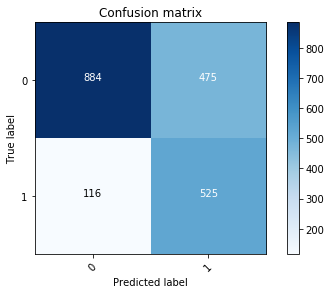

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.969 

TESTING ACCURACY ON FOLD 1 = 0.9824225 

CONFUSION MATRIX OF FOLD 1


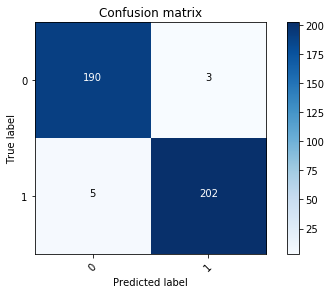

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.7435 

TESTING ACCURACY ON FOLD 2 = 0.73435875 

CONFUSION MATRIX OF FOLD 2


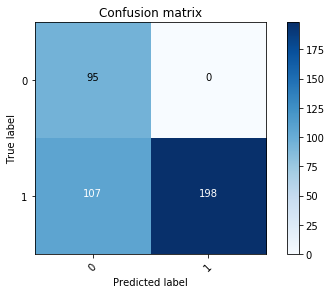

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.737 

TESTING ACCURACY ON FOLD 3 = 0.7168424999999999 

CONFUSION MATRIX OF FOLD 3


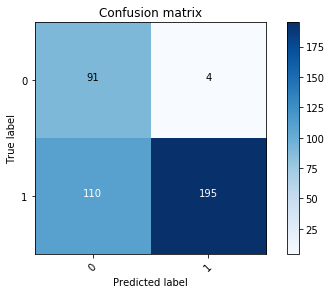

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.6435 

TESTING ACCURACY ON FOLD 4 = 0.6616087500000001 

CONFUSION MATRIX OF FOLD 4


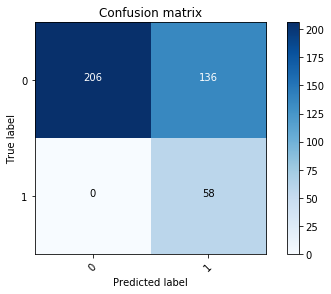

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.717 

TESTING ACCURACY ON FOLD 5 = 0.7267925 

CONFUSION MATRIX OF FOLD 5


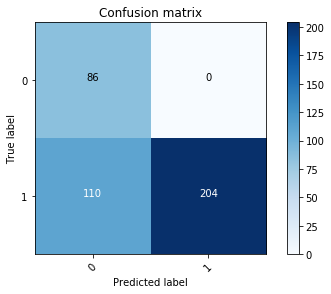


 Results:

Parameters:
------------ 

LEARNING RATE: 0.61
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 5 

LAMBDA: 0.01
Metrics:
---------- 

ACCURACY: 0.764
COST:  nan
CONFUSION MATRIX: 



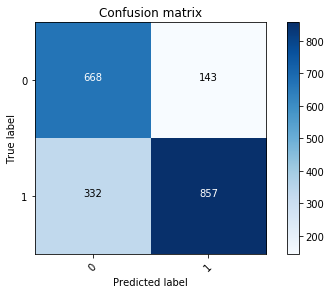

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.972 

TESTING ACCURACY ON FOLD 1 = 0.9774299999999999 

CONFUSION MATRIX OF FOLD 1


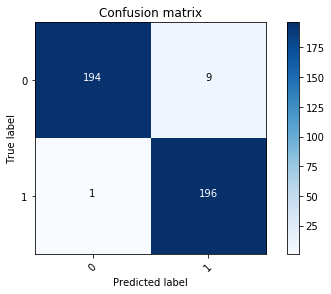

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.972 

TESTING ACCURACY ON FOLD 2 = 0.96993 

CONFUSION MATRIX OF FOLD 2


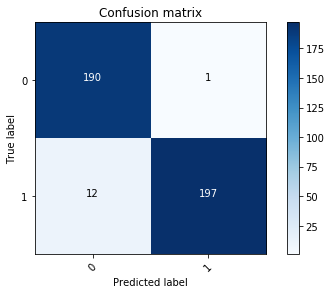

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.9725 

TESTING ACCURACY ON FOLD 3 = 0.9749312499999999 

CONFUSION MATRIX OF FOLD 3


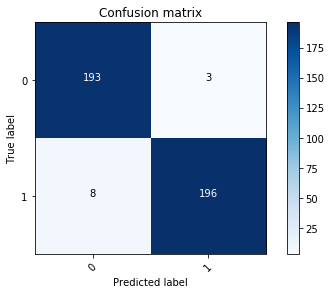

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.973 

TESTING ACCURACY ON FOLD 4 = 0.9724325 

CONFUSION MATRIX OF FOLD 4


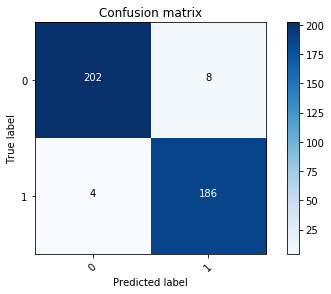

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.977 

TESTING ACCURACY ON FOLD 5 = 0.9824424999999999 

CONFUSION MATRIX OF FOLD 5


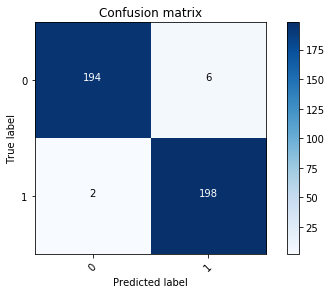


 Results:

Parameters:
------------ 

LEARNING RATE: 0.62
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 5 

LAMBDA: 0.01
Metrics:
---------- 

ACCURACY: 0.975
COST:  nan
CONFUSION MATRIX: 



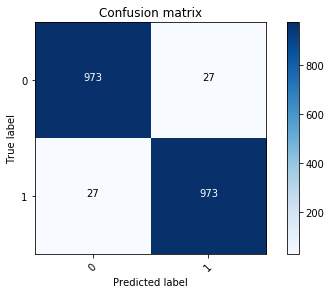

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.5775 

TESTING ACCURACY ON FOLD 1 = 0.56144375 

CONFUSION MATRIX OF FOLD 1


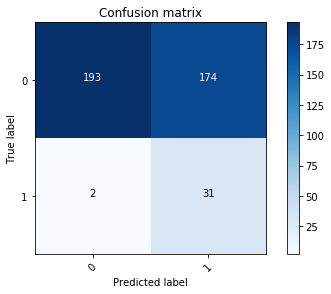

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.9685 

TESTING ACCURACY ON FOLD 2 = 0.96742125 

CONFUSION MATRIX OF FOLD 2


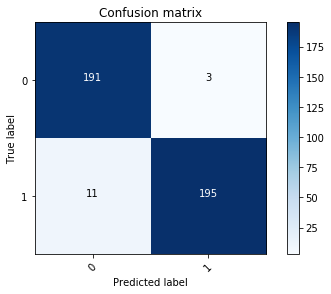

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.5 

TESTING ACCURACY ON FOLD 3 = 0.50375 

CONFUSION MATRIX OF FOLD 3


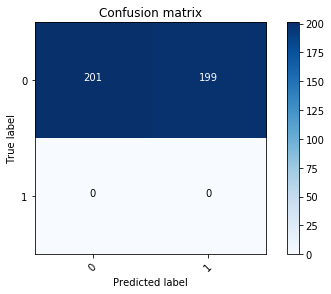

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.9785 

TESTING ACCURACY ON FOLD 4 = 0.97994625 

CONFUSION MATRIX OF FOLD 4


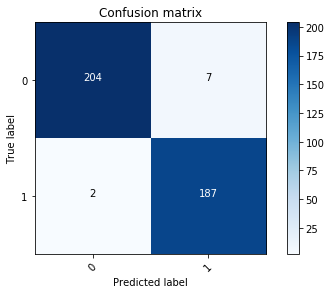

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.744 

TESTING ACCURACY ON FOLD 5 = 0.74436 

CONFUSION MATRIX OF FOLD 5


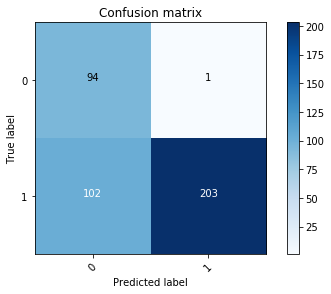


 Results:

Parameters:
------------ 

LEARNING RATE: 0.63
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 5 

LAMBDA: 0.01
Metrics:
---------- 

ACCURACY: 0.751
COST:  73.37853384575949
CONFUSION MATRIX: 



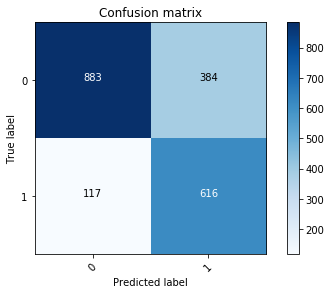

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.5 

TESTING ACCURACY ON FOLD 1 = 0.48875 

CONFUSION MATRIX OF FOLD 1


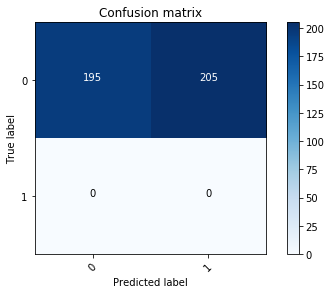

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.671 

TESTING ACCURACY ON FOLD 2 = 0.6641775 

CONFUSION MATRIX OF FOLD 2


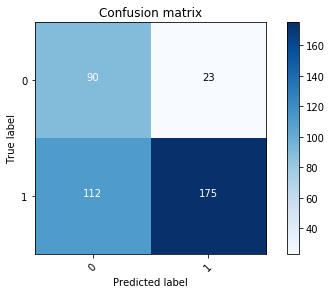

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.9655 

TESTING ACCURACY ON FOLD 3 = 0.9624137500000001 

CONFUSION MATRIX OF FOLD 3


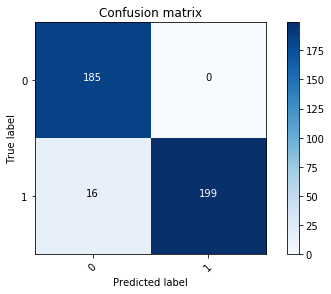

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.5 

TESTING ACCURACY ON FOLD 4 = 0.51625 

CONFUSION MATRIX OF FOLD 4


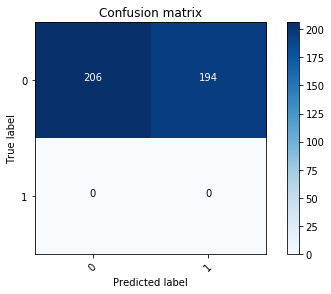

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.7595 

TESTING ACCURACY ON FOLD 5 = 0.78439875 

CONFUSION MATRIX OF FOLD 5


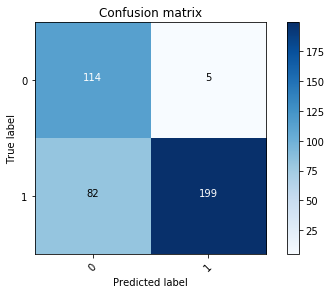


 Results:

Parameters:
------------ 

LEARNING RATE: 0.64
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 5 

LAMBDA: 0.01
Metrics:
---------- 

ACCURACY: 0.683
COST:  11.831882707352932
CONFUSION MATRIX: 



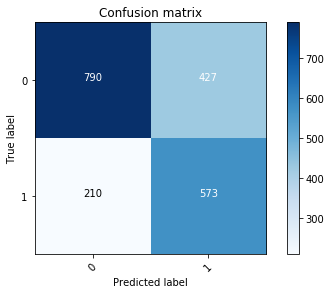

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.5 

TESTING ACCURACY ON FOLD 1 = 0.48875 

CONFUSION MATRIX OF FOLD 1


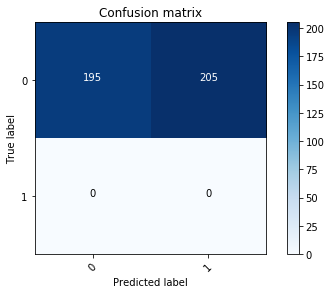

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.739 

TESTING ACCURACY ON FOLD 2 = 0.7318475000000001 

CONFUSION MATRIX OF FOLD 2


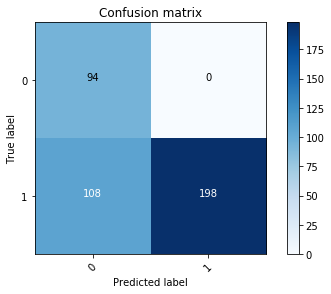

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.521 

TESTING ACCURACY ON FOLD 3 = 0.5163025 

CONFUSION MATRIX OF FOLD 3


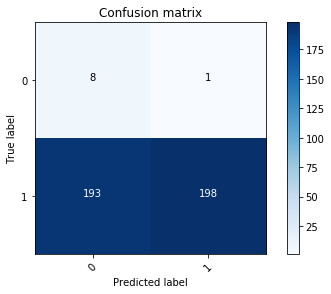

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.739 

TESTING ACCURACY ON FOLD 4 = 0.7368475000000001 

CONFUSION MATRIX OF FOLD 4


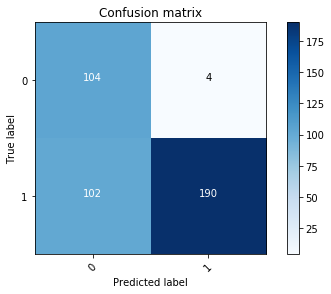

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.977 

TESTING ACCURACY ON FOLD 5 = 0.9724425 

CONFUSION MATRIX OF FOLD 5


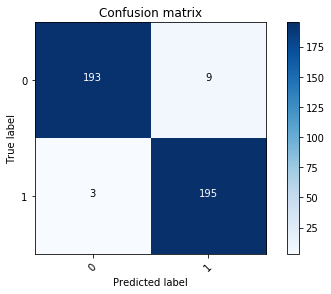


 Results:

Parameters:
------------ 

LEARNING RATE: 0.65
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 5 

LAMBDA: 0.01
Metrics:
---------- 

ACCURACY: 0.689
COST:  nan
CONFUSION MATRIX: 



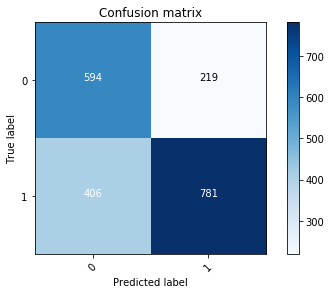

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.896 

TESTING ACCURACY ON FOLD 1 = 0.89224 

CONFUSION MATRIX OF FOLD 1


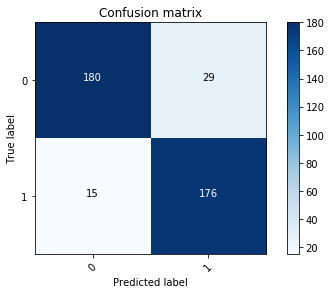

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.744 

TESTING ACCURACY ON FOLD 2 = 0.7343600000000001 

CONFUSION MATRIX OF FOLD 2


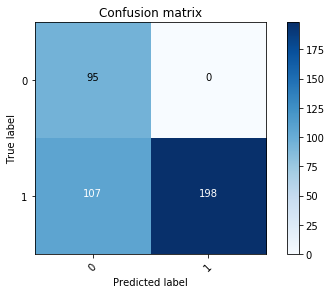

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.5 

TESTING ACCURACY ON FOLD 3 = 0.49875 

CONFUSION MATRIX OF FOLD 3


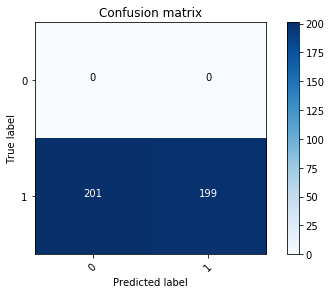

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.83 

TESTING ACCURACY ON FOLD 4 = 0.7945749999999999 

CONFUSION MATRIX OF FOLD 4


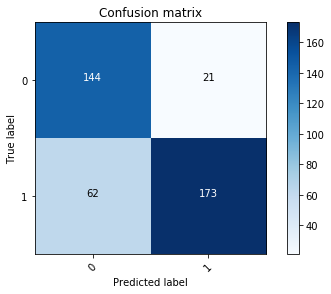

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.5 

TESTING ACCURACY ON FOLD 5 = 0.49125 

CONFUSION MATRIX OF FOLD 5


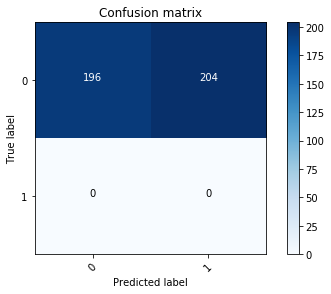


 Results:

Parameters:
------------ 

LEARNING RATE: 0.66
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 5 

LAMBDA: 0.01
Metrics:
---------- 

ACCURACY: 0.682
COST:  6.6594325140665624
CONFUSION MATRIX: 



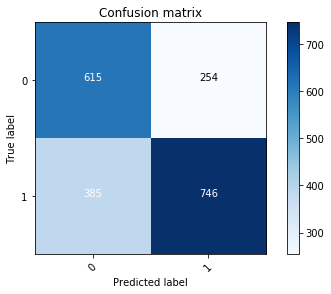

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.741 

TESTING ACCURACY ON FOLD 1 = 0.7818525 

CONFUSION MATRIX OF FOLD 1


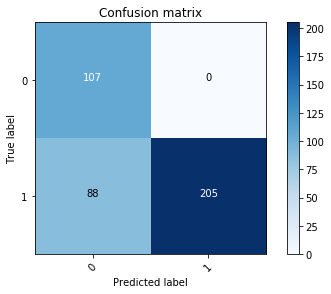

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.9805 

TESTING ACCURACY ON FOLD 2 = 0.97745125 

CONFUSION MATRIX OF FOLD 2


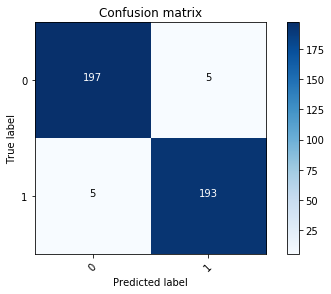

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.9855 

TESTING ACCURACY ON FOLD 3 = 0.99246375 

CONFUSION MATRIX OF FOLD 3


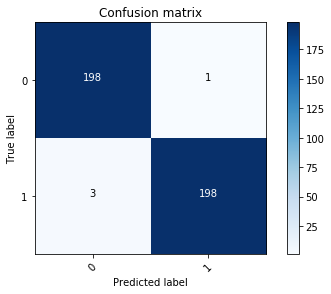

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.732 

TESTING ACCURACY ON FOLD 4 = 0.72183 

CONFUSION MATRIX OF FOLD 4


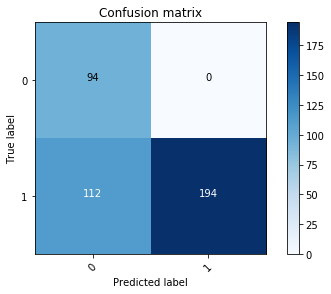

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.9755 

TESTING ACCURACY ON FOLD 5 = 0.97743875 

CONFUSION MATRIX OF FOLD 5


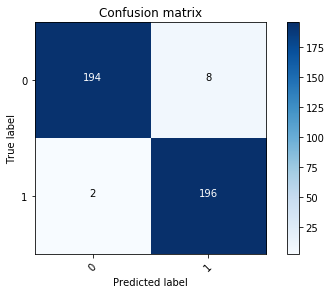


 Results:

Parameters:
------------ 

LEARNING RATE: 0.67
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 5 

LAMBDA: 0.01
Metrics:
---------- 

ACCURACY: 0.89
COST:  5.8898135980921635
CONFUSION MATRIX: 



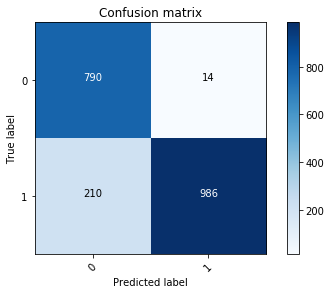

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.5 

TESTING ACCURACY ON FOLD 1 = 0.48875 

CONFUSION MATRIX OF FOLD 1


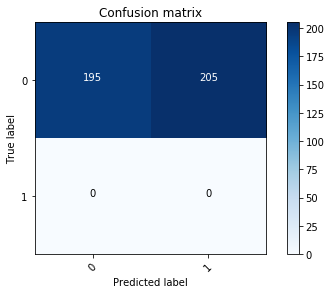

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.7425 

TESTING ACCURACY ON FOLD 2 = 0.72935625 

CONFUSION MATRIX OF FOLD 2


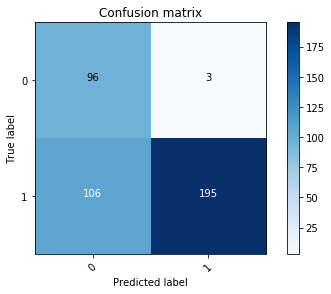

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.744 

TESTING ACCURACY ON FOLD 3 = 0.7268600000000001 

CONFUSION MATRIX OF FOLD 3


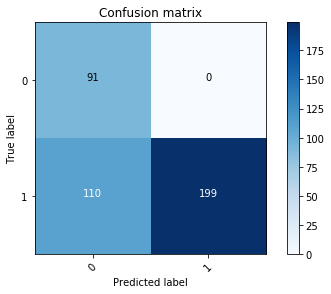

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.5 

TESTING ACCURACY ON FOLD 4 = 0.51625 

CONFUSION MATRIX OF FOLD 4


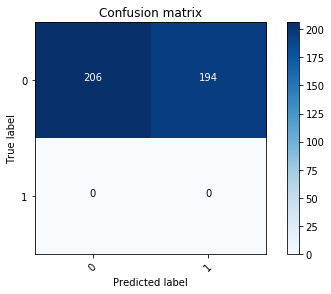

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.734 

TESTING ACCURACY ON FOLD 5 = 0.7343350000000001 

CONFUSION MATRIX OF FOLD 5


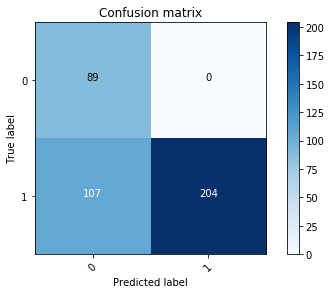


 Results:

Parameters:
------------ 

LEARNING RATE: 0.68
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 5 

LAMBDA: 0.01
Metrics:
---------- 

ACCURACY: 0.639
COST:  3.093356681916489e-13
CONFUSION MATRIX: 



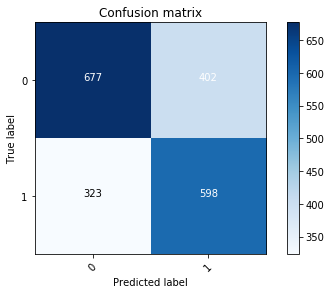

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.5 

TESTING ACCURACY ON FOLD 1 = 0.48875 

CONFUSION MATRIX OF FOLD 1


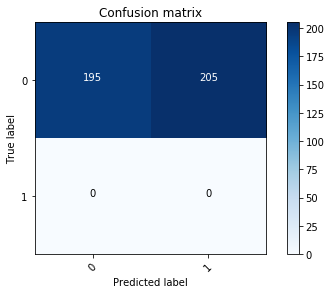

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.7425 

TESTING ACCURACY ON FOLD 2 = 0.73185625 

CONFUSION MATRIX OF FOLD 2


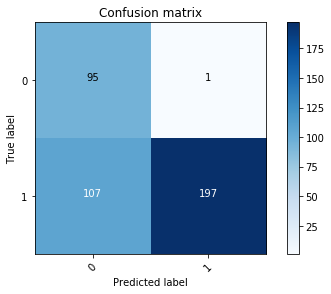

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.879 

TESTING ACCURACY ON FOLD 3 = 0.8996975 

CONFUSION MATRIX OF FOLD 3


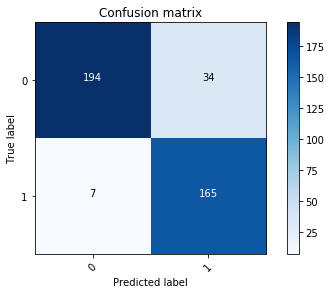

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.9835 

TESTING ACCURACY ON FOLD 4 = 0.97995875 

CONFUSION MATRIX OF FOLD 4


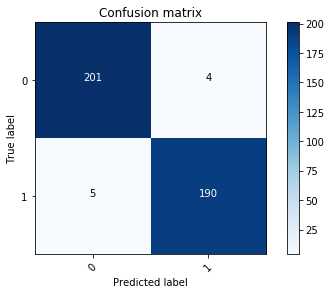

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.7355 

TESTING ACCURACY ON FOLD 5 = 0.73683875 

CONFUSION MATRIX OF FOLD 5


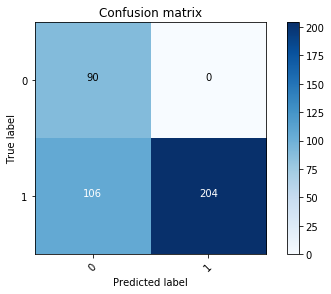


 Results:

Parameters:
------------ 

LEARNING RATE: 0.69
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 5 

LAMBDA: 0.01
Metrics:
---------- 

ACCURACY: 0.767
COST:  9.336893401495961e-07
CONFUSION MATRIX: 



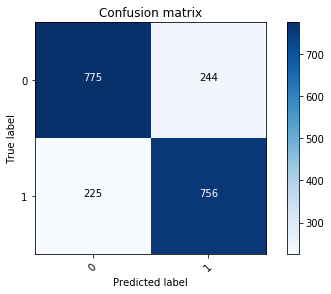

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.929 

TESTING ACCURACY ON FOLD 1 = 0.9498224999999999 

CONFUSION MATRIX OF FOLD 1


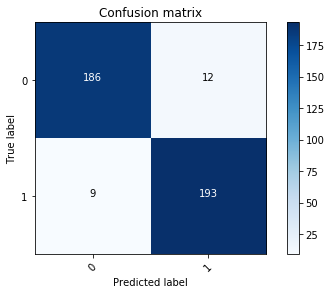

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.7715 

TESTING ACCURACY ON FOLD 2 = 0.76192875 

CONFUSION MATRIX OF FOLD 2


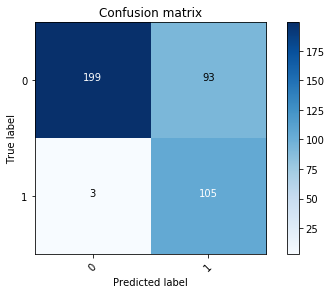

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.5 

TESTING ACCURACY ON FOLD 3 = 0.50375 

CONFUSION MATRIX OF FOLD 3


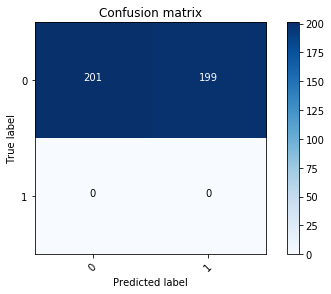

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.7355 

TESTING ACCURACY ON FOLD 4 = 0.73683875 

CONFUSION MATRIX OF FOLD 4


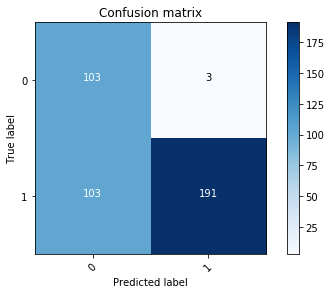

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.744 

TESTING ACCURACY ON FOLD 5 = 0.74436 

CONFUSION MATRIX OF FOLD 5


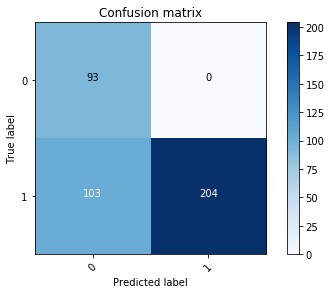


 Results:

Parameters:
------------ 

LEARNING RATE: 0.7
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 5 

LAMBDA: 0.01
Metrics:
---------- 

ACCURACY: 0.739
COST:  31.694561407398172
CONFUSION MATRIX: 



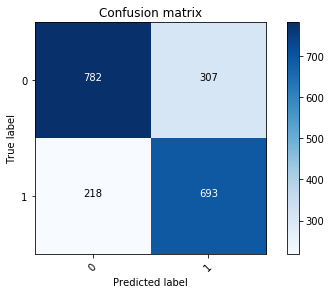

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.744 

TESTING ACCURACY ON FOLD 1 = 0.77936 

CONFUSION MATRIX OF FOLD 1


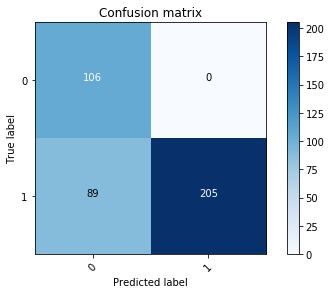

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.734 

TESTING ACCURACY ON FOLD 2 = 0.7243350000000001 

CONFUSION MATRIX OF FOLD 2


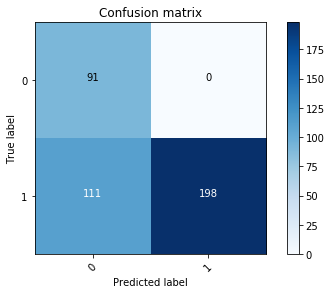

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.5 

TESTING ACCURACY ON FOLD 3 = 0.50375 

CONFUSION MATRIX OF FOLD 3


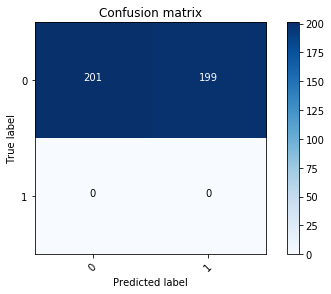

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.9815 

TESTING ACCURACY ON FOLD 4 = 0.98495375 

CONFUSION MATRIX OF FOLD 4


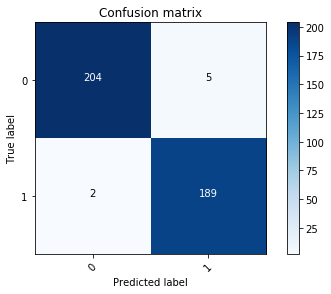

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.73 

TESTING ACCURACY ON FOLD 5 = 0.734325 

CONFUSION MATRIX OF FOLD 5


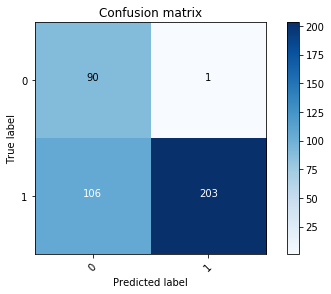


 Results:

Parameters:
------------ 

LEARNING RATE: 0.71
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 5 

LAMBDA: 0.01
Metrics:
---------- 

ACCURACY: 0.745
COST:  nan
CONFUSION MATRIX: 



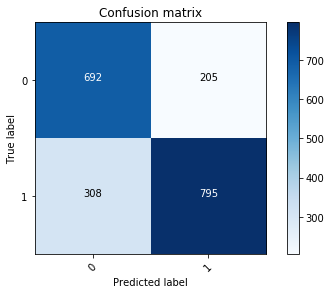

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.959 

TESTING ACCURACY ON FOLD 1 = 0.9823975 

CONFUSION MATRIX OF FOLD 1


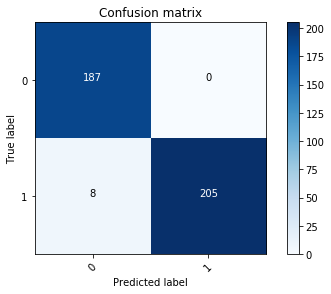

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.9625 

TESTING ACCURACY ON FOLD 2 = 0.9674062499999999 

CONFUSION MATRIX OF FOLD 2


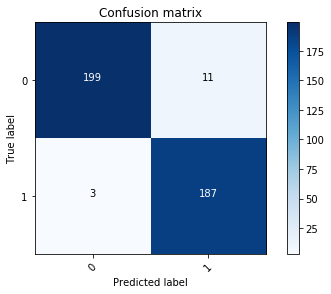

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.744 

TESTING ACCURACY ON FOLD 3 = 0.7243600000000001 

CONFUSION MATRIX OF FOLD 3


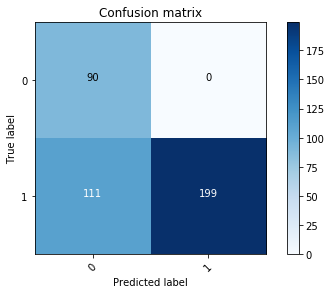

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.7415 

TESTING ACCURACY ON FOLD 4 = 0.74185375 

CONFUSION MATRIX OF FOLD 4


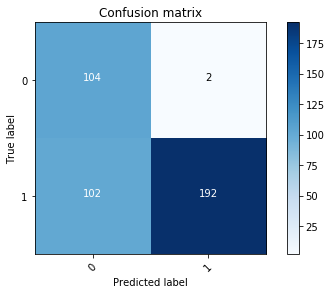

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.7435 

TESTING ACCURACY ON FOLD 5 = 0.74435875 

CONFUSION MATRIX OF FOLD 5


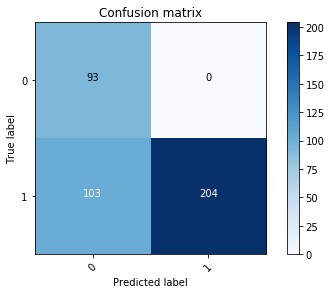


 Results:

Parameters:
------------ 

LEARNING RATE: 0.72
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 5 

LAMBDA: 0.01
Metrics:
---------- 

ACCURACY: 0.832
COST:  9.657553817668663
CONFUSION MATRIX: 



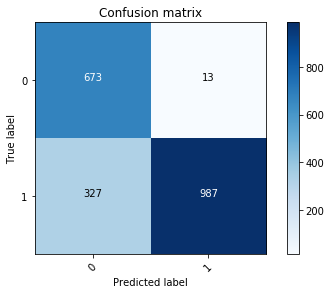

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.96 

TESTING ACCURACY ON FOLD 1 = 0.9574000000000001 

CONFUSION MATRIX OF FOLD 1


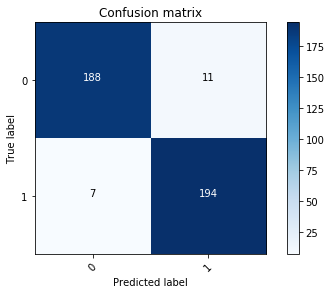

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.63 

TESTING ACCURACY ON FOLD 2 = 0.636575 

CONFUSION MATRIX OF FOLD 2


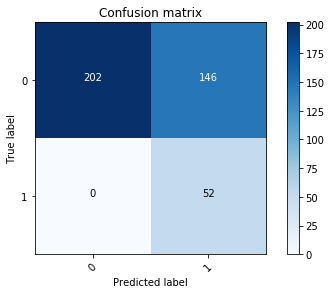

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.5 

TESTING ACCURACY ON FOLD 3 = 0.50375 

CONFUSION MATRIX OF FOLD 3


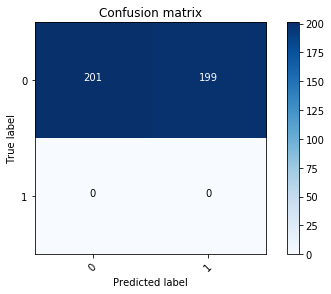

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.5 

TESTING ACCURACY ON FOLD 4 = 0.51625 

CONFUSION MATRIX OF FOLD 4


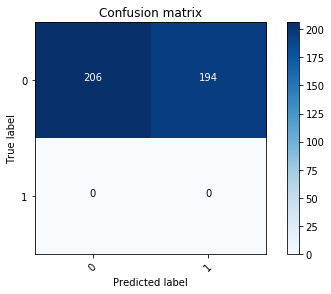

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.7415 

TESTING ACCURACY ON FOLD 5 = 0.7443537499999999 

CONFUSION MATRIX OF FOLD 5


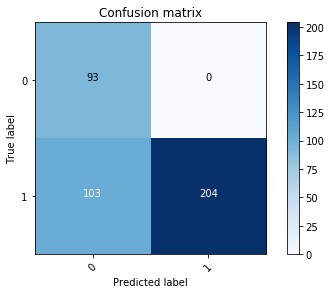


 Results:

Parameters:
------------ 

LEARNING RATE: 0.73
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 5 

LAMBDA: 0.01
Metrics:
---------- 

ACCURACY: 0.672
COST:  1.6424426782052068
CONFUSION MATRIX: 



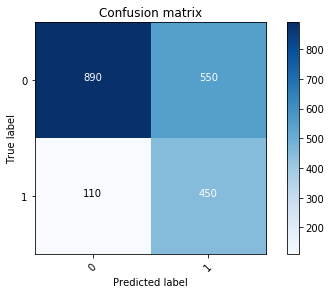

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.7435 

TESTING ACCURACY ON FOLD 1 = 0.77935875 

CONFUSION MATRIX OF FOLD 1


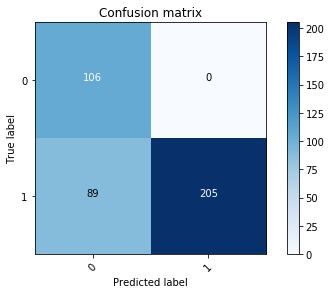

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.734 

TESTING ACCURACY ON FOLD 2 = 0.7293350000000001 

CONFUSION MATRIX OF FOLD 2


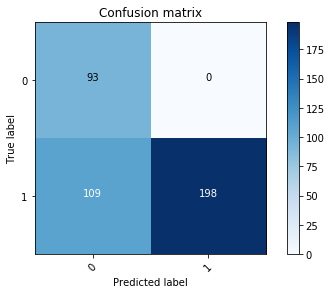

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.5 

TESTING ACCURACY ON FOLD 3 = 0.50375 

CONFUSION MATRIX OF FOLD 3


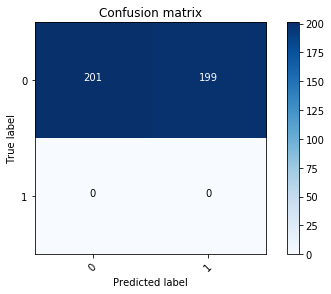

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.979 

TESTING ACCURACY ON FOLD 4 = 0.9724474999999999 

CONFUSION MATRIX OF FOLD 4


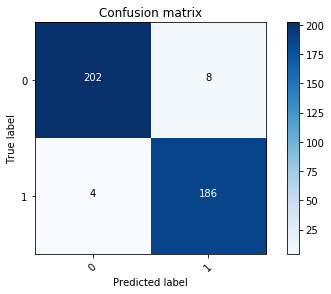

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.7205 

TESTING ACCURACY ON FOLD 5 = 0.7168012500000001 

CONFUSION MATRIX OF FOLD 5


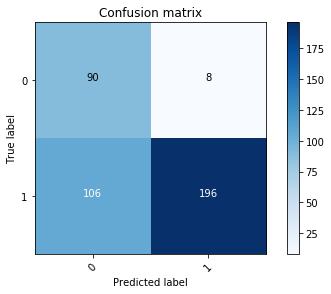


 Results:

Parameters:
------------ 

LEARNING RATE: 0.74
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 5 

LAMBDA: 0.01
Metrics:
---------- 

ACCURACY: 0.74
COST:  nan
CONFUSION MATRIX: 



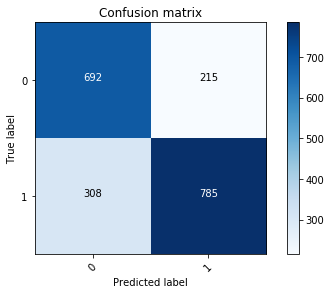

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.5 

TESTING ACCURACY ON FOLD 1 = 0.48875 

CONFUSION MATRIX OF FOLD 1


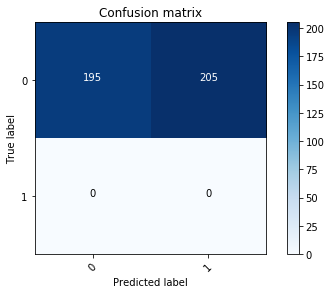

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.5 

TESTING ACCURACY ON FOLD 2 = 0.49625 

CONFUSION MATRIX OF FOLD 2


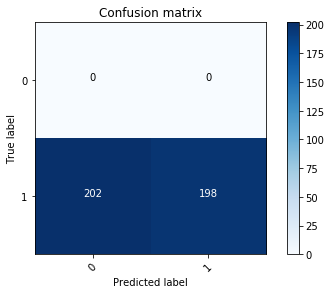

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.5 

TESTING ACCURACY ON FOLD 3 = 0.50375 

CONFUSION MATRIX OF FOLD 3


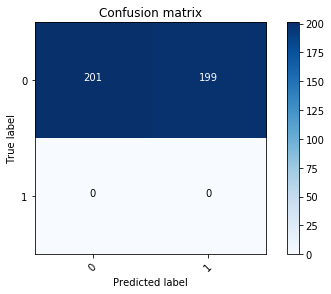

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.744 

TESTING ACCURACY ON FOLD 4 = 0.7418600000000001 

CONFUSION MATRIX OF FOLD 4


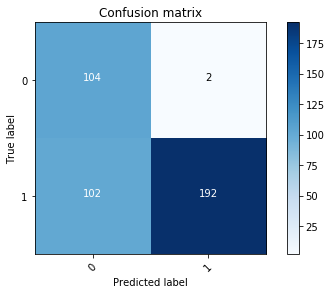

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.5 

TESTING ACCURACY ON FOLD 5 = 0.48875 

CONFUSION MATRIX OF FOLD 5


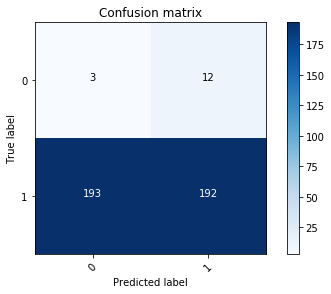


 Results:

Parameters:
------------ 

LEARNING RATE: 0.75
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 5 

LAMBDA: 0.01
Metrics:
---------- 

ACCURACY: 0.544
COST:  133.86478210368026
CONFUSION MATRIX: 



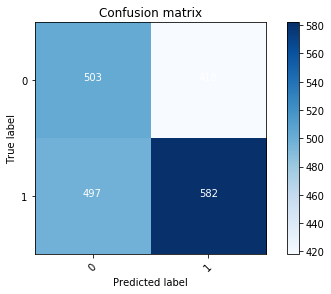

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.5 

TESTING ACCURACY ON FOLD 1 = 0.51375 

CONFUSION MATRIX OF FOLD 1


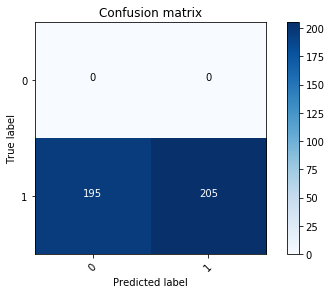

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.5 

TESTING ACCURACY ON FOLD 2 = 0.50625 

CONFUSION MATRIX OF FOLD 2


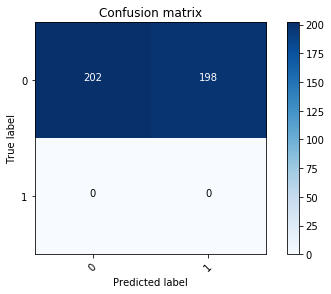

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.744 

TESTING ACCURACY ON FOLD 3 = 0.7268600000000001 

CONFUSION MATRIX OF FOLD 3


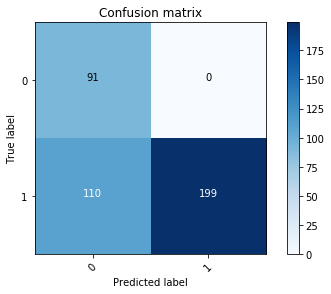

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.931 

TESTING ACCURACY ON FOLD 4 = 0.9323275 

CONFUSION MATRIX OF FOLD 4


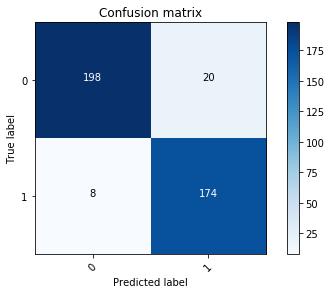

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.604 

TESTING ACCURACY ON FOLD 5 = 0.61151 

CONFUSION MATRIX OF FOLD 5


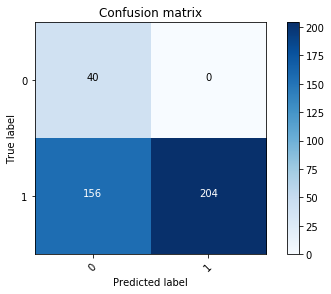


 Results:

Parameters:
------------ 

LEARNING RATE: 0.76
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 5 

LAMBDA: 0.01
Metrics:
---------- 

ACCURACY: 0.658
COST:  nan
CONFUSION MATRIX: 



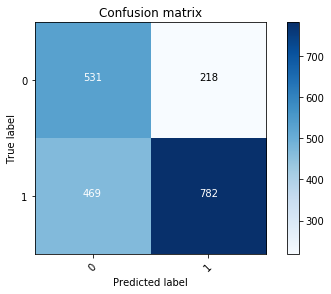

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.9455 

TESTING ACCURACY ON FOLD 1 = 0.94986375 

CONFUSION MATRIX OF FOLD 1


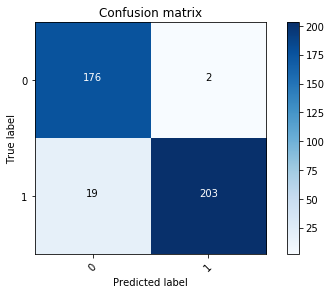

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.7425 

TESTING ACCURACY ON FOLD 2 = 0.73185625 

CONFUSION MATRIX OF FOLD 2


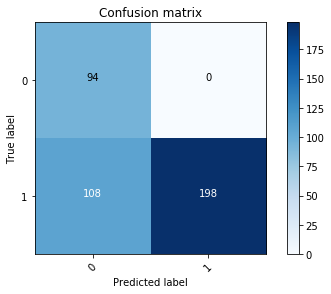

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.734 

TESTING ACCURACY ON FOLD 3 = 0.714335 

CONFUSION MATRIX OF FOLD 3


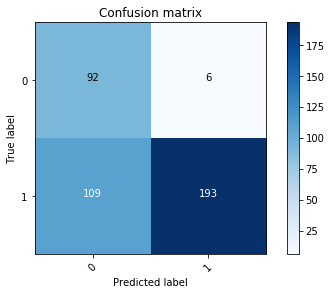

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.948 

TESTING ACCURACY ON FOLD 4 = 0.94987 

CONFUSION MATRIX OF FOLD 4


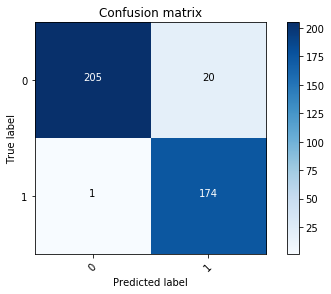

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.7365 

TESTING ACCURACY ON FOLD 5 = 0.73934125 

CONFUSION MATRIX OF FOLD 5


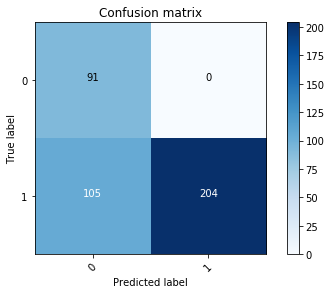


 Results:

Parameters:
------------ 

LEARNING RATE: 0.77
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 5 

LAMBDA: 0.01
Metrics:
---------- 

ACCURACY: 0.817
COST:  149.49425902557687
CONFUSION MATRIX: 



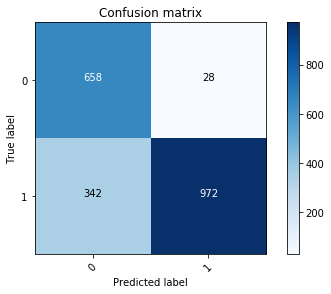

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.5 

TESTING ACCURACY ON FOLD 1 = 0.48875 

CONFUSION MATRIX OF FOLD 1


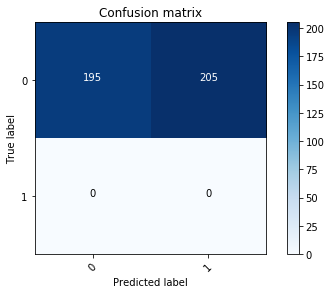

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.5 

TESTING ACCURACY ON FOLD 2 = 0.50625 

CONFUSION MATRIX OF FOLD 2


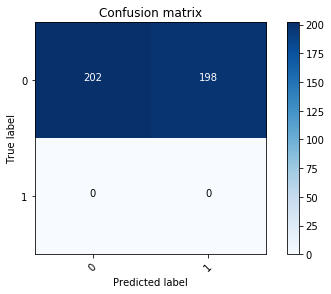

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.577 

TESTING ACCURACY ON FOLD 3 = 0.5839425 

CONFUSION MATRIX OF FOLD 3


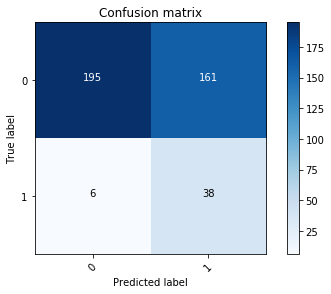

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.7425 

TESTING ACCURACY ON FOLD 4 = 0.73685625 

CONFUSION MATRIX OF FOLD 4


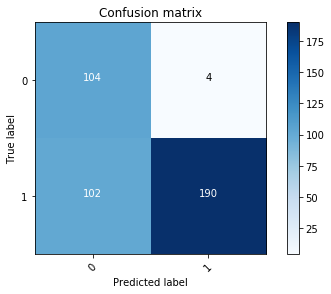

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.727 

TESTING ACCURACY ON FOLD 5 = 0.7343175 

CONFUSION MATRIX OF FOLD 5


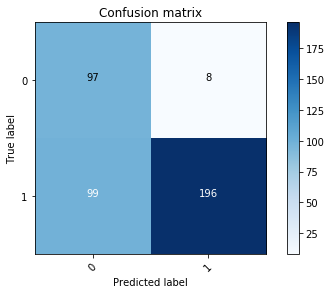


 Results:

Parameters:
------------ 

LEARNING RATE: 0.78
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 5 

LAMBDA: 0.01
Metrics:
---------- 

ACCURACY: 0.61
COST:  41.24126708906486
CONFUSION MATRIX: 



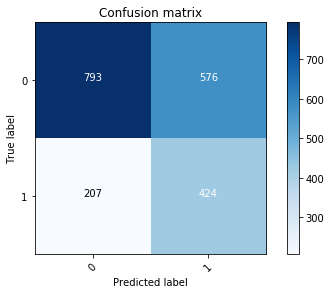

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.5 

TESTING ACCURACY ON FOLD 1 = 0.48875 

CONFUSION MATRIX OF FOLD 1


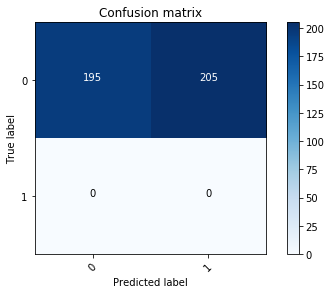

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.5 

TESTING ACCURACY ON FOLD 2 = 0.49625 

CONFUSION MATRIX OF FOLD 2


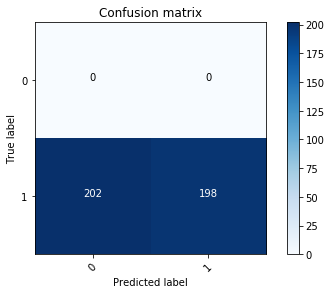

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.5 

TESTING ACCURACY ON FOLD 3 = 0.50375 

CONFUSION MATRIX OF FOLD 3


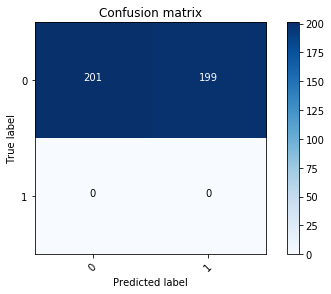

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.733 

TESTING ACCURACY ON FOLD 4 = 0.7318325 

CONFUSION MATRIX OF FOLD 4


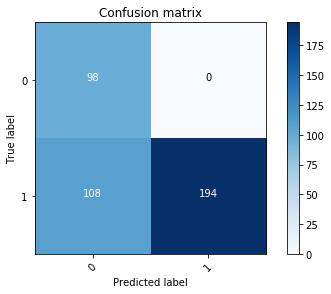

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.5 

TESTING ACCURACY ON FOLD 5 = 0.49125 

CONFUSION MATRIX OF FOLD 5


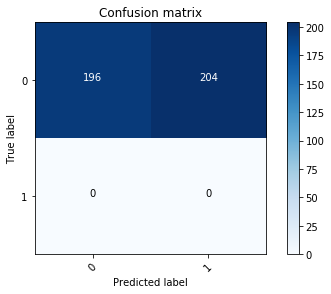


 Results:

Parameters:
------------ 

LEARNING RATE: 0.79
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 5 

LAMBDA: 0.01
Metrics:
---------- 

ACCURACY: 0.542
COST:  0.07700803383600203
CONFUSION MATRIX: 



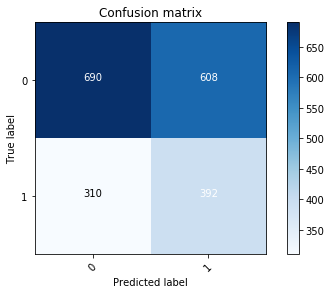

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.7875 

TESTING ACCURACY ON FOLD 1 = 0.80196875 

CONFUSION MATRIX OF FOLD 1


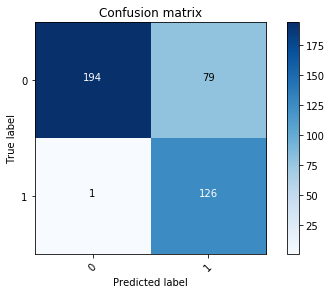

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.5 

TESTING ACCURACY ON FOLD 2 = 0.49625 

CONFUSION MATRIX OF FOLD 2


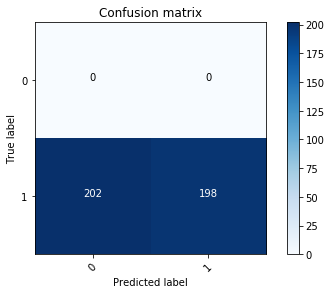

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.7445 

TESTING ACCURACY ON FOLD 3 = 0.72686125 

CONFUSION MATRIX OF FOLD 3


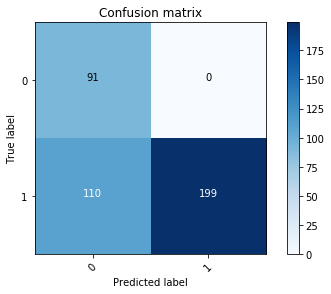

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.5 

TESTING ACCURACY ON FOLD 4 = 0.51625 

CONFUSION MATRIX OF FOLD 4


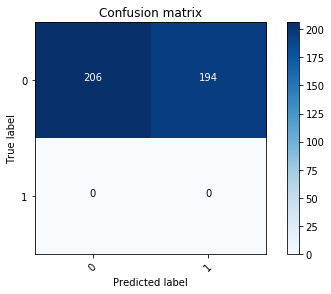

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.5 

TESTING ACCURACY ON FOLD 5 = 0.51125 

CONFUSION MATRIX OF FOLD 5


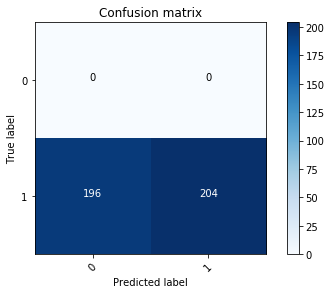


 Results:

Parameters:
------------ 

LEARNING RATE: 0.8
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 5 

LAMBDA: 0.01
Metrics:
---------- 

ACCURACY: 0.611
COST:  130.5966087332265
CONFUSION MATRIX: 



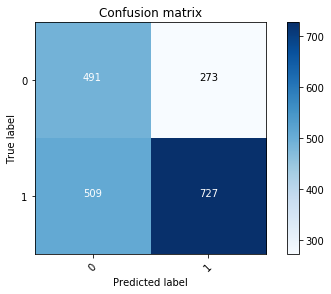

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.9795 

TESTING ACCURACY ON FOLD 1 = 0.98994875 

CONFUSION MATRIX OF FOLD 1


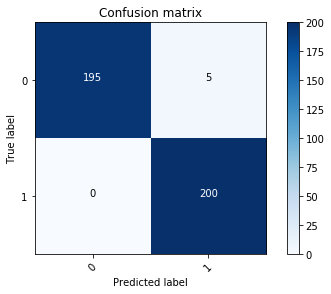

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.5 

TESTING ACCURACY ON FOLD 2 = 0.50625 

CONFUSION MATRIX OF FOLD 2


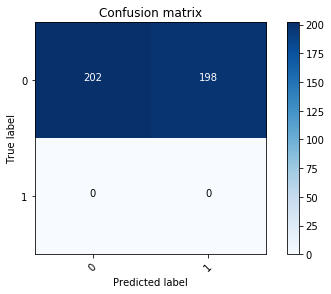

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.953 

TESTING ACCURACY ON FOLD 3 = 0.9573824999999999 

CONFUSION MATRIX OF FOLD 3


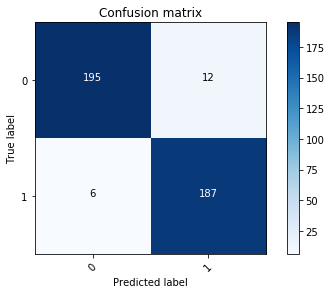

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.5 

TESTING ACCURACY ON FOLD 4 = 0.51625 

CONFUSION MATRIX OF FOLD 4


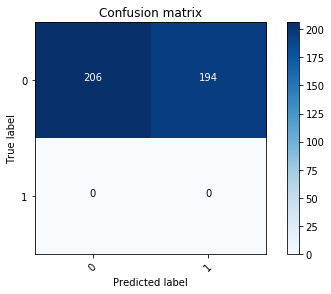

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.5 

TESTING ACCURACY ON FOLD 5 = 0.51125 

CONFUSION MATRIX OF FOLD 5


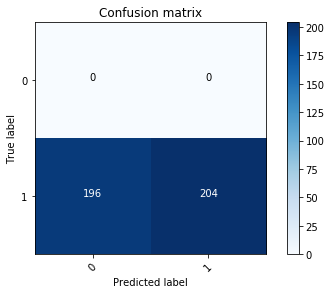


 Results:

Parameters:
------------ 

LEARNING RATE: 0.81
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 5 

LAMBDA: 0.01
Metrics:
---------- 

ACCURACY: 0.696
COST:  44.97651486467743
CONFUSION MATRIX: 



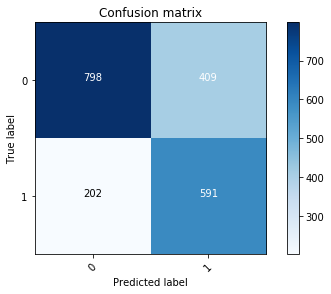

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.9755 

TESTING ACCURACY ON FOLD 1 = 0.97743875 

CONFUSION MATRIX OF FOLD 1


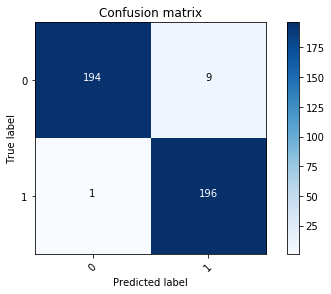

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.741 

TESTING ACCURACY ON FOLD 2 = 0.7293525 

CONFUSION MATRIX OF FOLD 2


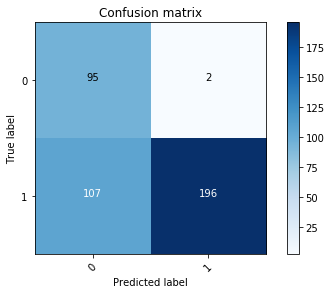

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.7425 

TESTING ACCURACY ON FOLD 3 = 0.72435625 

CONFUSION MATRIX OF FOLD 3


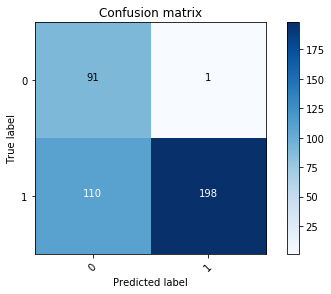

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.741 

TESTING ACCURACY ON FOLD 4 = 0.7368524999999999 

CONFUSION MATRIX OF FOLD 4


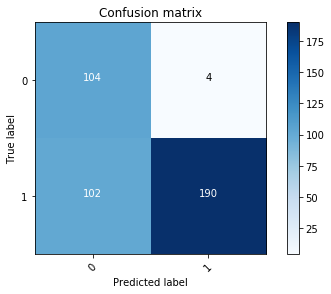

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.9795 

TESTING ACCURACY ON FOLD 5 = 0.98494875 

CONFUSION MATRIX OF FOLD 5


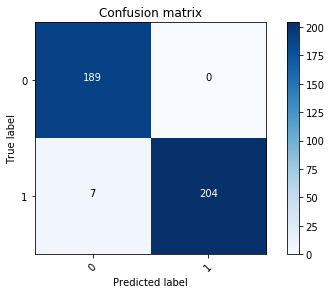


 Results:

Parameters:
------------ 

LEARNING RATE: 0.82
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 5 

LAMBDA: 0.01
Metrics:
---------- 

ACCURACY: 0.831
COST:  3.01345712102675
CONFUSION MATRIX: 



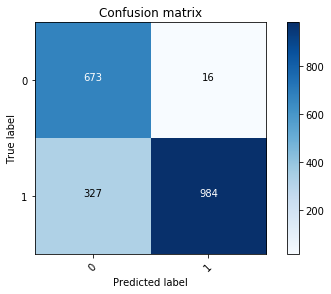

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.5825 

TESTING ACCURACY ON FOLD 1 = 0.5639562499999999 

CONFUSION MATRIX OF FOLD 1


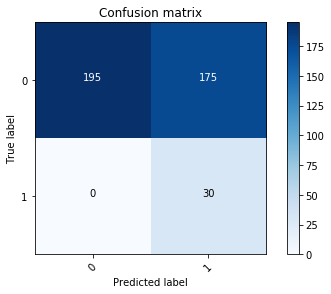

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.9645 

TESTING ACCURACY ON FOLD 2 = 0.9624112499999999 

CONFUSION MATRIX OF FOLD 2


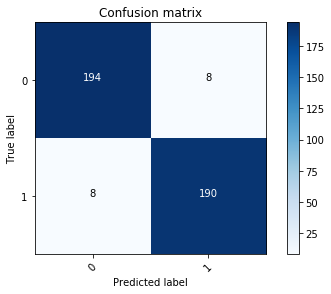

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.9225 

TESTING ACCURACY ON FOLD 3 = 0.91980625 

CONFUSION MATRIX OF FOLD 3


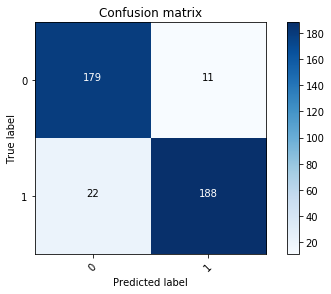

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.877 

TESTING ACCURACY ON FOLD 4 = 0.8821925 

CONFUSION MATRIX OF FOLD 4


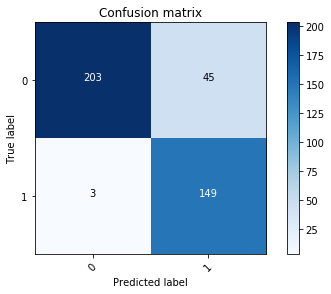

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.5 

TESTING ACCURACY ON FOLD 5 = 0.51125 

CONFUSION MATRIX OF FOLD 5


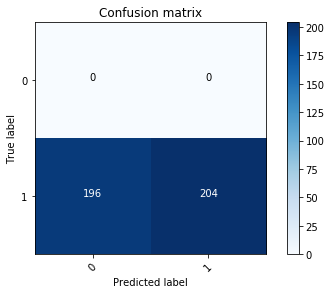


 Results:

Parameters:
------------ 

LEARNING RATE: 0.83
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 5 

LAMBDA: 0.01
Metrics:
---------- 

ACCURACY: 0.768
COST:  251.067705091869
CONFUSION MATRIX: 



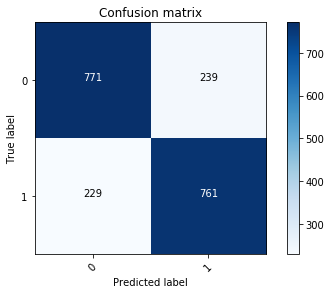

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.7415 

TESTING ACCURACY ON FOLD 1 = 0.77935375 

CONFUSION MATRIX OF FOLD 1


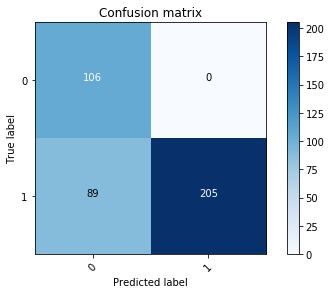

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.552 

TESTING ACCURACY ON FOLD 2 = 0.56138 

CONFUSION MATRIX OF FOLD 2


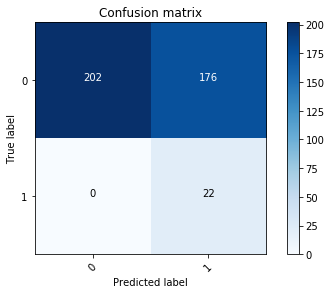

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.5 

TESTING ACCURACY ON FOLD 3 = 0.50375 

CONFUSION MATRIX OF FOLD 3


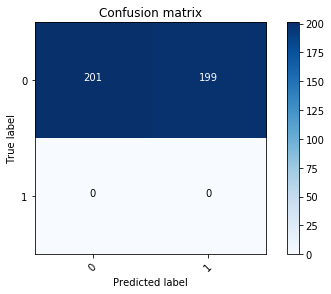

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.966 

TESTING ACCURACY ON FOLD 4 = 0.962415 

CONFUSION MATRIX OF FOLD 4


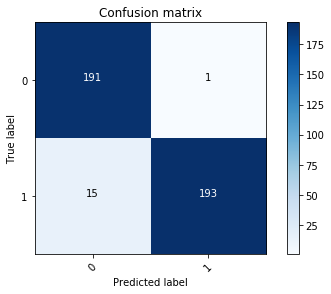

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.715 

TESTING ACCURACY ON FOLD 5 = 0.7142875000000001 

CONFUSION MATRIX OF FOLD 5


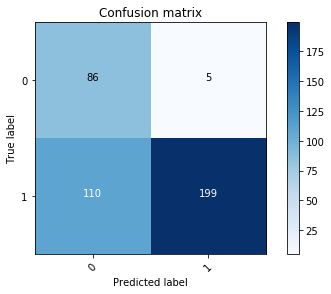


 Results:

Parameters:
------------ 

LEARNING RATE: 0.84
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 5 

LAMBDA: 0.01
Metrics:
---------- 

ACCURACY: 0.704
COST:  56.71983572185271
CONFUSION MATRIX: 



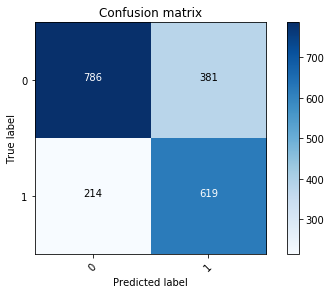

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.5 

TESTING ACCURACY ON FOLD 1 = 0.48875 

CONFUSION MATRIX OF FOLD 1


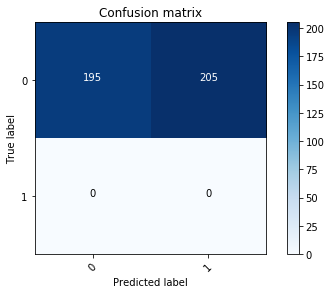

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.5 

TESTING ACCURACY ON FOLD 2 = 0.50625 

CONFUSION MATRIX OF FOLD 2


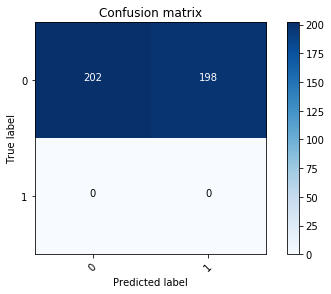

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.59 

TESTING ACCURACY ON FOLD 3 = 0.603975 

CONFUSION MATRIX OF FOLD 3


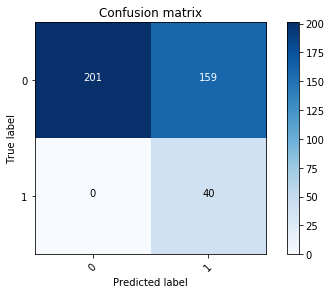

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.741 

TESTING ACCURACY ON FOLD 4 = 0.7418524999999999 

CONFUSION MATRIX OF FOLD 4


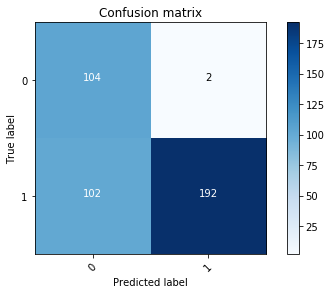

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.5 

TESTING ACCURACY ON FOLD 5 = 0.49125 

CONFUSION MATRIX OF FOLD 5


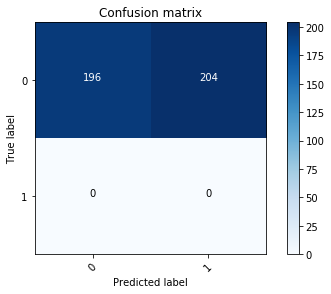


 Results:

Parameters:
------------ 

LEARNING RATE: 0.85
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 5 

LAMBDA: 0.01
Metrics:
---------- 

ACCURACY: 0.566
COST:  nan
CONFUSION MATRIX: 



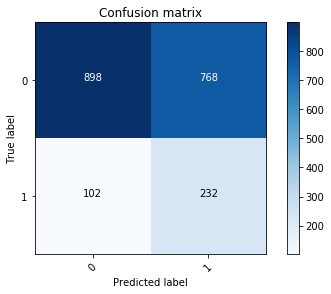

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.5 

TESTING ACCURACY ON FOLD 1 = 0.48875 

CONFUSION MATRIX OF FOLD 1


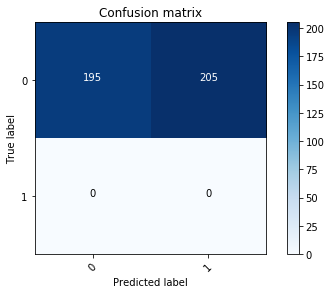

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.7795 

TESTING ACCURACY ON FOLD 2 = 0.77694875 

CONFUSION MATRIX OF FOLD 2


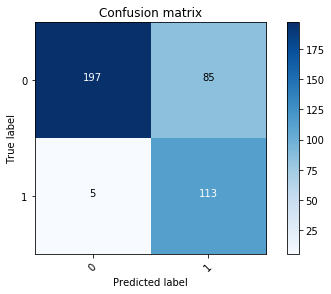

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.7435 

TESTING ACCURACY ON FOLD 3 = 0.7243587499999999 

CONFUSION MATRIX OF FOLD 3


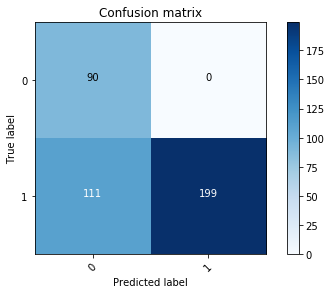

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.743 

TESTING ACCURACY ON FOLD 4 = 0.7443575 

CONFUSION MATRIX OF FOLD 4


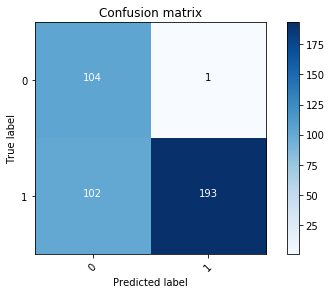

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.741 

TESTING ACCURACY ON FOLD 5 = 0.7418524999999999 

CONFUSION MATRIX OF FOLD 5


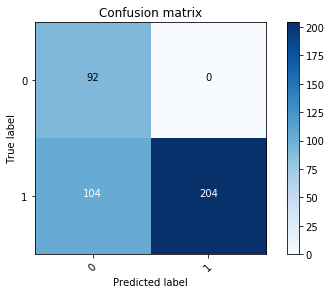


 Results:

Parameters:
------------ 

LEARNING RATE: 0.86
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 5 

LAMBDA: 0.01
Metrics:
---------- 

ACCURACY: 0.695
COST:  nan
CONFUSION MATRIX: 



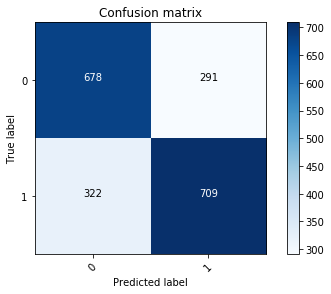

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.7145 

TESTING ACCURACY ON FOLD 1 = 0.7442862499999999 

CONFUSION MATRIX OF FOLD 1


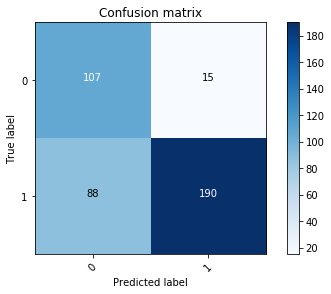

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.7325 

TESTING ACCURACY ON FOLD 2 = 0.72933125 

CONFUSION MATRIX OF FOLD 2


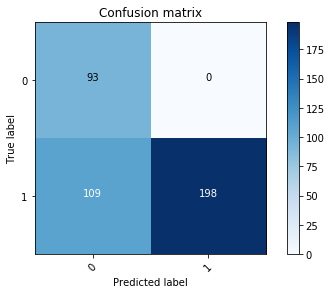

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.5 

TESTING ACCURACY ON FOLD 3 = 0.50375 

CONFUSION MATRIX OF FOLD 3


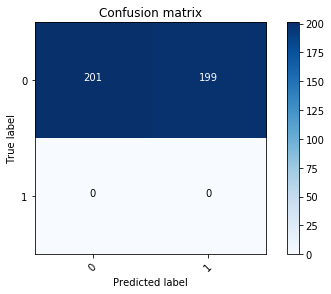

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.962 

TESTING ACCURACY ON FOLD 4 = 0.957405 

CONFUSION MATRIX OF FOLD 4


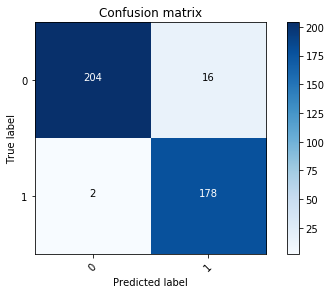

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.7435 

TESTING ACCURACY ON FOLD 5 = 0.74435875 

CONFUSION MATRIX OF FOLD 5


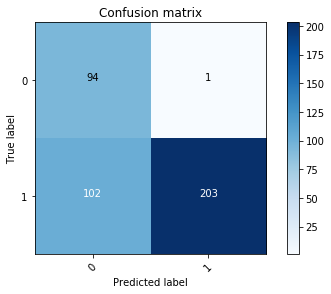


 Results:

Parameters:
------------ 

LEARNING RATE: 0.87
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 5 

LAMBDA: 0.01
Metrics:
---------- 

ACCURACY: 0.736
COST:  133.02373877241865
CONFUSION MATRIX: 



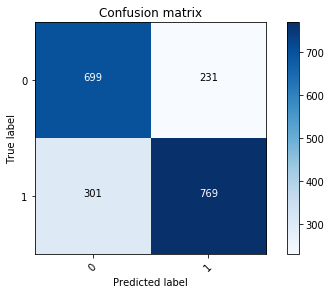

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.5 

TESTING ACCURACY ON FOLD 1 = 0.48875 

CONFUSION MATRIX OF FOLD 1


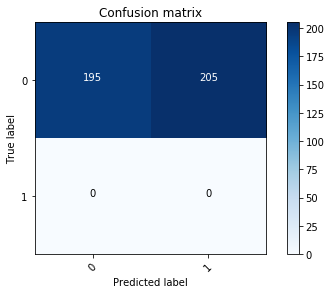

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.569 

TESTING ACCURACY ON FOLD 2 = 0.5739225 

CONFUSION MATRIX OF FOLD 2


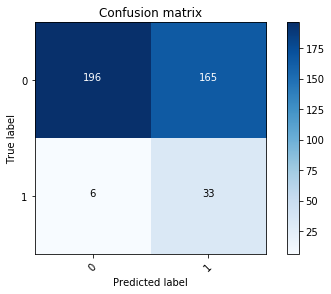

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.5 

TESTING ACCURACY ON FOLD 3 = 0.50375 

CONFUSION MATRIX OF FOLD 3


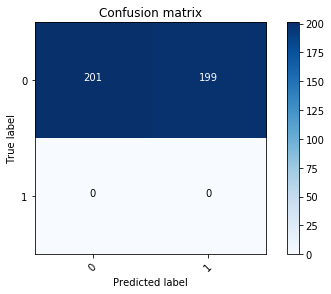

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.5 

TESTING ACCURACY ON FOLD 4 = 0.51625 

CONFUSION MATRIX OF FOLD 4


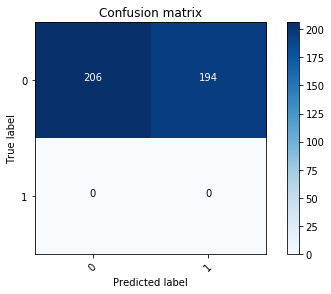

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.744 

TESTING ACCURACY ON FOLD 5 = 0.7468600000000001 

CONFUSION MATRIX OF FOLD 5


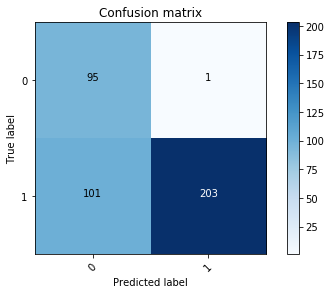


 Results:

Parameters:
------------ 

LEARNING RATE: 0.88
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 5 

LAMBDA: 0.01
Metrics:
---------- 

ACCURACY: 0.566
COST:  0.0006502331465873894
CONFUSION MATRIX: 



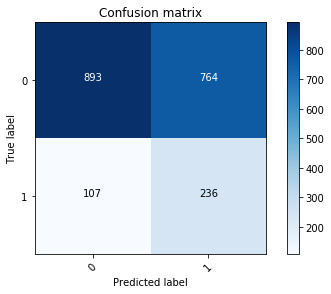

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.5975 

TESTING ACCURACY ON FOLD 1 = 0.57399375 

CONFUSION MATRIX OF FOLD 1


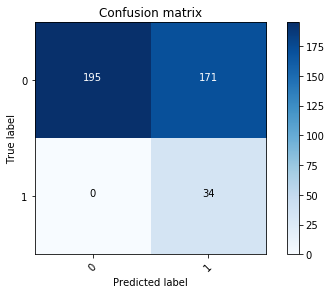

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.5 

TESTING ACCURACY ON FOLD 2 = 0.50625 

CONFUSION MATRIX OF FOLD 2


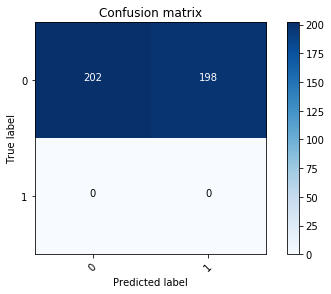

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.97 

TESTING ACCURACY ON FOLD 3 = 0.9774250000000001 

CONFUSION MATRIX OF FOLD 3


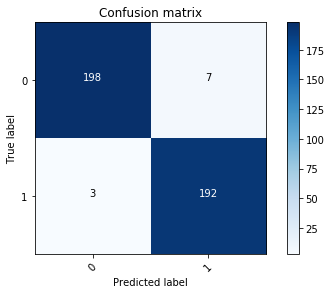

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.742 

TESTING ACCURACY ON FOLD 4 = 0.7393550000000001 

CONFUSION MATRIX OF FOLD 4


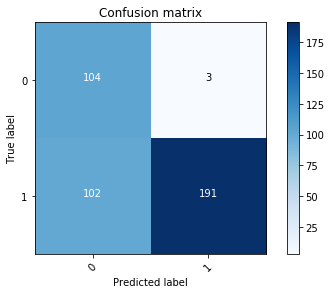

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.7525 

TESTING ACCURACY ON FOLD 5 = 0.69938125 

CONFUSION MATRIX OF FOLD 5


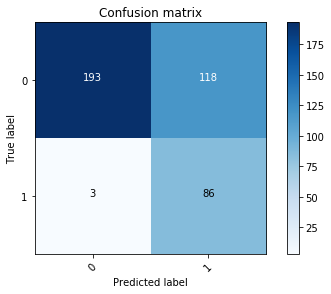


 Results:

Parameters:
------------ 

LEARNING RATE: 0.89
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 5 

LAMBDA: 0.01
Metrics:
---------- 

ACCURACY: 0.699
COST:  2.40976204328955
CONFUSION MATRIX: 



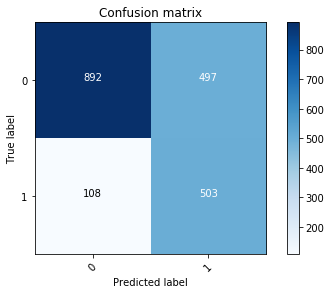

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.9635 

TESTING ACCURACY ON FOLD 1 = 0.98240875 

CONFUSION MATRIX OF FOLD 1


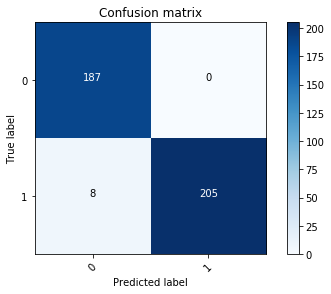

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.7425 

TESTING ACCURACY ON FOLD 2 = 0.72935625 

CONFUSION MATRIX OF FOLD 2


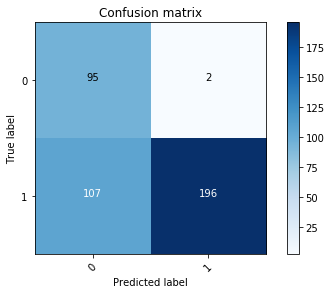

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.733 

TESTING ACCURACY ON FOLD 3 = 0.7168325 

CONFUSION MATRIX OF FOLD 3


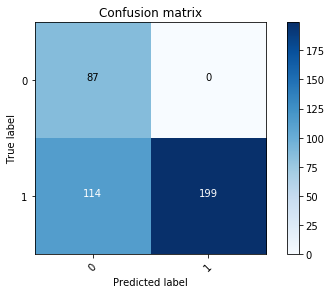

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.7395 

TESTING ACCURACY ON FOLD 4 = 0.7343487500000001 

CONFUSION MATRIX OF FOLD 4


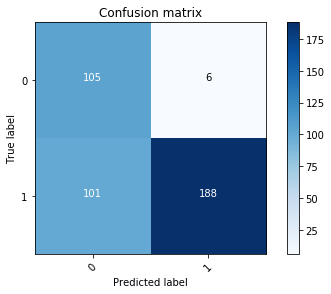

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.5 

TESTING ACCURACY ON FOLD 5 = 0.49125 

CONFUSION MATRIX OF FOLD 5


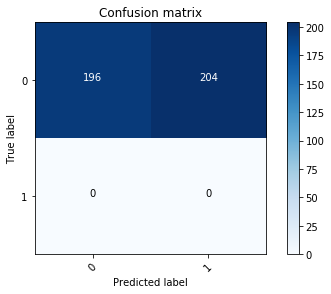


 Results:

Parameters:
------------ 

LEARNING RATE: 0.9
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 5 

LAMBDA: 0.01
Metrics:
---------- 

ACCURACY: 0.731
COST:  227.4130500149131
CONFUSION MATRIX: 



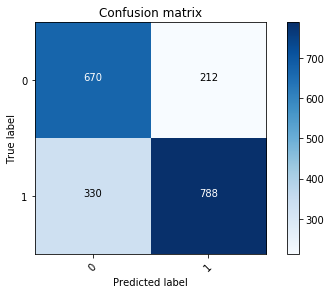

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.5 

TESTING ACCURACY ON FOLD 1 = 0.51375 

CONFUSION MATRIX OF FOLD 1


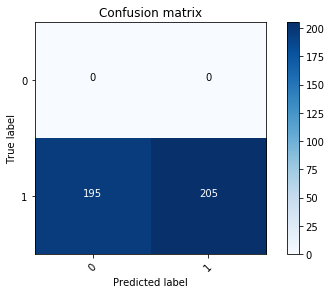

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.7405 

TESTING ACCURACY ON FOLD 2 = 0.72935125 

CONFUSION MATRIX OF FOLD 2


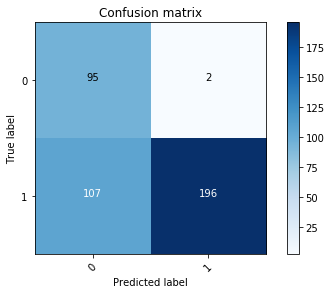

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.672 

TESTING ACCURACY ON FOLD 3 = 0.70418 

CONFUSION MATRIX OF FOLD 3


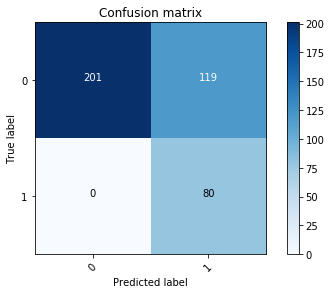

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.7445 

TESTING ACCURACY ON FOLD 4 = 0.74186125 

CONFUSION MATRIX OF FOLD 4


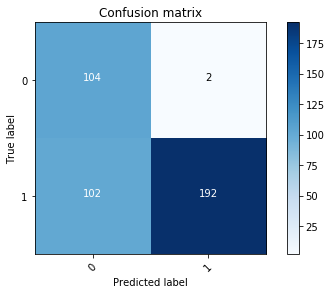

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.937 

TESTING ACCURACY ON FOLD 5 = 0.9248425 

CONFUSION MATRIX OF FOLD 5


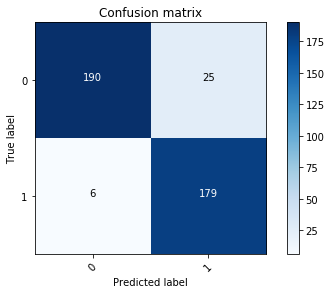


 Results:

Parameters:
------------ 

LEARNING RATE: 0.91
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 5 

LAMBDA: 0.01
Metrics:
---------- 

ACCURACY: 0.723
COST:  40.341066634378834
CONFUSION MATRIX: 



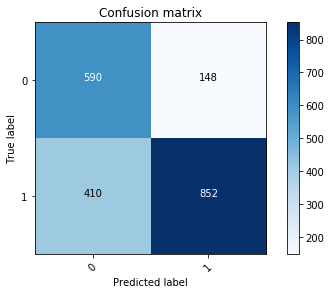

Folds:

*** TRAINING ON FOLD 1 *** 

TRAINING ACCURACY ON FOLD 1 = 0.5 

TESTING ACCURACY ON FOLD 1 = 0.48875 

CONFUSION MATRIX OF FOLD 1


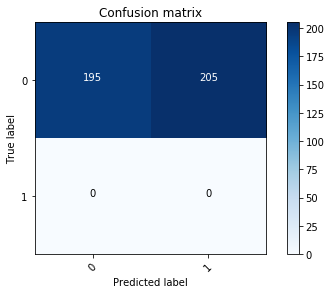

------------------------------------------------------- 

*** TRAINING ON FOLD 2 *** 

TRAINING ACCURACY ON FOLD 2 = 0.7365 

TESTING ACCURACY ON FOLD 2 = 0.73934125 

CONFUSION MATRIX OF FOLD 2


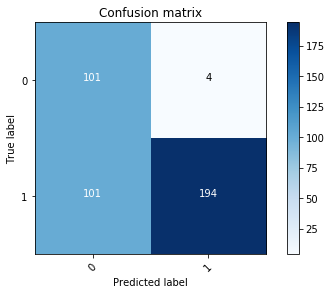

------------------------------------------------------- 

*** TRAINING ON FOLD 3 *** 

TRAINING ACCURACY ON FOLD 3 = 0.744 

TESTING ACCURACY ON FOLD 3 = 0.7243600000000001 

CONFUSION MATRIX OF FOLD 3


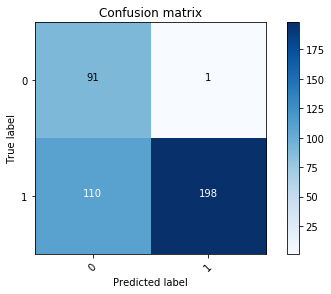

------------------------------------------------------- 

*** TRAINING ON FOLD 4 *** 

TRAINING ACCURACY ON FOLD 4 = 0.738 

TESTING ACCURACY ON FOLD 4 = 0.739345 

CONFUSION MATRIX OF FOLD 4


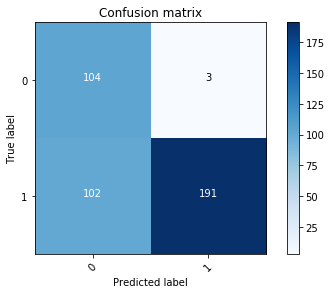

------------------------------------------------------- 

*** TRAINING ON FOLD 5 *** 

TRAINING ACCURACY ON FOLD 5 = 0.7265 

TESTING ACCURACY ON FOLD 5 = 0.7268162499999999 

CONFUSION MATRIX OF FOLD 5


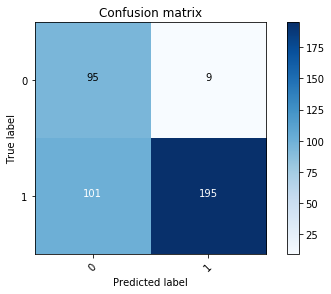


 Results:

Parameters:
------------ 

LEARNING RATE: 0.92
# OF EPOCHS: 1000
# NODES IN HIDDEN LAYER: 5 

LAMBDA: 0.01
Metrics:
---------- 

ACCURACY: 0.684
COST:  nan
CONFUSION MATRIX: 



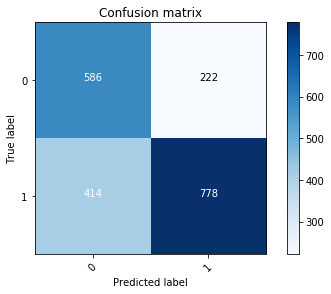

Folds:

*** TRAINING ON FOLD 1 *** 



In [ ]:
# Test how accuracy changes with different learning rates

rs = [x / 100.0 for x in range(1, 201)]
rAccuracies = []
for num in rs: 
    rAccuracies.append(runNN(hidden_nodes = 5, learning_rate = num, lamda = 0.01, linear = False)[2].accuracy)

# Learning rate

In [ ]:
plt.figure()
plt.xlabel("Learning rate")
plt.ylabel("NN Accuracy")
plt.title("Accuracy vs. Learning rate")
plt.plot(np.unique(rs), np.poly1d(np.polyfit(rs, rAccuracies, 10))(np.unique(rs)))

# Number of nodes in hidden layer

In [ ]:
# Test how accuracy changes with #nodes in hidden layer

NodeAccuracies = []
nums = list(range(1,150,5))
for num in nums:
    NodeAccuracies.append(runNN(hidden_nodes = num, learning_rate = 0.01, lamda = 0.01, linear = False)[2].accuracy)

In [ ]:
plt.figure()
plt.xlabel("#nodes in hidden layer")
plt.ylabel("NN Accuracy")
plt.title("Accuracy vs. #nodes")
plt.plot(np.unique(nums), np.poly1d(np.polyfit(nums, NodeAccuracies, 10))(np.unique(nums)))

# Evaluating model with L2 off:
### Linear dataset

In [ ]:
X, y, model = runNN(hidden_nodes = 2, learning_rate = 0.01, lamda = 0, linear = True)

In [ ]:
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.bwr) #http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter
plt.show()
plot_decision_boundary(model, X, y)

### Nonlinear dataset

In [ ]:
X, y, model = runNN(hidden_nodes = 14, learning_rate = 0.01, lamda = 0, linear = False)

In [ ]:
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.bwr) #http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter
plt.show()
plot_decision_boundary(model, X, y)

# Extra credit: Digit dataset

In [ ]:
def digit_nn(hidden_nodes, learning_rate, lamda, num_epochs):
    X = np.genfromtxt('DATA/Digit_X_train.csv', delimiter = ',')
    y = np.genfromtxt('DATA/Digit_y_train.csv', delimiter = ',').astype(np.int64)
    testingX = np.genfromtxt('DATA/Digit_X_train.csv', delimiter = ',')
    testingY = np.genfromtxt('DATA/Digit_y_train.csv', delimiter = ',').astype(np.int64)
    
    N, input_dim = np.shape(X)
    output_dim = np.max(y)+1

    print("*** TRAINING INITIALIZED***")

    nn_model = NeuralNetwork(input_dim, output_dim, hidden_nodes)
    nn_model.train(X, y, num_epochs, learning_rate, lamda)
    y_pred = nn_model.predict(X)
    nn_model.score(y,y_pred)
    print("TRAINING ACCURACY =",str(nn_model.accuracy), "\n")
    y_pred = nn_model.predict(testingX)
    nn_model.score(testingY, y_pred)
    print("TESTING ACCURACY =",str(nn_model.accuracy), "\n")
    
    print("===================================================================")
    print("\n", "Results:")
    print("===========", "\n")
    print('Parameters:')
    print('------------', "\n")
    print('LEARNING RATE:', learning_rate)
    print('# OF EPOCHS:', num_epochs)
    print('# NODES IN HIDDEN LAYER:', nn_model.hidden_nodes)
    print('LAMBDA:', lamda, "\n")
    print('Metrics:')
    print('----------', "\n")
    print('ACCURACY:', nn_model.accuracy)
    print('COST: ', nn_model.compute_cost(X,y))
    print('CONFUSION MATRIX: \n')
    plt.figure()
    plot_confusion_matrix(nn_model.con_mat, classes = ['0', '1'], 
                          title = 'Confusion matrix')
    plt.show()
    
    return (X, y, nn_model)

In [ ]:
X, y, model = digit_nn(hidden_nodes = 20, learning_rate = 0.01, lamda = 0.001, num_epochs = 10000)

In [ ]:
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.bwr) #http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter
plt.show()